# Actividad - Proyecto práctico: DQN con SpaceInvaders

**Máster en Inteligencia Artificial - Aprendizaje por Refuerzo**

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
*   Alumno 1: Manjarrez Jinez Paúl Alexander
*   Alumno 2: Bravo Esquivias Gustavo Roger
*   Alumno 3: Pardo Hortua Eduar Uriel
*   Alumno 4: Basurto Cruz Edgar Daniel

**Link de GitHub:** https://github.com/edgarbasurto/08MIAR_10_B_2024-25_Aprendizaje_por_refuerzo

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.


---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```


---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/08_MIAR/actividades/proyecto practico"

try:
    from google.colab import drive
    IN_COLAB=True
except:
    IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [32]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['Proyecto_DQN.ipynb', 'modelo_final.pth', 'space_invader_dqn.mp4', '.ipynb_checkpoints']


---
### 1.4. Instalar librerías necesarias

In [54]:
if IN_COLAB:
    %pip install gym==0.17.3
    %pip install git+https://github.com/Kojoley/atari-py.git
    %pip install keras-rl2==1.0.5
    %pip install tensorflow==2.18
else:
    %pip install torch==2.7.1
    %pip install torchvision
    %pip install torchaudio
    %pip install gymnasium[atari,accept-rom-license]==0.29
    %pip install gymnasium-atari==0.29
    %pip install ale-py==0.10
    %pip install autorom==0.6
    %pip install imageio
    %pip install opencv-python
    %pip install tqdm
    %pip install numpy
    %pip install imageio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
zsh:1: no matches found: gymnasium[atari,accept-rom-license]==0.29
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement gymnasium-atari==0.29 (from versions: none)
ERROR: No matching distribution found for gymnasium-atari==0.29
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [26]:
import ale_py
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import time
import imageio
import cv2


#### Configuración Base

In [ ]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 4

env_name = 'ALE/SpaceInvaders-v5'

### 1. Implementación de la red neuronal

In [29]:
# Definición de red neuronal
class DQN(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(DQN, self).__init__()
        self.conv1 = nn.Conv2d(input_shape[0], 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)

        conv_out_size = self._get_conv_out(input_shape)
        self.fc1 = nn.Linear(conv_out_size, 512)
        self.fc2 = nn.Linear(512, num_actions)

    def _get_conv_out(self, shape):
        o = torch.zeros(1, *shape)
        o = self.conv3(self.conv2(self.conv1(o)))
        return int(np.prod(o.size()))

    def forward(self, x):
        x = x / 255.0
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

In [31]:
# Replay buffer y frame stack
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, s, a, r, s_, d):
        self.buffer.append((s, a, r, s_, d))

    def sample(self, batch_size):
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (np.stack(states), actions, rewards, np.stack(next_states), dones)

    def __len__(self):
        return len(self.buffer)

class FrameStack:
    def __init__(self, k):
        self.k = k
        self.frames = deque([], maxlen=k)
        self.last_frame = None

    def reset(self, obs):
        f = self.preprocess(obs)
        self.last_frame = f
        for _ in range(self.k): self.frames.append(f)
        return np.stack(self.frames, axis=0)

    def step(self, obs):
        f = self.preprocess(obs)
        self.frames.append(f)
        self.last_frame = f
        return np.stack(self.frames, axis=0)

    def preprocess(self, obs):
        # Convertir a escala de grises
        gray = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)

        # Recortar para eliminar marcador de puntuación y bordes
        cropped = gray[30:195, 8:152]

        # Redimensionar a 84x84
        resized = cv2.resize(cropped, INPUT_SHAPE, interpolation=cv2.INTER_AREA)

        # Promediar con el frame anterior si existe
        if self.last_frame is not None:
            resized = (resized.astype(np.float32) + self.last_frame.astype(np.float32)) / 2.0

        return resized.astype(np.uint8)

In [33]:
# Función de acción y entrenamiento
def select_action(model, state, epsilon, num_actions, device):
    if random.random() < epsilon:
        return random.randint(0, num_actions - 1)
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
    with torch.no_grad():
        q = model(state)
    return q.argmax().item()

def train(model, target, buffer, opt, batch_size, gamma, device):
    if len(buffer) < batch_size: return
    s, a, r, s_, d = buffer.sample(batch_size)
    s = torch.tensor(s, dtype=torch.float32).to(device)
    a = torch.tensor(a, dtype=torch.int64).to(device)
    r = torch.tensor(r, dtype=torch.float32).to(device)
    s_ = torch.tensor(s_, dtype=torch.float32).to(device)
    d = torch.tensor(d, dtype=torch.float32).to(device)
    
    q = model(s).gather(1, a.unsqueeze(1)).squeeze()
    next_actions = model(s_).max(1)[1].unsqueeze(1)
    q_ = target(s_).gather(1, next_actions).squeeze()
    target_q = r + gamma * q_ * (1.0 - d.float())
    loss = nn.MSELoss()(q, target_q)
    
    opt.zero_grad()
    loss.backward()
    opt.step()

In [35]:
# Visualización del preprocesamiento de frames
def verify_preprocessing(episodes=3, save_images=False):
    env = gym.make(env_name, render_mode="human")
    stacker = FrameStack(4)
    
    for episode in range(episodes):
        obs, _ = env.reset()
        state = stacker.reset(obs)
        done = False
        frame_count = 0
        
        while not done and frame_count < 1:
            action = env.action_space.sample()
            next_obs, _, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            # Procesar frame
            processed_frame = stacker.preprocess(next_obs)
            
            # Visualización en tiempo real
            plt.figure(figsize=(6, 3))
            
            plt.subplot(1, 2, 1)
            plt.imshow(next_obs)
            plt.title("Original")
            plt.axis("off")
            
            plt.subplot(1, 2, 2)
            plt.imshow(processed_frame, cmap='gray')
            plt.title("Preprocesado")
            plt.axis("off")
            
            plt.tight_layout()
            
            if save_images:
                plt.savefig(f"frame_{episode}_{frame_count}.png")
            
            plt.show(block=False)
            plt.pause(0.01)
            plt.close()
            
            frame_count += 1
            
            if done:
                break
    
    env.close()


=== Verificando preprocesamiento de frames ===


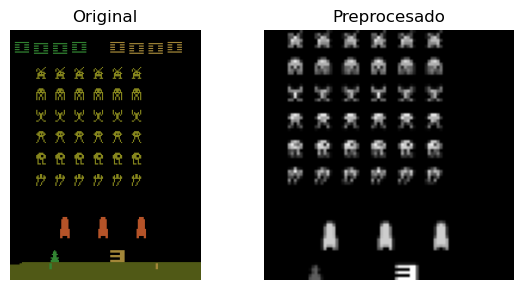

Shape de observación: (210, 160, 3)


In [37]:
# Entrenamiento del agente

# 1. Inicialización del entorno y componentes
env = gym.make(env_name)
num_actions = env.action_space.n
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. VERIFICACIÓN DEL PREPROCESAMIENTO (AÑADE ESTO)
print("\n=== Verificando preprocesamiento de frames ===")
verify_preprocessing(episodes=1, save_images=True)

# 3. Inicialización de modelos
policy = DQN((4, 84, 84), num_actions).to(device)
target = DQN((4, 84, 84), num_actions).to(device)
target.load_state_dict(policy.state_dict())
opt = torch.optim.Adam(policy.parameters(), lr=1e-4)
buffer = ReplayBuffer(1000000)
stacker = FrameStack(4)

obs, _ = env.reset()
print("Shape de observación:", obs.shape)

### 2. Implementación de la solución DQN

In [40]:
# Evaluación del agente en modo test
def test_agent(env, model, num_episodes=10):
    model.eval()
    total_rewards = []
    for _ in range(num_episodes):
        obs, _ = env.reset()
        state = stacker.reset(obs)
        done = False
        total_reward = 0
        while not done:
            action = select_action(model, state, epsilon=0.0, num_actions=num_actions, device=device)
            next_obs, reward, terminated, truncated, _ = env.step(action)
            state = stacker.step(next_obs)
            normalized_reward = np.clip(reward, -1.0, 1.0)
            total_reward += normalized_reward
            done = terminated or truncated
        total_rewards.append(total_reward)
    avg_reward = np.mean(total_rewards)
    print(f'Recompensa media en test: {avg_reward:.2f}')
    return avg_reward


In [22]:
# Entrenamiento del agente DQN
num_episodes = 1500
batch_size = 64
gamma = 0.99
epsilon_start = 1.0
epsilon_final = 0.1
epsilon_decay = 500_000
target_update_freq = 1000
train_freq = 4
checkpoint_path = 'modelo_final.pth'
steps_done = 0
epsilon = epsilon_start
rewards = []
from tqdm import trange

for episode in trange(num_episodes):
    obs, _ = env.reset()
    state = stacker.reset(obs)
    done = False
    total_reward = 0
    total_normalized_reward = 0

    while not done:
        epsilon = epsilon_final + (epsilon_start - epsilon_final) * np.exp(-1.0 * steps_done / epsilon_decay)
        action = select_action(policy, state, epsilon, num_actions, device)
        next_obs, reward, terminated, truncated, _ = env.step(action)
        next_state = stacker.step(next_obs)
        done = terminated or truncated
        normalized_reward = np.clip(reward, -1.0, 1.0)
        buffer.push(state, action, normalized_reward, next_state, done)
        state = next_state
        total_reward += reward
        total_normalized_reward += normalized_reward
        steps_done += 1

        if steps_done % train_freq == 0:
            train(policy, target, buffer, opt, batch_size, gamma, device)

        if steps_done % target_update_freq == 0:
            target.load_state_dict(policy.state_dict())
            
    rewards.append(total_normalized_reward)
    
    avg_last_10 = np.mean(rewards[-10:]) if len(rewards) >= 10 else 0
    
    print(f"Episode {episode}: Reward: {total_normalized_reward} | Score: {total_reward} | Avg last 10: {avg_last_10:.1f}")

    if episode % 100 == 0:
        avg_test = test_agent(env, policy, num_episodes=5)
        print(f"Evaluación @ {episode} ep -> reward media: {avg_test}")
    
    if episode % 500 == 0:
        torch.save(policy.state_dict(), f'model_checkpoint_{episode}.pth')
    
    if len(rewards) > 10 and avg_last_10 >= 20:
        torch.save(policy.state_dict(), checkpoint_path)
        print(f'Modelo guardado - Recompensa normalizada media últimos 10: {avg_last_10:.1f}')

  0%|          | 0/1500 [00:00<?, ?it/s]

Episode 0: Reward: 12.0 | Score: 165.0 | Avg last 10: 0.0


  0%|          | 1/1500 [00:10<4:10:42, 10.03s/it]

Recompensa media en test: 390.00
Evaluación @ 0 ep -> reward media: 390.0


  0%|          | 2/1500 [00:22<4:53:20, 11.75s/it]

Episode 1: Reward: 17.0 | Score: 285.0 | Avg last 10: 0.0


  0%|          | 3/1500 [00:29<3:56:21,  9.47s/it]

Episode 2: Reward: 5.0 | Score: 55.0 | Avg last 10: 0.0


  0%|          | 4/1500 [00:36<3:31:48,  8.50s/it]

Episode 3: Reward: 6.0 | Score: 85.0 | Avg last 10: 0.0


  0%|          | 5/1500 [00:44<3:24:45,  8.22s/it]

Episode 4: Reward: 9.0 | Score: 135.0 | Avg last 10: 0.0


  0%|          | 6/1500 [00:50<3:03:15,  7.36s/it]

Episode 5: Reward: 4.0 | Score: 65.0 | Avg last 10: 0.0


  0%|          | 7/1500 [00:57<3:01:06,  7.28s/it]

Episode 6: Reward: 6.0 | Score: 65.0 | Avg last 10: 0.0


  1%|          | 8/1500 [01:06<3:18:48,  8.00s/it]

Episode 7: Reward: 13.0 | Score: 370.0 | Avg last 10: 0.0


  1%|          | 9/1500 [01:11<2:56:04,  7.09s/it]

Episode 8: Reward: 5.0 | Score: 75.0 | Avg last 10: 0.0


  1%|          | 10/1500 [01:19<2:59:22,  7.22s/it]

Episode 9: Reward: 7.0 | Score: 110.0 | Avg last 10: 8.4


  1%|          | 11/1500 [01:28<3:16:01,  7.90s/it]

Episode 10: Reward: 9.0 | Score: 135.0 | Avg last 10: 8.1


  1%|          | 12/1500 [01:39<3:35:45,  8.70s/it]

Episode 11: Reward: 16.0 | Score: 220.0 | Avg last 10: 8.0


  1%|          | 13/1500 [01:45<3:18:42,  8.02s/it]

Episode 12: Reward: 5.0 | Score: 45.0 | Avg last 10: 8.0


  1%|          | 14/1500 [01:54<3:20:33,  8.10s/it]

Episode 13: Reward: 9.0 | Score: 135.0 | Avg last 10: 8.3


  1%|          | 15/1500 [02:07<4:00:05,  9.70s/it]

Episode 14: Reward: 15.0 | Score: 230.0 | Avg last 10: 8.9


  1%|          | 16/1500 [02:15<3:46:21,  9.15s/it]

Episode 15: Reward: 8.0 | Score: 105.0 | Avg last 10: 9.3


  1%|          | 17/1500 [02:21<3:23:14,  8.22s/it]

Episode 16: Reward: 7.0 | Score: 80.0 | Avg last 10: 9.4


  1%|          | 18/1500 [02:31<3:39:11,  8.87s/it]

Episode 17: Reward: 6.0 | Score: 80.0 | Avg last 10: 8.7


  1%|▏         | 19/1500 [02:40<3:36:01,  8.75s/it]

Episode 18: Reward: 8.0 | Score: 120.0 | Avg last 10: 9.0


  1%|▏         | 20/1500 [02:47<3:21:33,  8.17s/it]

Episode 19: Reward: 6.0 | Score: 80.0 | Avg last 10: 8.9


  1%|▏         | 21/1500 [02:55<3:24:42,  8.30s/it]

Episode 20: Reward: 11.0 | Score: 180.0 | Avg last 10: 9.1


  1%|▏         | 22/1500 [03:04<3:27:36,  8.43s/it]

Episode 21: Reward: 6.0 | Score: 90.0 | Avg last 10: 8.1


  2%|▏         | 23/1500 [03:13<3:32:09,  8.62s/it]

Episode 22: Reward: 10.0 | Score: 165.0 | Avg last 10: 8.6


  2%|▏         | 24/1500 [03:26<4:01:29,  9.82s/it]

Episode 23: Reward: 16.0 | Score: 245.0 | Avg last 10: 9.3


  2%|▏         | 25/1500 [03:37<4:15:46, 10.40s/it]

Episode 24: Reward: 15.0 | Score: 240.0 | Avg last 10: 9.3


  2%|▏         | 26/1500 [03:46<4:04:08,  9.94s/it]

Episode 25: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.4


  2%|▏         | 27/1500 [03:54<3:47:05,  9.25s/it]

Episode 26: Reward: 4.0 | Score: 50.0 | Avg last 10: 9.1


  2%|▏         | 28/1500 [04:01<3:30:43,  8.59s/it]

Episode 27: Reward: 6.0 | Score: 60.0 | Avg last 10: 9.1


  2%|▏         | 29/1500 [04:08<3:21:26,  8.22s/it]

Episode 28: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.9


  2%|▏         | 30/1500 [04:14<3:04:48,  7.54s/it]

Episode 29: Reward: 3.0 | Score: 20.0 | Avg last 10: 8.6


  2%|▏         | 31/1500 [04:22<3:02:54,  7.47s/it]

Episode 30: Reward: 5.0 | Score: 55.0 | Avg last 10: 8.0


  2%|▏         | 32/1500 [04:33<3:29:19,  8.56s/it]

Episode 31: Reward: 12.0 | Score: 210.0 | Avg last 10: 8.6


  2%|▏         | 33/1500 [04:45<3:54:44,  9.60s/it]

Episode 32: Reward: 13.0 | Score: 215.0 | Avg last 10: 8.9


  2%|▏         | 34/1500 [04:55<4:01:01,  9.86s/it]

Episode 33: Reward: 12.0 | Score: 210.0 | Avg last 10: 8.5


  2%|▏         | 35/1500 [05:02<3:37:14,  8.90s/it]

Episode 34: Reward: 6.0 | Score: 85.0 | Avg last 10: 7.6


  2%|▏         | 36/1500 [05:10<3:34:26,  8.79s/it]

Episode 35: Reward: 6.0 | Score: 105.0 | Avg last 10: 7.3


  2%|▏         | 37/1500 [05:19<3:34:12,  8.78s/it]

Episode 36: Reward: 9.0 | Score: 110.0 | Avg last 10: 7.8


  3%|▎         | 38/1500 [08:50<28:12:19, 69.45s/it]

Episode 37: Reward: 9.0 | Score: 135.0 | Avg last 10: 8.1


  3%|▎         | 39/1500 [09:06<21:39:55, 53.39s/it]

Episode 38: Reward: 20.0 | Score: 325.0 | Avg last 10: 9.5


  3%|▎         | 40/1500 [09:13<15:59:49, 39.44s/it]

Episode 39: Reward: 6.0 | Score: 60.0 | Avg last 10: 9.8


  3%|▎         | 41/1500 [09:22<12:14:34, 30.21s/it]

Episode 40: Reward: 8.0 | Score: 120.0 | Avg last 10: 10.1


  3%|▎         | 42/1500 [09:33<9:58:36, 24.63s/it] 

Episode 41: Reward: 10.0 | Score: 155.0 | Avg last 10: 9.9


  3%|▎         | 43/1500 [09:46<8:28:03, 20.92s/it]

Episode 42: Reward: 15.0 | Score: 215.0 | Avg last 10: 10.1


  3%|▎         | 44/1500 [09:52<6:43:25, 16.62s/it]

Episode 43: Reward: 9.0 | Score: 125.0 | Avg last 10: 9.8


  3%|▎         | 45/1500 [09:58<5:28:24, 13.54s/it]

Episode 44: Reward: 9.0 | Score: 125.0 | Avg last 10: 10.1


  3%|▎         | 46/1500 [10:09<5:08:17, 12.72s/it]

Episode 45: Reward: 12.0 | Score: 385.0 | Avg last 10: 10.7


  3%|▎         | 47/1500 [10:17<4:33:50, 11.31s/it]

Episode 46: Reward: 4.0 | Score: 50.0 | Avg last 10: 10.2


  3%|▎         | 48/1500 [10:27<4:25:10, 10.96s/it]

Episode 47: Reward: 10.0 | Score: 140.0 | Avg last 10: 10.3


  3%|▎         | 49/1500 [10:35<3:59:55,  9.92s/it]

Episode 48: Reward: 8.0 | Score: 100.0 | Avg last 10: 9.1


  3%|▎         | 50/1500 [10:42<3:36:18,  8.95s/it]

Episode 49: Reward: 5.0 | Score: 75.0 | Avg last 10: 9.0


  3%|▎         | 51/1500 [10:47<3:07:55,  7.78s/it]

Episode 50: Reward: 5.0 | Score: 75.0 | Avg last 10: 8.7


  3%|▎         | 52/1500 [10:54<3:06:12,  7.72s/it]

Episode 51: Reward: 8.0 | Score: 120.0 | Avg last 10: 8.5


  4%|▎         | 53/1500 [11:00<2:49:13,  7.02s/it]

Episode 52: Reward: 7.0 | Score: 90.0 | Avg last 10: 7.7


  4%|▎         | 54/1500 [12:42<14:19:51, 35.68s/it]

Episode 53: Reward: 11.0 | Score: 180.0 | Avg last 10: 7.9


  4%|▎         | 55/1500 [27:54<119:46:35, 298.41s/it]

Episode 54: Reward: 13.0 | Score: 200.0 | Avg last 10: 8.3


  4%|▎         | 56/1500 [28:00<84:35:08, 210.88s/it] 

Episode 55: Reward: 9.0 | Score: 135.0 | Avg last 10: 8.0


  4%|▍         | 57/1500 [28:10<60:22:20, 150.62s/it]

Episode 56: Reward: 10.0 | Score: 150.0 | Avg last 10: 8.6


  4%|▍         | 58/1500 [43:18<151:20:37, 377.83s/it]

Episode 57: Reward: 3.0 | Score: 20.0 | Avg last 10: 7.9


  4%|▍         | 59/1500 [43:26<106:50:54, 266.94s/it]

Episode 58: Reward: 5.0 | Score: 45.0 | Avg last 10: 7.6


  4%|▍         | 60/1500 [43:33<75:30:19, 188.76s/it] 

Episode 59: Reward: 4.0 | Score: 50.0 | Avg last 10: 7.5


  4%|▍         | 61/1500 [43:40<53:39:41, 134.25s/it]

Episode 60: Reward: 8.0 | Score: 85.0 | Avg last 10: 7.8


  4%|▍         | 62/1500 [58:46<146:08:38, 365.87s/it]

Episode 61: Reward: 6.0 | Score: 80.0 | Avg last 10: 7.6


  4%|▍         | 63/1500 [58:53<102:59:30, 258.02s/it]

Episode 62: Reward: 5.0 | Score: 55.0 | Avg last 10: 7.4


  4%|▍         | 64/1500 [59:03<73:14:47, 183.63s/it] 

Episode 63: Reward: 11.0 | Score: 135.0 | Avg last 10: 7.4


  4%|▍         | 65/1500 [1:09:43<127:51:41, 320.77s/it]

Episode 64: Reward: 7.0 | Score: 110.0 | Avg last 10: 6.8


  4%|▍         | 66/1500 [1:09:49<90:05:34, 226.17s/it] 

Episode 65: Reward: 8.0 | Score: 105.0 | Avg last 10: 6.7


  4%|▍         | 67/1500 [1:09:54<63:41:17, 160.00s/it]

Episode 66: Reward: 3.0 | Score: 20.0 | Avg last 10: 6.0


  5%|▍         | 68/1500 [1:10:03<45:38:00, 114.72s/it]

Episode 67: Reward: 7.0 | Score: 110.0 | Avg last 10: 6.4


  5%|▍         | 69/1500 [1:10:12<32:57:56, 82.93s/it] 

Episode 68: Reward: 10.0 | Score: 155.0 | Avg last 10: 6.9


  5%|▍         | 70/1500 [1:10:19<23:48:35, 59.94s/it]

Episode 69: Reward: 5.0 | Score: 45.0 | Avg last 10: 7.0


  5%|▍         | 71/1500 [1:10:26<17:31:01, 44.13s/it]

Episode 70: Reward: 5.0 | Score: 55.0 | Avg last 10: 6.7


  5%|▍         | 72/1500 [1:10:33<13:06:52, 33.06s/it]

Episode 71: Reward: 7.0 | Score: 110.0 | Avg last 10: 6.8


  5%|▍         | 73/1500 [1:10:38<9:46:51, 24.67s/it] 

Episode 72: Reward: 4.0 | Score: 50.0 | Avg last 10: 6.7


  5%|▍         | 74/1500 [1:10:46<7:48:59, 19.73s/it]

Episode 73: Reward: 10.0 | Score: 155.0 | Avg last 10: 6.6


  5%|▌         | 75/1500 [1:10:53<6:14:50, 15.78s/it]

Episode 74: Reward: 9.0 | Score: 135.0 | Avg last 10: 6.8


  5%|▌         | 76/1500 [1:11:01<5:19:56, 13.48s/it]

Episode 75: Reward: 4.0 | Score: 40.0 | Avg last 10: 6.4


  5%|▌         | 77/1500 [1:11:11<4:57:16, 12.53s/it]

Episode 76: Reward: 17.0 | Score: 235.0 | Avg last 10: 7.8


  5%|▌         | 78/1500 [1:11:20<4:27:27, 11.28s/it]

Episode 77: Reward: 7.0 | Score: 110.0 | Avg last 10: 7.8


  5%|▌         | 79/1500 [1:11:25<3:43:39,  9.44s/it]

Episode 78: Reward: 6.0 | Score: 90.0 | Avg last 10: 7.4


  5%|▌         | 80/1500 [1:11:38<4:10:21, 10.58s/it]

Episode 79: Reward: 19.0 | Score: 280.0 | Avg last 10: 8.8


  5%|▌         | 81/1500 [1:11:43<3:30:59,  8.92s/it]

Episode 80: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.9


  5%|▌         | 82/1500 [1:11:51<3:20:09,  8.47s/it]

Episode 81: Reward: 8.0 | Score: 105.0 | Avg last 10: 9.0


  6%|▌         | 83/1500 [1:12:00<3:29:03,  8.85s/it]

Episode 82: Reward: 12.0 | Score: 210.0 | Avg last 10: 9.8


  6%|▌         | 84/1500 [1:12:10<3:38:07,  9.24s/it]

Episode 83: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.7


  6%|▌         | 85/1500 [1:12:16<3:10:42,  8.09s/it]

Episode 84: Reward: 7.0 | Score: 80.0 | Avg last 10: 9.5


  6%|▌         | 86/1500 [1:27:25<109:20:24, 278.38s/it]

Episode 85: Reward: 8.0 | Score: 110.0 | Avg last 10: 9.9


  6%|▌         | 87/1500 [1:27:31<77:14:57, 196.81s/it] 

Episode 86: Reward: 7.0 | Score: 90.0 | Avg last 10: 8.9


  6%|▌         | 88/1500 [1:27:40<55:05:06, 140.44s/it]

Episode 87: Reward: 10.0 | Score: 155.0 | Avg last 10: 9.2


  6%|▌         | 89/1500 [1:42:52<145:43:42, 371.81s/it]

Episode 88: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.5


  6%|▌         | 90/1500 [1:43:05<103:26:26, 264.10s/it]

Episode 89: Reward: 14.0 | Score: 225.0 | Avg last 10: 9.0


  6%|▌         | 91/1500 [1:43:14<73:25:02, 187.58s/it] 

Episode 90: Reward: 7.0 | Score: 110.0 | Avg last 10: 9.1


  6%|▌         | 92/1500 [1:45:25<66:44:29, 170.65s/it]

Episode 91: Reward: 5.0 | Score: 75.0 | Avg last 10: 8.8


  6%|▌         | 93/1500 [1:59:35<146:24:51, 374.62s/it]

Episode 92: Reward: 7.0 | Score: 110.0 | Avg last 10: 8.3


  6%|▋         | 94/1500 [1:59:44<103:24:41, 264.78s/it]

Episode 93: Reward: 14.0 | Score: 210.0 | Avg last 10: 8.8


  6%|▋         | 95/1500 [1:59:53<73:25:07, 188.12s/it] 

Episode 94: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.0


  6%|▋         | 96/1500 [2:00:05<52:45:03, 135.26s/it]

Episode 95: Reward: 15.0 | Score: 200.0 | Avg last 10: 9.7


  6%|▋         | 97/1500 [2:00:14<37:55:42, 97.32s/it] 

Episode 96: Reward: 10.0 | Score: 155.0 | Avg last 10: 10.0


  7%|▋         | 98/1500 [2:00:24<27:46:09, 71.30s/it]

Episode 97: Reward: 12.0 | Score: 210.0 | Avg last 10: 10.2


  7%|▋         | 99/1500 [2:00:32<20:18:16, 52.17s/it]

Episode 98: Reward: 8.0 | Score: 120.0 | Avg last 10: 10.1


  7%|▋         | 100/1500 [2:00:48<16:01:58, 41.23s/it]

Episode 99: Reward: 14.0 | Score: 425.0 | Avg last 10: 10.1
Episode 100: Reward: 5.0 | Score: 75.0 | Avg last 10: 9.9


  7%|▋         | 101/1500 [2:00:56<12:07:44, 31.21s/it]

Recompensa media en test: 105.00
Evaluación @ 100 ep -> reward media: 105.0


  7%|▋         | 102/1500 [2:01:01<9:08:02, 23.52s/it] 

Episode 101: Reward: 7.0 | Score: 110.0 | Avg last 10: 10.1


  7%|▋         | 103/1500 [2:01:11<7:31:26, 19.39s/it]

Episode 102: Reward: 7.0 | Score: 110.0 | Avg last 10: 10.1


  7%|▋         | 104/1500 [2:01:16<5:49:55, 15.04s/it]

Episode 103: Reward: 4.0 | Score: 50.0 | Avg last 10: 9.1


  7%|▋         | 105/1500 [2:01:26<5:17:07, 13.64s/it]

Episode 104: Reward: 10.0 | Score: 155.0 | Avg last 10: 9.2


  7%|▋         | 106/1500 [2:01:34<4:38:35, 11.99s/it]

Episode 105: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.3


  7%|▋         | 107/1500 [2:01:43<4:13:10, 10.90s/it]

Episode 106: Reward: 7.0 | Score: 110.0 | Avg last 10: 8.0


  7%|▋         | 108/1500 [2:01:50<3:46:09,  9.75s/it]

Episode 107: Reward: 8.0 | Score: 120.0 | Avg last 10: 7.6


  7%|▋         | 109/1500 [2:01:55<3:16:45,  8.49s/it]

Episode 108: Reward: 4.0 | Score: 50.0 | Avg last 10: 7.2


  7%|▋         | 110/1500 [2:02:01<2:55:05,  7.56s/it]

Episode 109: Reward: 5.0 | Score: 55.0 | Avg last 10: 6.3


  7%|▋         | 111/1500 [2:02:12<3:23:40,  8.80s/it]

Episode 110: Reward: 15.0 | Score: 195.0 | Avg last 10: 7.3


  7%|▋         | 112/1500 [2:02:22<3:30:31,  9.10s/it]

Episode 111: Reward: 14.0 | Score: 215.0 | Avg last 10: 8.0


  8%|▊         | 113/1500 [2:02:31<3:30:51,  9.12s/it]

Episode 112: Reward: 11.0 | Score: 180.0 | Avg last 10: 8.4


  8%|▊         | 114/1500 [2:02:42<3:42:50,  9.65s/it]

Episode 113: Reward: 13.0 | Score: 215.0 | Avg last 10: 9.3


  8%|▊         | 115/1500 [2:02:48<3:17:43,  8.57s/it]

Episode 114: Reward: 6.0 | Score: 65.0 | Avg last 10: 8.9


  8%|▊         | 116/1500 [2:17:58<107:11:25, 278.82s/it]

Episode 115: Reward: 11.0 | Score: 180.0 | Avg last 10: 9.4


  8%|▊         | 117/1500 [2:18:07<76:02:26, 197.94s/it] 

Episode 116: Reward: 5.0 | Score: 75.0 | Avg last 10: 9.2


  8%|▊         | 118/1500 [2:18:16<54:15:04, 141.32s/it]

Episode 117: Reward: 11.0 | Score: 160.0 | Avg last 10: 9.5


  8%|▊         | 119/1500 [2:18:24<38:53:20, 101.38s/it]

Episode 118: Reward: 8.0 | Score: 120.0 | Avg last 10: 9.9


  8%|▊         | 120/1500 [2:33:32<131:33:17, 343.19s/it]

Episode 119: Reward: 6.0 | Score: 65.0 | Avg last 10: 10.0


  8%|▊         | 121/1500 [2:33:40<92:55:49, 242.60s/it] 

Episode 120: Reward: 9.0 | Score: 125.0 | Avg last 10: 9.4


  8%|▊         | 122/1500 [2:33:44<65:34:03, 171.29s/it]

Episode 121: Reward: 6.0 | Score: 75.0 | Avg last 10: 8.6


  8%|▊         | 123/1500 [2:33:57<47:17:50, 123.65s/it]

Episode 122: Reward: 13.0 | Score: 175.0 | Avg last 10: 8.8


  8%|▊         | 124/1500 [2:34:21<35:47:35, 93.65s/it] 

Episode 123: Reward: 10.0 | Score: 155.0 | Avg last 10: 8.5


  8%|▊         | 125/1500 [2:49:36<129:56:00, 340.19s/it]

Episode 124: Reward: 22.0 | Score: 365.0 | Avg last 10: 10.1


  8%|▊         | 126/1500 [2:49:49<92:19:52, 241.92s/it] 

Episode 125: Reward: 11.0 | Score: 160.0 | Avg last 10: 10.1


  8%|▊         | 127/1500 [2:52:27<82:39:47, 216.74s/it]

Episode 126: Reward: 13.0 | Score: 205.0 | Avg last 10: 10.9


  9%|▊         | 128/1500 [2:52:32<58:25:39, 153.31s/it]

Episode 127: Reward: 6.0 | Score: 60.0 | Avg last 10: 10.4


  9%|▊         | 129/1500 [2:52:43<42:05:02, 110.50s/it]

Episode 128: Reward: 12.0 | Score: 155.0 | Avg last 10: 10.8


  9%|▊         | 130/1500 [2:52:56<30:57:46, 81.36s/it] 

Episode 129: Reward: 13.0 | Score: 385.0 | Avg last 10: 11.5


  9%|▊         | 131/1500 [2:53:05<22:39:18, 59.58s/it]

Episode 130: Reward: 8.0 | Score: 105.0 | Avg last 10: 11.4


  9%|▉         | 132/1500 [2:53:10<16:27:42, 43.32s/it]

Episode 131: Reward: 7.0 | Score: 80.0 | Avg last 10: 11.5


  9%|▉         | 133/1500 [2:53:21<12:48:14, 33.72s/it]

Episode 132: Reward: 11.0 | Score: 175.0 | Avg last 10: 11.3


  9%|▉         | 134/1500 [2:54:14<14:59:01, 39.49s/it]

Episode 133: Reward: 10.0 | Score: 155.0 | Avg last 10: 11.3


  9%|▉         | 135/1500 [2:54:26<11:49:59, 31.21s/it]

Episode 134: Reward: 11.0 | Score: 180.0 | Avg last 10: 10.2


  9%|▉         | 136/1500 [2:54:32<8:55:29, 23.56s/it] 

Episode 135: Reward: 7.0 | Score: 90.0 | Avg last 10: 9.8


  9%|▉         | 137/1500 [2:54:40<7:10:13, 18.94s/it]

Episode 136: Reward: 3.0 | Score: 20.0 | Avg last 10: 8.8


  9%|▉         | 138/1500 [2:54:47<5:45:21, 15.21s/it]

Episode 137: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.8


  9%|▉         | 139/1500 [2:54:56<5:02:37, 13.34s/it]

Episode 138: Reward: 12.0 | Score: 170.0 | Avg last 10: 8.8


  9%|▉         | 140/1500 [2:55:03<4:21:25, 11.53s/it]

Episode 139: Reward: 7.0 | Score: 90.0 | Avg last 10: 8.2


  9%|▉         | 141/1500 [2:55:13<4:10:41, 11.07s/it]

Episode 140: Reward: 14.0 | Score: 195.0 | Avg last 10: 8.8


  9%|▉         | 142/1500 [2:55:20<3:45:00,  9.94s/it]

Episode 141: Reward: 8.0 | Score: 120.0 | Avg last 10: 8.9


 10%|▉         | 143/1500 [2:55:32<3:57:05, 10.48s/it]

Episode 142: Reward: 16.0 | Score: 225.0 | Avg last 10: 9.4


 10%|▉         | 144/1500 [2:55:46<4:17:57, 11.41s/it]

Episode 143: Reward: 13.0 | Score: 365.0 | Avg last 10: 9.7


 10%|▉         | 145/1500 [2:55:54<3:54:58, 10.40s/it]

Episode 144: Reward: 10.0 | Score: 165.0 | Avg last 10: 9.6


 10%|▉         | 146/1500 [2:55:59<3:19:55,  8.86s/it]

Episode 145: Reward: 7.0 | Score: 110.0 | Avg last 10: 9.6


 10%|▉         | 147/1500 [2:56:05<3:02:41,  8.10s/it]

Episode 146: Reward: 7.0 | Score: 135.0 | Avg last 10: 10.0


 10%|▉         | 148/1500 [2:56:17<3:26:11,  9.15s/it]

Episode 147: Reward: 15.0 | Score: 240.0 | Avg last 10: 10.9


 10%|▉         | 149/1500 [2:56:28<3:37:45,  9.67s/it]

Episode 148: Reward: 12.0 | Score: 210.0 | Avg last 10: 10.9


 10%|█         | 150/1500 [2:56:37<3:37:57,  9.69s/it]

Episode 149: Reward: 9.0 | Score: 145.0 | Avg last 10: 11.1


 10%|█         | 151/1500 [2:56:46<3:28:10,  9.26s/it]

Episode 150: Reward: 7.0 | Score: 65.0 | Avg last 10: 10.4


 10%|█         | 152/1500 [2:56:55<3:26:50,  9.21s/it]

Episode 151: Reward: 14.0 | Score: 225.0 | Avg last 10: 11.0


 10%|█         | 153/1500 [2:59:46<21:37:47, 57.81s/it]

Episode 152: Reward: 9.0 | Score: 135.0 | Avg last 10: 10.3


 10%|█         | 154/1500 [2:59:55<16:08:58, 43.19s/it]

Episode 153: Reward: 10.0 | Score: 130.0 | Avg last 10: 10.0


 10%|█         | 155/1500 [3:00:03<12:11:02, 32.61s/it]

Episode 154: Reward: 7.0 | Score: 90.0 | Avg last 10: 9.7


 10%|█         | 156/1500 [3:00:11<9:28:14, 25.37s/it] 

Episode 155: Reward: 8.0 | Score: 120.0 | Avg last 10: 9.8


 10%|█         | 157/1500 [3:00:19<7:29:15, 20.07s/it]

Episode 156: Reward: 9.0 | Score: 125.0 | Avg last 10: 10.0


 11%|█         | 158/1500 [3:00:25<5:51:43, 15.73s/it]

Episode 157: Reward: 4.0 | Score: 50.0 | Avg last 10: 8.9


 11%|█         | 159/1500 [3:00:31<4:51:39, 13.05s/it]

Episode 158: Reward: 7.0 | Score: 80.0 | Avg last 10: 8.4


 11%|█         | 160/1500 [3:00:36<3:54:15, 10.49s/it]

Episode 159: Reward: 5.0 | Score: 75.0 | Avg last 10: 8.0


 11%|█         | 161/1500 [3:00:46<3:51:40, 10.38s/it]

Episode 160: Reward: 10.0 | Score: 335.0 | Avg last 10: 8.3


 11%|█         | 162/1500 [3:00:51<3:15:17,  8.76s/it]

Episode 161: Reward: 7.0 | Score: 80.0 | Avg last 10: 7.6


 11%|█         | 163/1500 [3:00:59<3:09:45,  8.52s/it]

Episode 162: Reward: 3.0 | Score: 30.0 | Avg last 10: 7.0


 11%|█         | 164/1500 [3:01:08<3:12:10,  8.63s/it]

Episode 163: Reward: 12.0 | Score: 185.0 | Avg last 10: 7.2


 11%|█         | 165/1500 [3:01:20<3:36:58,  9.75s/it]

Episode 164: Reward: 18.0 | Score: 450.0 | Avg last 10: 8.3


 11%|█         | 166/1500 [3:01:30<3:36:40,  9.75s/it]

Episode 165: Reward: 8.0 | Score: 120.0 | Avg last 10: 8.3


 11%|█         | 167/1500 [3:01:35<3:03:58,  8.28s/it]

Episode 166: Reward: 10.0 | Score: 115.0 | Avg last 10: 8.4


 11%|█         | 168/1500 [3:01:43<3:04:32,  8.31s/it]

Episode 167: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.6


 11%|█▏        | 169/1500 [3:01:50<2:52:54,  7.79s/it]

Episode 168: Reward: 8.0 | Score: 120.0 | Avg last 10: 8.7


 11%|█▏        | 170/1500 [3:01:59<3:00:24,  8.14s/it]

Episode 169: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.8


 11%|█▏        | 171/1500 [3:03:04<9:19:01, 25.24s/it]

Episode 170: Reward: 7.0 | Score: 110.0 | Avg last 10: 8.5


 11%|█▏        | 172/1500 [3:03:14<7:39:07, 20.74s/it]

Episode 171: Reward: 10.0 | Score: 155.0 | Avg last 10: 8.8


 12%|█▏        | 173/1500 [3:03:19<5:52:50, 15.95s/it]

Episode 172: Reward: 2.0 | Score: 15.0 | Avg last 10: 8.7


 12%|█▏        | 174/1500 [3:03:27<4:57:36, 13.47s/it]

Episode 173: Reward: 9.0 | Score: 135.0 | Avg last 10: 8.4


 12%|█▏        | 175/1500 [3:03:34<4:13:29, 11.48s/it]

Episode 174: Reward: 8.0 | Score: 120.0 | Avg last 10: 7.4


 12%|█▏        | 176/1500 [3:03:42<3:54:52, 10.64s/it]

Episode 175: Reward: 8.0 | Score: 120.0 | Avg last 10: 7.4


 12%|█▏        | 177/1500 [3:03:56<4:15:35, 11.59s/it]

Episode 176: Reward: 18.0 | Score: 285.0 | Avg last 10: 8.2


 12%|█▏        | 178/1500 [3:04:06<4:06:47, 11.20s/it]

Episode 177: Reward: 12.0 | Score: 210.0 | Avg last 10: 8.8


 12%|█▏        | 179/1500 [3:04:18<4:10:47, 11.39s/it]

Episode 178: Reward: 9.0 | Score: 150.0 | Avg last 10: 8.9


 12%|█▏        | 180/1500 [3:04:25<3:42:48, 10.13s/it]

Episode 179: Reward: 6.0 | Score: 85.0 | Avg last 10: 8.9


 12%|█▏        | 181/1500 [3:04:38<3:56:29, 10.76s/it]

Episode 180: Reward: 19.0 | Score: 320.0 | Avg last 10: 10.1


 12%|█▏        | 182/1500 [3:04:47<3:47:39, 10.36s/it]

Episode 181: Reward: 18.0 | Score: 260.0 | Avg last 10: 10.9


 12%|█▏        | 183/1500 [3:05:00<4:06:56, 11.25s/it]

Episode 182: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.6


 12%|█▏        | 184/1500 [3:05:10<3:53:19, 10.64s/it]

Episode 183: Reward: 14.0 | Score: 210.0 | Avg last 10: 12.1


 12%|█▏        | 185/1500 [3:05:43<6:26:03, 17.61s/it]

Episode 184: Reward: 12.0 | Score: 210.0 | Avg last 10: 12.5


 12%|█▏        | 186/1500 [3:05:57<6:02:07, 16.54s/it]

Episode 185: Reward: 17.0 | Score: 250.0 | Avg last 10: 13.4


 12%|█▏        | 187/1500 [3:06:04<4:58:22, 13.63s/it]

Episode 186: Reward: 7.0 | Score: 110.0 | Avg last 10: 12.3


 13%|█▎        | 188/1500 [3:06:16<4:47:59, 13.17s/it]

Episode 187: Reward: 13.0 | Score: 215.0 | Avg last 10: 12.4


 13%|█▎        | 189/1500 [3:06:25<4:17:57, 11.81s/it]

Episode 188: Reward: 5.0 | Score: 65.0 | Avg last 10: 12.0


 13%|█▎        | 190/1500 [3:06:37<4:19:03, 11.87s/it]

Episode 189: Reward: 16.0 | Score: 260.0 | Avg last 10: 13.0


 13%|█▎        | 191/1500 [3:06:46<3:58:53, 10.95s/it]

Episode 190: Reward: 7.0 | Score: 110.0 | Avg last 10: 11.8


 13%|█▎        | 192/1500 [3:06:57<3:57:29, 10.89s/it]

Episode 191: Reward: 11.0 | Score: 180.0 | Avg last 10: 11.1


 13%|█▎        | 193/1500 [3:07:12<4:23:46, 12.11s/it]

Episode 192: Reward: 21.0 | Score: 365.0 | Avg last 10: 12.3


 13%|█▎        | 194/1500 [3:07:18<3:46:02, 10.38s/it]

Episode 193: Reward: 10.0 | Score: 155.0 | Avg last 10: 11.9


 13%|█▎        | 195/1500 [3:07:33<4:16:12, 11.78s/it]

Episode 194: Reward: 14.0 | Score: 215.0 | Avg last 10: 12.1


 13%|█▎        | 196/1500 [3:07:40<3:44:53, 10.35s/it]

Episode 195: Reward: 3.0 | Score: 30.0 | Avg last 10: 10.7


 13%|█▎        | 197/1500 [3:07:51<3:50:19, 10.61s/it]

Episode 196: Reward: 14.0 | Score: 225.0 | Avg last 10: 11.4


 13%|█▎        | 198/1500 [3:23:03<101:34:59, 280.88s/it]

Episode 197: Reward: 8.0 | Score: 120.0 | Avg last 10: 10.9


 13%|█▎        | 199/1500 [3:23:11<71:59:23, 199.20s/it] 

Episode 198: Reward: 8.0 | Score: 105.0 | Avg last 10: 11.2


 13%|█▎        | 200/1500 [3:23:26<51:55:01, 143.77s/it]

Episode 199: Reward: 19.0 | Score: 490.0 | Avg last 10: 11.5
Episode 200: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.7


 13%|█▎        | 201/1500 [3:23:37<37:32:56, 104.06s/it]

Recompensa media en test: 147.00
Evaluación @ 200 ep -> reward media: 147.0


 13%|█▎        | 202/1500 [3:23:46<27:13:17, 75.50s/it] 

Episode 201: Reward: 10.0 | Score: 165.0 | Avg last 10: 11.6


 14%|█▎        | 203/1500 [3:23:54<19:52:50, 55.18s/it]

Episode 202: Reward: 6.0 | Score: 80.0 | Avg last 10: 10.1


 14%|█▎        | 204/1500 [3:23:59<14:27:26, 40.16s/it]

Episode 203: Reward: 6.0 | Score: 80.0 | Avg last 10: 9.7


 14%|█▎        | 205/1500 [3:24:07<11:01:58, 30.67s/it]

Episode 204: Reward: 10.0 | Score: 155.0 | Avg last 10: 9.3


 14%|█▎        | 206/1500 [3:24:22<9:15:47, 25.77s/it] 

Episode 205: Reward: 25.0 | Score: 435.0 | Avg last 10: 11.5


 14%|█▍        | 207/1500 [3:24:35<7:53:03, 21.95s/it]

Episode 206: Reward: 17.0 | Score: 245.0 | Avg last 10: 11.8


 14%|█▍        | 208/1500 [3:24:40<6:02:08, 16.82s/it]

Episode 207: Reward: 3.0 | Score: 30.0 | Avg last 10: 11.3


 14%|█▍        | 209/1500 [3:24:49<5:17:05, 14.74s/it]

Episode 208: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.4


 14%|█▍        | 210/1500 [3:24:56<4:25:28, 12.35s/it]

Episode 209: Reward: 6.0 | Score: 105.0 | Avg last 10: 10.1


 14%|█▍        | 211/1500 [3:25:03<3:51:10, 10.76s/it]

Episode 210: Reward: 8.0 | Score: 115.0 | Avg last 10: 10.0


 14%|█▍        | 212/1500 [3:25:13<3:42:00, 10.34s/it]

Episode 211: Reward: 8.0 | Score: 120.0 | Avg last 10: 9.8


 14%|█▍        | 213/1500 [3:25:21<3:26:59,  9.65s/it]

Episode 212: Reward: 11.0 | Score: 180.0 | Avg last 10: 10.3


 14%|█▍        | 214/1500 [3:25:34<3:47:48, 10.63s/it]

Episode 213: Reward: 19.0 | Score: 300.0 | Avg last 10: 11.6


 14%|█▍        | 215/1500 [3:25:42<3:31:22,  9.87s/it]

Episode 214: Reward: 7.0 | Score: 110.0 | Avg last 10: 11.3


 14%|█▍        | 216/1500 [3:25:48<3:07:34,  8.77s/it]

Episode 215: Reward: 4.0 | Score: 35.0 | Avg last 10: 9.2


 14%|█▍        | 217/1500 [3:25:56<3:04:48,  8.64s/it]

Episode 216: Reward: 11.0 | Score: 180.0 | Avg last 10: 8.6


 15%|█▍        | 218/1500 [3:26:05<3:06:33,  8.73s/it]

Episode 217: Reward: 11.0 | Score: 355.0 | Avg last 10: 9.4


 15%|█▍        | 219/1500 [3:26:19<3:37:43, 10.20s/it]

Episode 218: Reward: 14.0 | Score: 220.0 | Avg last 10: 9.9


 15%|█▍        | 220/1500 [3:26:33<4:02:06, 11.35s/it]

Episode 219: Reward: 20.0 | Score: 495.0 | Avg last 10: 11.3


 15%|█▍        | 221/1500 [3:26:43<3:51:05, 10.84s/it]

Episode 220: Reward: 7.0 | Score: 80.0 | Avg last 10: 11.2


 15%|█▍        | 222/1500 [3:26:49<3:23:35,  9.56s/it]

Episode 221: Reward: 5.0 | Score: 75.0 | Avg last 10: 10.9


 15%|█▍        | 223/1500 [3:26:59<3:25:22,  9.65s/it]

Episode 222: Reward: 9.0 | Score: 135.0 | Avg last 10: 10.7


 15%|█▍        | 224/1500 [3:27:13<3:51:58, 10.91s/it]

Episode 223: Reward: 17.0 | Score: 285.0 | Avg last 10: 10.5


 15%|█▌        | 225/1500 [3:27:19<3:23:42,  9.59s/it]

Episode 224: Reward: 4.0 | Score: 35.0 | Avg last 10: 10.2


 15%|█▌        | 226/1500 [3:27:30<3:31:26,  9.96s/it]

Episode 225: Reward: 14.0 | Score: 245.0 | Avg last 10: 11.2


 15%|█▌        | 227/1500 [3:27:38<3:20:41,  9.46s/it]

Episode 226: Reward: 7.0 | Score: 110.0 | Avg last 10: 10.8


 15%|█▌        | 228/1500 [3:27:47<3:16:56,  9.29s/it]

Episode 227: Reward: 12.0 | Score: 210.0 | Avg last 10: 10.9


 15%|█▌        | 229/1500 [3:27:54<2:59:12,  8.46s/it]

Episode 228: Reward: 6.0 | Score: 105.0 | Avg last 10: 10.1


 15%|█▌        | 230/1500 [3:28:03<3:03:23,  8.66s/it]

Episode 229: Reward: 7.0 | Score: 85.0 | Avg last 10: 8.8


 15%|█▌        | 231/1500 [3:28:11<3:01:47,  8.60s/it]

Episode 230: Reward: 6.0 | Score: 105.0 | Avg last 10: 8.7


 15%|█▌        | 232/1500 [3:28:20<3:03:20,  8.68s/it]

Episode 231: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.1


 16%|█▌        | 233/1500 [3:28:30<3:12:43,  9.13s/it]

Episode 232: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.1


 16%|█▌        | 234/1500 [3:28:39<3:10:16,  9.02s/it]

Episode 233: Reward: 10.0 | Score: 155.0 | Avg last 10: 8.4


 16%|█▌        | 235/1500 [3:28:50<3:21:30,  9.56s/it]

Episode 234: Reward: 12.0 | Score: 210.0 | Avg last 10: 9.2


 16%|█▌        | 236/1500 [3:28:59<3:16:53,  9.35s/it]

Episode 235: Reward: 7.0 | Score: 90.0 | Avg last 10: 8.5


 16%|█▌        | 237/1500 [3:29:05<2:54:11,  8.27s/it]

Episode 236: Reward: 5.0 | Score: 45.0 | Avg last 10: 8.3


 16%|█▌        | 238/1500 [3:29:09<2:32:13,  7.24s/it]

Episode 237: Reward: 6.0 | Score: 85.0 | Avg last 10: 7.7


 16%|█▌        | 239/1500 [3:29:20<2:53:13,  8.24s/it]

Episode 238: Reward: 10.0 | Score: 165.0 | Avg last 10: 8.1


 16%|█▌        | 240/1500 [3:29:32<3:15:35,  9.31s/it]

Episode 239: Reward: 15.0 | Score: 400.0 | Avg last 10: 8.9


 16%|█▌        | 241/1500 [3:29:37<2:51:12,  8.16s/it]

Episode 240: Reward: 7.0 | Score: 80.0 | Avg last 10: 9.0


 16%|█▌        | 242/1500 [3:29:46<2:52:03,  8.21s/it]

Episode 241: Reward: 11.0 | Score: 180.0 | Avg last 10: 9.2


 16%|█▌        | 243/1500 [3:29:53<2:44:28,  7.85s/it]

Episode 242: Reward: 8.0 | Score: 110.0 | Avg last 10: 9.1


 16%|█▋        | 244/1500 [3:30:05<3:14:47,  9.30s/it]

Episode 243: Reward: 12.0 | Score: 150.0 | Avg last 10: 9.3


 16%|█▋        | 245/1500 [3:30:16<3:21:45,  9.65s/it]

Episode 244: Reward: 12.0 | Score: 210.0 | Avg last 10: 9.3


 16%|█▋        | 246/1500 [3:30:30<3:51:57, 11.10s/it]

Episode 245: Reward: 9.0 | Score: 150.0 | Avg last 10: 9.5


 16%|█▋        | 247/1500 [3:30:39<3:37:57, 10.44s/it]

Episode 246: Reward: 8.0 | Score: 90.0 | Avg last 10: 9.8


 17%|█▋        | 248/1500 [3:30:45<3:08:49,  9.05s/it]

Episode 247: Reward: 4.0 | Score: 35.0 | Avg last 10: 9.6


 17%|█▋        | 249/1500 [3:30:53<3:01:22,  8.70s/it]

Episode 248: Reward: 8.0 | Score: 120.0 | Avg last 10: 9.4


 17%|█▋        | 250/1500 [3:31:07<3:33:10, 10.23s/it]

Episode 249: Reward: 25.0 | Score: 385.0 | Avg last 10: 10.4


 17%|█▋        | 251/1500 [3:31:14<3:11:45,  9.21s/it]

Episode 250: Reward: 9.0 | Score: 125.0 | Avg last 10: 10.6


 17%|█▋        | 252/1500 [3:31:25<3:28:29, 10.02s/it]

Episode 251: Reward: 14.0 | Score: 210.0 | Avg last 10: 10.9


 17%|█▋        | 253/1500 [3:31:31<3:01:38,  8.74s/it]

Episode 252: Reward: 7.0 | Score: 90.0 | Avg last 10: 10.8


 17%|█▋        | 254/1500 [3:31:42<3:15:04,  9.39s/it]

Episode 253: Reward: 12.0 | Score: 185.0 | Avg last 10: 10.8


 17%|█▋        | 255/1500 [3:31:48<2:50:08,  8.20s/it]

Episode 254: Reward: 4.0 | Score: 50.0 | Avg last 10: 10.0


 17%|█▋        | 256/1500 [3:31:56<2:48:52,  8.15s/it]

Episode 255: Reward: 11.0 | Score: 180.0 | Avg last 10: 10.2


 17%|█▋        | 257/1500 [3:32:14<3:50:58, 11.15s/it]

Episode 256: Reward: 19.0 | Score: 315.0 | Avg last 10: 11.3


 17%|█▋        | 258/1500 [3:32:25<3:49:55, 11.11s/it]

Episode 257: Reward: 21.0 | Score: 335.0 | Avg last 10: 13.0


 17%|█▋        | 259/1500 [3:32:30<3:11:49,  9.27s/it]

Episode 258: Reward: 5.0 | Score: 45.0 | Avg last 10: 12.7


 17%|█▋        | 260/1500 [3:32:38<3:05:20,  8.97s/it]

Episode 259: Reward: 10.0 | Score: 155.0 | Avg last 10: 11.2


 17%|█▋        | 261/1500 [3:32:47<3:06:01,  9.01s/it]

Episode 260: Reward: 12.0 | Score: 210.0 | Avg last 10: 11.5


 17%|█▋        | 262/1500 [3:39:31<43:51:02, 127.51s/it]

Episode 261: Reward: 10.0 | Score: 345.0 | Avg last 10: 11.1


 18%|█▊        | 263/1500 [3:39:44<32:01:32, 93.20s/it] 

Episode 262: Reward: 13.0 | Score: 195.0 | Avg last 10: 11.7


 18%|█▊        | 264/1500 [3:39:52<23:14:29, 67.69s/it]

Episode 263: Reward: 9.0 | Score: 165.0 | Avg last 10: 11.4


 18%|█▊        | 265/1500 [3:39:59<16:55:29, 49.34s/it]

Episode 264: Reward: 7.0 | Score: 85.0 | Avg last 10: 11.7


 18%|█▊        | 266/1500 [3:40:05<12:30:35, 36.50s/it]

Episode 265: Reward: 7.0 | Score: 90.0 | Avg last 10: 11.3


 18%|█▊        | 267/1500 [3:40:14<9:39:23, 28.19s/it] 

Episode 266: Reward: 11.0 | Score: 165.0 | Avg last 10: 10.5


 18%|█▊        | 268/1500 [3:40:23<7:40:17, 22.42s/it]

Episode 267: Reward: 11.0 | Score: 180.0 | Avg last 10: 9.5


 18%|█▊        | 269/1500 [3:40:32<6:13:48, 18.22s/it]

Episode 268: Reward: 9.0 | Score: 135.0 | Avg last 10: 9.9


 18%|█▊        | 270/1500 [3:40:51<6:19:16, 18.50s/it]

Episode 269: Reward: 23.0 | Score: 705.0 | Avg last 10: 11.2


 18%|█▊        | 271/1500 [3:41:03<5:42:26, 16.72s/it]

Episode 270: Reward: 17.0 | Score: 475.0 | Avg last 10: 11.7


 18%|█▊        | 272/1500 [3:41:10<4:41:26, 13.75s/it]

Episode 271: Reward: 6.0 | Score: 45.0 | Avg last 10: 11.3


 18%|█▊        | 273/1500 [3:41:22<4:26:50, 13.05s/it]

Episode 272: Reward: 12.0 | Score: 210.0 | Avg last 10: 11.2


 18%|█▊        | 274/1500 [3:41:37<4:41:34, 13.78s/it]

Episode 273: Reward: 12.0 | Score: 165.0 | Avg last 10: 11.5


 18%|█▊        | 275/1500 [3:41:49<4:31:11, 13.28s/it]

Episode 274: Reward: 17.0 | Score: 200.0 | Avg last 10: 12.5


 18%|█▊        | 276/1500 [3:42:02<4:29:56, 13.23s/it]

Episode 275: Reward: 13.0 | Score: 215.0 | Avg last 10: 13.1


 18%|█▊        | 277/1500 [3:42:11<4:02:19, 11.89s/it]

Episode 276: Reward: 8.0 | Score: 120.0 | Avg last 10: 12.8


 19%|█▊        | 278/1500 [3:42:26<4:19:14, 12.73s/it]

Episode 277: Reward: 20.0 | Score: 275.0 | Avg last 10: 13.7


 19%|█▊        | 279/1500 [3:42:34<3:51:48, 11.39s/it]

Episode 278: Reward: 9.0 | Score: 80.0 | Avg last 10: 13.7


 19%|█▊        | 280/1500 [3:42:39<3:13:39,  9.52s/it]

Episode 279: Reward: 5.0 | Score: 55.0 | Avg last 10: 11.9


 19%|█▊        | 281/1500 [3:42:48<3:09:00,  9.30s/it]

Episode 280: Reward: 11.0 | Score: 180.0 | Avg last 10: 11.3


 19%|█▉        | 282/1500 [3:42:58<3:16:19,  9.67s/it]

Episode 281: Reward: 9.0 | Score: 125.0 | Avg last 10: 11.6


 19%|█▉        | 283/1500 [3:43:04<2:53:42,  8.56s/it]

Episode 282: Reward: 5.0 | Score: 45.0 | Avg last 10: 10.9


 19%|█▉        | 284/1500 [3:43:18<3:21:22,  9.94s/it]

Episode 283: Reward: 22.0 | Score: 320.0 | Avg last 10: 11.9


 19%|█▉        | 285/1500 [3:43:23<2:55:22,  8.66s/it]

Episode 284: Reward: 6.0 | Score: 60.0 | Avg last 10: 10.8


 19%|█▉        | 286/1500 [3:43:33<3:02:40,  9.03s/it]

Episode 285: Reward: 11.0 | Score: 160.0 | Avg last 10: 10.6


 19%|█▉        | 287/1500 [3:43:42<2:58:57,  8.85s/it]

Episode 286: Reward: 10.0 | Score: 155.0 | Avg last 10: 10.8


 19%|█▉        | 288/1500 [3:43:48<2:46:21,  8.24s/it]

Episode 287: Reward: 7.0 | Score: 85.0 | Avg last 10: 9.5


 19%|█▉        | 289/1500 [3:43:58<2:53:05,  8.58s/it]

Episode 288: Reward: 13.0 | Score: 170.0 | Avg last 10: 9.9


 19%|█▉        | 290/1500 [3:44:05<2:41:38,  8.02s/it]

Episode 289: Reward: 7.0 | Score: 70.0 | Avg last 10: 10.1


 19%|█▉        | 291/1500 [3:44:21<3:30:23, 10.44s/it]

Episode 290: Reward: 23.0 | Score: 575.0 | Avg last 10: 11.3


 19%|█▉        | 292/1500 [3:44:37<4:04:27, 12.14s/it]

Episode 291: Reward: 21.0 | Score: 465.0 | Avg last 10: 12.5


 20%|█▉        | 293/1500 [3:44:50<4:12:09, 12.54s/it]

Episode 292: Reward: 17.0 | Score: 270.0 | Avg last 10: 13.7


 20%|█▉        | 294/1500 [3:44:58<3:44:28, 11.17s/it]

Episode 293: Reward: 9.0 | Score: 135.0 | Avg last 10: 12.4


 20%|█▉        | 295/1500 [3:45:05<3:18:17,  9.87s/it]

Episode 294: Reward: 7.0 | Score: 70.0 | Avg last 10: 12.5


 20%|█▉        | 296/1500 [3:45:16<3:24:38, 10.20s/it]

Episode 295: Reward: 15.0 | Score: 210.0 | Avg last 10: 12.9


 20%|█▉        | 297/1500 [3:45:27<3:28:11, 10.38s/it]

Episode 296: Reward: 13.0 | Score: 215.0 | Avg last 10: 13.2


 20%|█▉        | 298/1500 [3:45:37<3:28:33, 10.41s/it]

Episode 297: Reward: 13.0 | Score: 145.0 | Avg last 10: 13.8


 20%|█▉        | 299/1500 [3:45:51<3:47:04, 11.34s/it]

Episode 298: Reward: 18.0 | Score: 265.0 | Avg last 10: 14.3


 20%|██        | 300/1500 [3:45:59<3:31:12, 10.56s/it]

Episode 299: Reward: 15.0 | Score: 155.0 | Avg last 10: 15.1
Episode 300: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.8


 20%|██        | 301/1500 [3:46:11<3:39:28, 10.98s/it]

Recompensa media en test: 262.00
Evaluación @ 300 ep -> reward media: 262.0


 20%|██        | 302/1500 [3:46:20<3:25:07, 10.27s/it]

Episode 301: Reward: 12.0 | Score: 150.0 | Avg last 10: 12.9


 20%|██        | 303/1500 [3:46:26<3:00:21,  9.04s/it]

Episode 302: Reward: 6.0 | Score: 60.0 | Avg last 10: 11.8


 20%|██        | 304/1500 [3:46:36<3:05:03,  9.28s/it]

Episode 303: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.8


 20%|██        | 305/1500 [3:46:46<3:09:44,  9.53s/it]

Episode 304: Reward: 12.0 | Score: 170.0 | Avg last 10: 12.3


 20%|██        | 306/1500 [3:46:52<2:46:15,  8.35s/it]

Episode 305: Reward: 4.0 | Score: 35.0 | Avg last 10: 11.2


 20%|██        | 307/1500 [3:47:01<2:53:27,  8.72s/it]

Episode 306: Reward: 14.0 | Score: 170.0 | Avg last 10: 11.3


 21%|██        | 308/1500 [3:47:07<2:35:58,  7.85s/it]

Episode 307: Reward: 10.0 | Score: 155.0 | Avg last 10: 11.0


 21%|██        | 309/1500 [3:47:13<2:26:24,  7.38s/it]

Episode 308: Reward: 11.0 | Score: 155.0 | Avg last 10: 10.3


 21%|██        | 310/1500 [3:47:20<2:23:50,  7.25s/it]

Episode 309: Reward: 10.0 | Score: 160.0 | Avg last 10: 9.8


 21%|██        | 311/1500 [3:47:26<2:10:56,  6.61s/it]

Episode 310: Reward: 6.0 | Score: 65.0 | Avg last 10: 9.4


 21%|██        | 312/1500 [3:47:35<2:29:41,  7.56s/it]

Episode 311: Reward: 12.0 | Score: 185.0 | Avg last 10: 9.4


 21%|██        | 313/1500 [3:47:51<3:19:25, 10.08s/it]

Episode 312: Reward: 14.0 | Score: 415.0 | Avg last 10: 10.2


 21%|██        | 314/1500 [3:48:08<3:56:25, 11.96s/it]

Episode 313: Reward: 15.0 | Score: 190.0 | Avg last 10: 10.8


 21%|██        | 315/1500 [3:48:17<3:42:11, 11.25s/it]

Episode 314: Reward: 10.0 | Score: 155.0 | Avg last 10: 10.6


 21%|██        | 316/1500 [3:48:24<3:15:25,  9.90s/it]

Episode 315: Reward: 4.0 | Score: 35.0 | Avg last 10: 10.6


 21%|██        | 317/1500 [3:48:36<3:28:20, 10.57s/it]

Episode 316: Reward: 11.0 | Score: 180.0 | Avg last 10: 10.3


 21%|██        | 318/1500 [3:48:43<3:08:20,  9.56s/it]

Episode 317: Reward: 5.0 | Score: 75.0 | Avg last 10: 9.8


 21%|██▏       | 319/1500 [3:48:56<3:26:17, 10.48s/it]

Episode 318: Reward: 15.0 | Score: 240.0 | Avg last 10: 10.2


 21%|██▏       | 320/1500 [3:49:05<3:15:58,  9.96s/it]

Episode 319: Reward: 9.0 | Score: 135.0 | Avg last 10: 10.1


 21%|██▏       | 321/1500 [3:49:19<3:38:37, 11.13s/it]

Episode 320: Reward: 18.0 | Score: 485.0 | Avg last 10: 11.3


 21%|██▏       | 322/1500 [3:49:29<3:34:49, 10.94s/it]

Episode 321: Reward: 11.0 | Score: 150.0 | Avg last 10: 11.2


 22%|██▏       | 323/1500 [3:49:43<3:53:44, 11.92s/it]

Episode 322: Reward: 22.0 | Score: 335.0 | Avg last 10: 12.0


 22%|██▏       | 324/1500 [3:49:51<3:26:28, 10.53s/it]

Episode 323: Reward: 3.0 | Score: 20.0 | Avg last 10: 10.8


 22%|██▏       | 325/1500 [3:49:57<3:01:23,  9.26s/it]

Episode 324: Reward: 7.0 | Score: 75.0 | Avg last 10: 10.5


 22%|██▏       | 326/1500 [3:50:09<3:15:47, 10.01s/it]

Episode 325: Reward: 14.0 | Score: 200.0 | Avg last 10: 11.5


 22%|██▏       | 327/1500 [3:50:24<3:45:27, 11.53s/it]

Episode 326: Reward: 19.0 | Score: 245.0 | Avg last 10: 12.3


 22%|██▏       | 328/1500 [3:50:36<3:50:55, 11.82s/it]

Episode 327: Reward: 13.0 | Score: 195.0 | Avg last 10: 13.1


 22%|██▏       | 329/1500 [3:50:47<3:47:19, 11.65s/it]

Episode 328: Reward: 18.0 | Score: 315.0 | Avg last 10: 13.4


 22%|██▏       | 330/1500 [3:50:56<3:31:30, 10.85s/it]

Episode 329: Reward: 12.0 | Score: 210.0 | Avg last 10: 13.7


 22%|██▏       | 331/1500 [3:51:07<3:31:27, 10.85s/it]

Episode 330: Reward: 11.0 | Score: 180.0 | Avg last 10: 13.0


 22%|██▏       | 332/1500 [3:51:14<3:07:11,  9.62s/it]

Episode 331: Reward: 10.0 | Score: 120.0 | Avg last 10: 12.9


 22%|██▏       | 333/1500 [3:51:25<3:13:23,  9.94s/it]

Episode 332: Reward: 14.0 | Score: 180.0 | Avg last 10: 12.1


 22%|██▏       | 334/1500 [3:51:33<3:04:31,  9.49s/it]

Episode 333: Reward: 9.0 | Score: 125.0 | Avg last 10: 12.7


 22%|██▏       | 335/1500 [3:51:42<3:01:55,  9.37s/it]

Episode 334: Reward: 12.0 | Score: 135.0 | Avg last 10: 13.2


 22%|██▏       | 336/1500 [3:51:48<2:42:12,  8.36s/it]

Episode 335: Reward: 1.0 | Score: 5.0 | Avg last 10: 11.9


 22%|██▏       | 337/1500 [3:52:02<3:11:42,  9.89s/it]

Episode 336: Reward: 21.0 | Score: 375.0 | Avg last 10: 12.1


 23%|██▎       | 338/1500 [3:52:09<2:55:45,  9.08s/it]

Episode 337: Reward: 9.0 | Score: 125.0 | Avg last 10: 11.7


 23%|██▎       | 339/1500 [3:52:16<2:43:45,  8.46s/it]

Episode 338: Reward: 7.0 | Score: 110.0 | Avg last 10: 10.6


 23%|██▎       | 340/1500 [3:52:29<3:10:23,  9.85s/it]

Episode 339: Reward: 16.0 | Score: 430.0 | Avg last 10: 11.0


 23%|██▎       | 341/1500 [3:52:38<3:07:51,  9.72s/it]

Episode 340: Reward: 9.0 | Score: 125.0 | Avg last 10: 10.8


 23%|██▎       | 342/1500 [3:52:45<2:48:51,  8.75s/it]

Episode 341: Reward: 9.0 | Score: 135.0 | Avg last 10: 10.7


 23%|██▎       | 343/1500 [3:52:57<3:07:59,  9.75s/it]

Episode 342: Reward: 11.0 | Score: 180.0 | Avg last 10: 10.4


 23%|██▎       | 344/1500 [3:53:04<2:52:01,  8.93s/it]

Episode 343: Reward: 9.0 | Score: 130.0 | Avg last 10: 10.4


 23%|██▎       | 345/1500 [3:53:14<2:58:27,  9.27s/it]

Episode 344: Reward: 13.0 | Score: 200.0 | Avg last 10: 10.5


 23%|██▎       | 346/1500 [3:53:21<2:42:07,  8.43s/it]

Episode 345: Reward: 6.0 | Score: 60.0 | Avg last 10: 11.0


 23%|██▎       | 347/1500 [3:53:35<3:14:59, 10.15s/it]

Episode 346: Reward: 14.0 | Score: 225.0 | Avg last 10: 10.3


 23%|██▎       | 348/1500 [3:53:47<3:27:08, 10.79s/it]

Episode 347: Reward: 23.0 | Score: 540.0 | Avg last 10: 11.7


 23%|██▎       | 349/1500 [3:53:58<3:27:18, 10.81s/it]

Episode 348: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.1


 23%|██▎       | 350/1500 [3:54:10<3:37:01, 11.32s/it]

Episode 349: Reward: 21.0 | Score: 350.0 | Avg last 10: 12.6


 23%|██▎       | 351/1500 [3:54:19<3:22:49, 10.59s/it]

Episode 350: Reward: 10.0 | Score: 125.0 | Avg last 10: 12.7


 23%|██▎       | 352/1500 [3:54:36<3:56:13, 12.35s/it]

Episode 351: Reward: 20.0 | Score: 330.0 | Avg last 10: 13.8


 24%|██▎       | 353/1500 [3:54:44<3:35:23, 11.27s/it]

Episode 352: Reward: 13.0 | Score: 145.0 | Avg last 10: 14.0


 24%|██▎       | 354/1500 [4:09:58<89:47:00, 282.04s/it]

Episode 353: Reward: 10.0 | Score: 155.0 | Avg last 10: 14.1


 24%|██▎       | 355/1500 [4:10:23<65:10:15, 204.90s/it]

Episode 354: Reward: 20.0 | Score: 325.0 | Avg last 10: 14.8


 24%|██▎       | 356/1500 [4:11:51<53:54:25, 169.64s/it]

Episode 355: Reward: 12.0 | Score: 210.0 | Avg last 10: 15.4


 24%|██▍       | 357/1500 [4:26:52<123:35:46, 389.28s/it]

Episode 356: Reward: 7.0 | Score: 65.0 | Avg last 10: 14.7


 24%|██▍       | 358/1500 [4:48:23<209:16:29, 659.71s/it]

Episode 357: Reward: 5.0 | Score: 45.0 | Avg last 10: 12.9


 24%|██▍       | 359/1500 [4:53:47<177:10:45, 559.02s/it]

Episode 358: Reward: 13.0 | Score: 210.0 | Avg last 10: 13.1


 24%|██▍       | 360/1500 [5:12:25<230:05:57, 726.63s/it]

Episode 359: Reward: 25.0 | Score: 390.0 | Avg last 10: 13.5


 24%|██▍       | 361/1500 [5:14:55<175:12:14, 553.76s/it]

Episode 360: Reward: 17.0 | Score: 285.0 | Avg last 10: 14.2


 24%|██▍       | 362/1500 [5:16:10<129:36:58, 410.03s/it]

Episode 361: Reward: 16.0 | Score: 255.0 | Avg last 10: 13.8


 24%|██▍       | 363/1500 [5:16:34<92:53:44, 294.13s/it] 

Episode 362: Reward: 13.0 | Score: 195.0 | Avg last 10: 13.8


 24%|██▍       | 364/1500 [5:16:53<66:51:17, 211.86s/it]

Episode 363: Reward: 8.0 | Score: 85.0 | Avg last 10: 13.6


 24%|██▍       | 365/1500 [5:17:06<47:55:56, 152.03s/it]

Episode 364: Reward: 7.0 | Score: 80.0 | Avg last 10: 12.3


 24%|██▍       | 366/1500 [5:17:35<36:17:47, 115.23s/it]

Episode 365: Reward: 14.0 | Score: 175.0 | Avg last 10: 12.5


 24%|██▍       | 367/1500 [5:35:55<129:14:57, 410.68s/it]

Episode 366: Reward: 15.0 | Score: 240.0 | Avg last 10: 13.3


 25%|██▍       | 368/1500 [5:55:53<203:25:08, 646.92s/it]

Episode 367: Reward: 15.0 | Score: 230.0 | Avg last 10: 14.3


 25%|██▍       | 369/1500 [6:31:43<344:51:04, 1097.67s/it]

Episode 368: Reward: 16.0 | Score: 260.0 | Avg last 10: 14.6


 25%|██▍       | 370/1500 [6:50:10<345:27:15, 1100.56s/it]

Episode 369: Reward: 11.0 | Score: 180.0 | Avg last 10: 13.2


 25%|██▍       | 371/1500 [6:51:03<246:35:27, 786.30s/it] 

Episode 370: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.6


 25%|██▍       | 372/1500 [6:57:18<207:41:24, 662.84s/it]

Episode 371: Reward: 23.0 | Score: 345.0 | Avg last 10: 13.3


 25%|██▍       | 373/1500 [6:57:43<147:37:48, 471.58s/it]

Episode 372: Reward: 11.0 | Score: 185.0 | Avg last 10: 13.1


 25%|██▍       | 374/1500 [6:58:45<109:04:27, 348.73s/it]

Episode 373: Reward: 15.0 | Score: 615.0 | Avg last 10: 13.8


 25%|██▌       | 375/1500 [7:16:32<176:16:18, 564.07s/it]

Episode 374: Reward: 15.0 | Score: 200.0 | Avg last 10: 14.6


 25%|██▌       | 376/1500 [7:33:47<220:13:12, 705.33s/it]

Episode 375: Reward: 19.0 | Score: 305.0 | Avg last 10: 15.1


 25%|██▌       | 377/1500 [7:51:21<252:42:19, 810.10s/it]

Episode 376: Reward: 10.0 | Score: 135.0 | Avg last 10: 14.6


 25%|██▌       | 378/1500 [7:58:21<215:58:17, 692.96s/it]

Episode 377: Reward: 13.0 | Score: 180.0 | Avg last 10: 14.4


 25%|██▌       | 379/1500 [7:58:35<152:22:09, 489.32s/it]

Episode 378: Reward: 6.0 | Score: 65.0 | Avg last 10: 13.4


 25%|██▌       | 380/1500 [7:58:57<108:36:50, 349.12s/it]

Episode 379: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.3


 25%|██▌       | 381/1500 [7:59:18<77:51:51, 250.50s/it] 

Episode 380: Reward: 8.0 | Score: 85.0 | Avg last 10: 13.0


 25%|██▌       | 382/1500 [7:59:59<58:19:00, 187.78s/it]

Episode 381: Reward: 20.0 | Score: 540.0 | Avg last 10: 12.7


 26%|██▌       | 383/1500 [8:25:38<184:04:06, 593.24s/it]

Episode 382: Reward: 20.0 | Score: 325.0 | Avg last 10: 13.6


 26%|██▌       | 384/1500 [8:27:30<139:07:14, 448.78s/it]

Episode 383: Reward: 14.0 | Score: 400.0 | Avg last 10: 13.5


 26%|██▌       | 385/1500 [8:58:49<271:54:06, 877.89s/it]

Episode 384: Reward: 14.0 | Score: 200.0 | Avg last 10: 13.4


 26%|██▌       | 386/1500 [8:59:44<195:13:28, 630.89s/it]

Episode 385: Reward: 8.0 | Score: 75.0 | Avg last 10: 12.3


 26%|██▌       | 387/1500 [9:01:29<146:15:36, 473.08s/it]

Episode 386: Reward: 5.0 | Score: 35.0 | Avg last 10: 11.8


 26%|██▌       | 388/1500 [9:03:24<113:01:44, 365.92s/it]

Episode 387: Reward: 9.0 | Score: 110.0 | Avg last 10: 11.4


 26%|██▌       | 389/1500 [9:37:12<266:46:18, 864.43s/it]

Episode 388: Reward: 10.0 | Score: 125.0 | Avg last 10: 11.8


 26%|██▌       | 390/1500 [9:53:37<277:42:41, 900.69s/it]

Episode 389: Reward: 5.0 | Score: 40.0 | Avg last 10: 11.3


 26%|██▌       | 391/1500 [10:00:25<231:56:07, 752.90s/it]

Episode 390: Reward: 15.0 | Score: 240.0 | Avg last 10: 12.0


 26%|██▌       | 392/1500 [10:00:56<165:04:25, 536.34s/it]

Episode 391: Reward: 13.0 | Score: 215.0 | Avg last 10: 11.3


 26%|██▌       | 393/1500 [10:01:29<118:24:16, 385.06s/it]

Episode 392: Reward: 12.0 | Score: 185.0 | Avg last 10: 10.5


 26%|██▋       | 394/1500 [10:19:03<180:00:12, 585.91s/it]

Episode 393: Reward: 14.0 | Score: 205.0 | Avg last 10: 10.5


 26%|██▋       | 395/1500 [10:38:21<232:29:08, 757.42s/it]

Episode 394: Reward: 15.0 | Score: 230.0 | Avg last 10: 10.6


 26%|██▋       | 396/1500 [11:00:50<286:44:24, 935.02s/it]

Episode 395: Reward: 17.0 | Score: 270.0 | Avg last 10: 11.5


 26%|██▋       | 397/1500 [11:34:20<385:14:57, 1257.39s/it]

Episode 396: Reward: 15.0 | Score: 210.0 | Avg last 10: 12.5


 27%|██▋       | 398/1500 [11:35:19<274:52:35, 897.96s/it] 

Episode 397: Reward: 8.0 | Score: 100.0 | Avg last 10: 12.4


 27%|██▋       | 399/1500 [11:52:48<288:29:39, 943.31s/it]

Episode 398: Reward: 9.0 | Score: 95.0 | Avg last 10: 12.3


 27%|██▋       | 400/1500 [11:54:50<212:53:37, 696.74s/it]

Episode 399: Reward: 20.0 | Score: 275.0 | Avg last 10: 13.8
Episode 400: Reward: 6.0 | Score: 100.0 | Avg last 10: 12.9


 27%|██▋       | 401/1500 [11:56:28<157:51:53, 517.12s/it]

Recompensa media en test: 144.00
Evaluación @ 400 ep -> reward media: 144.0


 27%|██▋       | 402/1500 [11:57:28<115:57:05, 380.17s/it]

Episode 401: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.7


 27%|██▋       | 403/1500 [12:01:54<105:23:38, 345.87s/it]

Episode 402: Reward: 9.0 | Score: 135.0 | Avg last 10: 12.4


 27%|██▋       | 404/1500 [12:18:49<166:25:33, 546.65s/it]

Episode 403: Reward: 7.0 | Score: 85.0 | Avg last 10: 11.7


 27%|██▋       | 405/1500 [12:19:10<118:15:25, 388.79s/it]

Episode 404: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.1


 27%|██▋       | 406/1500 [12:19:26<84:14:05, 277.19s/it] 

Episode 405: Reward: 9.0 | Score: 125.0 | Avg last 10: 10.3


 27%|██▋       | 407/1500 [12:19:42<60:22:15, 198.84s/it]

Episode 406: Reward: 11.0 | Score: 150.0 | Avg last 10: 9.9


 27%|██▋       | 408/1500 [12:20:01<43:56:58, 144.89s/it]

Episode 407: Reward: 8.0 | Score: 100.0 | Avg last 10: 9.9


 27%|██▋       | 409/1500 [12:20:32<33:33:47, 110.75s/it]

Episode 408: Reward: 18.0 | Score: 435.0 | Avg last 10: 10.8


 27%|██▋       | 410/1500 [12:21:03<26:15:15, 86.71s/it] 

Episode 409: Reward: 16.0 | Score: 260.0 | Avg last 10: 10.4


 27%|██▋       | 411/1500 [12:21:19<19:48:32, 65.48s/it]

Episode 410: Reward: 10.0 | Score: 150.0 | Avg last 10: 10.8


 27%|██▋       | 412/1500 [12:53:04<186:34:39, 617.35s/it]

Episode 411: Reward: 17.0 | Score: 260.0 | Avg last 10: 11.4


 28%|██▊       | 413/1500 [13:02:51<183:36:28, 608.08s/it]

Episode 412: Reward: 8.0 | Score: 120.0 | Avg last 10: 11.3


 28%|██▊       | 414/1500 [13:20:31<224:23:36, 743.85s/it]

Episode 413: Reward: 4.0 | Score: 35.0 | Avg last 10: 11.0


 28%|██▊       | 415/1500 [13:38:14<253:01:22, 839.52s/it]

Episode 414: Reward: 24.0 | Score: 570.0 | Avg last 10: 12.5


 28%|██▊       | 416/1500 [13:55:16<269:16:14, 894.26s/it]

Episode 415: Reward: 16.0 | Score: 445.0 | Avg last 10: 13.2


 28%|██▊       | 417/1500 [14:03:59<235:29:50, 782.82s/it]

Episode 416: Reward: 10.0 | Score: 115.0 | Avg last 10: 13.1


 28%|██▊       | 418/1500 [14:40:05<360:00:51, 1197.83s/it]

Episode 417: Reward: 13.0 | Score: 215.0 | Avg last 10: 13.6


 28%|██▊       | 419/1500 [14:53:55<326:33:40, 1087.53s/it]

Episode 418: Reward: 12.0 | Score: 210.0 | Avg last 10: 13.0


 28%|██▊       | 420/1500 [15:04:50<287:20:19, 957.80s/it] 

Episode 419: Reward: 18.0 | Score: 290.0 | Avg last 10: 13.2


 28%|██▊       | 421/1500 [15:20:31<285:34:46, 952.81s/it]

Episode 420: Reward: 12.0 | Score: 185.0 | Avg last 10: 13.4


 28%|██▊       | 422/1500 [15:52:04<369:45:05, 1234.79s/it]

Episode 421: Reward: 15.0 | Score: 240.0 | Avg last 10: 13.2


 28%|██▊       | 423/1500 [16:05:58<333:27:54, 1114.65s/it]

Episode 422: Reward: 9.0 | Score: 135.0 | Avg last 10: 13.3


 28%|██▊       | 424/1500 [16:37:32<403:01:09, 1348.39s/it]

Episode 423: Reward: 11.0 | Score: 180.0 | Avg last 10: 14.0


 28%|██▊       | 425/1500 [16:56:18<382:42:59, 1281.66s/it]

Episode 424: Reward: 14.0 | Score: 205.0 | Avg last 10: 13.0


 28%|██▊       | 426/1500 [17:22:10<406:31:58, 1362.68s/it]

Episode 425: Reward: 16.0 | Score: 275.0 | Avg last 10: 13.0


 28%|██▊       | 427/1500 [17:54:46<459:14:54, 1540.81s/it]

Episode 426: Reward: 13.0 | Score: 195.0 | Avg last 10: 13.3


 29%|██▊       | 428/1500 [18:07:54<391:29:43, 1314.72s/it]

Episode 427: Reward: 10.0 | Score: 150.0 | Avg last 10: 13.0


 29%|██▊       | 429/1500 [18:39:23<442:23:20, 1487.02s/it]

Episode 428: Reward: 16.0 | Score: 440.0 | Avg last 10: 13.4


 29%|██▊       | 430/1500 [18:56:00<398:17:27, 1340.04s/it]

Episode 429: Reward: 11.0 | Score: 155.0 | Avg last 10: 12.7


 29%|██▊       | 431/1500 [19:08:49<347:04:22, 1168.81s/it]

Episode 430: Reward: 11.0 | Score: 160.0 | Avg last 10: 12.6


 29%|██▉       | 432/1500 [19:24:17<325:21:49, 1096.73s/it]

Episode 431: Reward: 21.0 | Score: 345.0 | Avg last 10: 13.2


 29%|██▉       | 433/1500 [19:24:35<229:04:04, 772.86s/it] 

Episode 432: Reward: 8.0 | Score: 110.0 | Avg last 10: 13.1


 29%|██▉       | 434/1500 [19:55:13<323:27:39, 1092.36s/it]

Episode 433: Reward: 21.0 | Score: 355.0 | Avg last 10: 14.1


 29%|██▉       | 435/1500 [20:09:52<304:18:32, 1028.65s/it]

Episode 434: Reward: 20.0 | Score: 335.0 | Avg last 10: 14.7


 29%|██▉       | 436/1500 [20:10:06<214:02:40, 724.21s/it] 

Episode 435: Reward: 7.0 | Score: 85.0 | Avg last 10: 13.8


 29%|██▉       | 437/1500 [20:10:17<150:37:31, 510.11s/it]

Episode 436: Reward: 9.0 | Score: 130.0 | Avg last 10: 13.4


 29%|██▉       | 438/1500 [20:25:31<186:12:27, 631.21s/it]

Episode 437: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.4


 29%|██▉       | 439/1500 [20:40:57<212:05:32, 719.63s/it]

Episode 438: Reward: 17.0 | Score: 260.0 | Avg last 10: 13.5


 29%|██▉       | 440/1500 [20:41:12<149:42:04, 508.42s/it]

Episode 439: Reward: 9.0 | Score: 95.0 | Avg last 10: 13.3


 29%|██▉       | 441/1500 [20:56:35<186:09:57, 632.86s/it]

Episode 440: Reward: 17.0 | Score: 290.0 | Avg last 10: 13.9


 29%|██▉       | 442/1500 [20:56:55<131:53:32, 448.78s/it]

Episode 441: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.9


 30%|██▉       | 443/1500 [21:11:00<166:39:17, 567.60s/it]

Episode 442: Reward: 12.0 | Score: 185.0 | Avg last 10: 13.3


 30%|██▉       | 444/1500 [21:26:31<198:31:10, 676.77s/it]

Episode 443: Reward: 11.0 | Score: 185.0 | Avg last 10: 12.3


 30%|██▉       | 445/1500 [21:26:49<140:25:52, 479.20s/it]

Episode 444: Reward: 9.0 | Score: 135.0 | Avg last 10: 11.2


 30%|██▉       | 446/1500 [21:42:17<179:39:39, 613.64s/it]

Episode 445: Reward: 15.0 | Score: 240.0 | Avg last 10: 12.0


 30%|██▉       | 447/1500 [21:42:26<126:26:04, 432.25s/it]

Episode 446: Reward: 6.0 | Score: 65.0 | Avg last 10: 11.7


 30%|██▉       | 448/1500 [21:57:50<169:27:29, 579.90s/it]

Episode 447: Reward: 26.0 | Score: 595.0 | Avg last 10: 13.3


 30%|██▉       | 449/1500 [22:11:09<188:27:35, 645.53s/it]

Episode 448: Reward: 11.0 | Score: 155.0 | Avg last 10: 12.7


 30%|███       | 450/1500 [22:11:21<132:50:42, 455.47s/it]

Episode 449: Reward: 12.0 | Score: 185.0 | Avg last 10: 13.0


 30%|███       | 451/1500 [22:11:32<93:51:48, 322.12s/it] 

Episode 450: Reward: 10.0 | Score: 155.0 | Avg last 10: 12.3


 30%|███       | 452/1500 [22:11:46<66:51:03, 229.64s/it]

Episode 451: Reward: 23.0 | Score: 360.0 | Avg last 10: 13.5


 30%|███       | 453/1500 [22:11:54<47:27:41, 163.19s/it]

Episode 452: Reward: 9.0 | Score: 105.0 | Avg last 10: 13.2


 30%|███       | 454/1500 [22:12:03<33:58:58, 116.96s/it]

Episode 453: Reward: 15.0 | Score: 205.0 | Avg last 10: 13.6


 30%|███       | 455/1500 [22:12:13<24:37:32, 84.84s/it] 

Episode 454: Reward: 9.0 | Score: 135.0 | Avg last 10: 13.6


 30%|███       | 456/1500 [22:12:24<18:11:46, 62.75s/it]

Episode 455: Reward: 13.0 | Score: 180.0 | Avg last 10: 13.4


 30%|███       | 457/1500 [22:12:33<13:33:37, 46.81s/it]

Episode 456: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.8


 31%|███       | 458/1500 [22:12:43<10:20:16, 35.72s/it]

Episode 457: Reward: 9.0 | Score: 130.0 | Avg last 10: 12.1


 31%|███       | 459/1500 [22:12:54<8:08:19, 28.15s/it] 

Episode 458: Reward: 15.0 | Score: 240.0 | Avg last 10: 12.5


 31%|███       | 460/1500 [22:13:05<6:40:32, 23.11s/it]

Episode 459: Reward: 18.0 | Score: 260.0 | Avg last 10: 13.1


 31%|███       | 461/1500 [22:13:31<6:56:27, 24.05s/it]

Episode 460: Reward: 19.0 | Score: 320.0 | Avg last 10: 14.0


 31%|███       | 462/1500 [22:13:47<6:10:59, 21.45s/it]

Episode 461: Reward: 16.0 | Score: 440.0 | Avg last 10: 13.3


 31%|███       | 463/1500 [22:14:10<6:21:48, 22.09s/it]

Episode 462: Reward: 18.0 | Score: 275.0 | Avg last 10: 14.2


 31%|███       | 464/1500 [22:14:19<5:12:56, 18.12s/it]

Episode 463: Reward: 4.0 | Score: 45.0 | Avg last 10: 13.1


 31%|███       | 465/1500 [22:14:35<5:01:43, 17.49s/it]

Episode 464: Reward: 18.0 | Score: 265.0 | Avg last 10: 14.0


 31%|███       | 466/1500 [22:14:46<4:24:51, 15.37s/it]

Episode 465: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.7


 31%|███       | 467/1500 [22:14:55<3:52:19, 13.49s/it]

Episode 466: Reward: 7.0 | Score: 105.0 | Avg last 10: 13.4


 31%|███       | 468/1500 [22:15:02<3:22:26, 11.77s/it]

Episode 467: Reward: 7.0 | Score: 105.0 | Avg last 10: 13.2


 31%|███▏      | 469/1500 [22:15:17<3:35:55, 12.57s/it]

Episode 468: Reward: 17.0 | Score: 285.0 | Avg last 10: 13.4


 31%|███▏      | 470/1500 [22:15:31<3:43:10, 13.00s/it]

Episode 469: Reward: 16.0 | Score: 255.0 | Avg last 10: 13.2


 31%|███▏      | 471/1500 [22:15:42<3:34:15, 12.49s/it]

Episode 470: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.4


 31%|███▏      | 472/1500 [22:15:59<3:57:13, 13.85s/it]

Episode 471: Reward: 14.0 | Score: 210.0 | Avg last 10: 12.2


 32%|███▏      | 473/1500 [22:16:15<4:07:27, 14.46s/it]

Episode 472: Reward: 17.0 | Score: 255.0 | Avg last 10: 12.1


 32%|███▏      | 474/1500 [22:17:35<9:40:48, 33.97s/it]

Episode 473: Reward: 12.0 | Score: 155.0 | Avg last 10: 12.9


 32%|███▏      | 475/1500 [22:17:49<8:02:08, 28.22s/it]

Episode 474: Reward: 13.0 | Score: 185.0 | Avg last 10: 12.4


 32%|███▏      | 476/1500 [22:17:59<6:26:32, 22.65s/it]

Episode 475: Reward: 11.0 | Score: 180.0 | Avg last 10: 12.5


 32%|███▏      | 477/1500 [22:18:17<6:01:25, 21.20s/it]

Episode 476: Reward: 26.0 | Score: 560.0 | Avg last 10: 14.4


 32%|███▏      | 478/1500 [22:18:31<5:23:19, 18.98s/it]

Episode 477: Reward: 15.0 | Score: 230.0 | Avg last 10: 15.2


 32%|███▏      | 479/1500 [22:18:40<4:34:00, 16.10s/it]

Episode 478: Reward: 12.0 | Score: 130.0 | Avg last 10: 14.7


 32%|███▏      | 480/1500 [22:18:52<4:10:10, 14.72s/it]

Episode 479: Reward: 11.0 | Score: 180.0 | Avg last 10: 14.2


 32%|███▏      | 481/1500 [22:19:11<4:34:50, 16.18s/it]

Episode 480: Reward: 31.0 | Score: 500.0 | Avg last 10: 16.2


 32%|███▏      | 482/1500 [22:19:24<4:19:00, 15.27s/it]

Episode 481: Reward: 18.0 | Score: 260.0 | Avg last 10: 16.6


 32%|███▏      | 483/1500 [22:19:34<3:53:03, 13.75s/it]

Episode 482: Reward: 10.0 | Score: 130.0 | Avg last 10: 15.9


 32%|███▏      | 484/1500 [22:19:45<3:38:34, 12.91s/it]

Episode 483: Reward: 14.0 | Score: 205.0 | Avg last 10: 16.1


 32%|███▏      | 485/1500 [22:19:58<3:36:11, 12.78s/it]

Episode 484: Reward: 15.0 | Score: 215.0 | Avg last 10: 16.3


 32%|███▏      | 486/1500 [22:20:12<3:43:16, 13.21s/it]

Episode 485: Reward: 19.0 | Score: 325.0 | Avg last 10: 17.1


 32%|███▏      | 487/1500 [22:20:28<3:54:14, 13.87s/it]

Episode 486: Reward: 16.0 | Score: 245.0 | Avg last 10: 16.1


 33%|███▎      | 488/1500 [22:20:41<3:52:14, 13.77s/it]

Episode 487: Reward: 16.0 | Score: 260.0 | Avg last 10: 16.2


 33%|███▎      | 489/1500 [22:20:49<3:22:53, 12.04s/it]

Episode 488: Reward: 9.0 | Score: 150.0 | Avg last 10: 15.9


 33%|███▎      | 490/1500 [22:21:03<3:32:03, 12.60s/it]

Episode 489: Reward: 20.0 | Score: 330.0 | Avg last 10: 16.8


 33%|███▎      | 491/1500 [22:21:18<3:43:55, 13.32s/it]

Episode 490: Reward: 19.0 | Score: 280.0 | Avg last 10: 15.6


 33%|███▎      | 492/1500 [22:21:29<3:30:06, 12.51s/it]

Episode 491: Reward: 12.0 | Score: 150.0 | Avg last 10: 15.0


 33%|███▎      | 493/1500 [22:21:45<3:50:11, 13.72s/it]

Episode 492: Reward: 22.0 | Score: 330.0 | Avg last 10: 16.2


 33%|███▎      | 494/1500 [22:21:53<3:18:39, 11.85s/it]

Episode 493: Reward: 9.0 | Score: 130.0 | Avg last 10: 15.7


 33%|███▎      | 495/1500 [22:22:03<3:09:53, 11.34s/it]

Episode 494: Reward: 12.0 | Score: 155.0 | Avg last 10: 15.4


 33%|███▎      | 496/1500 [22:37:16<78:39:03, 282.02s/it]

Episode 495: Reward: 13.0 | Score: 180.0 | Avg last 10: 14.8


 33%|███▎      | 497/1500 [22:37:25<55:42:35, 199.96s/it]

Episode 496: Reward: 6.0 | Score: 65.0 | Avg last 10: 13.8


 33%|███▎      | 498/1500 [22:37:33<39:40:21, 142.54s/it]

Episode 497: Reward: 13.0 | Score: 190.0 | Avg last 10: 13.5


 33%|███▎      | 499/1500 [22:52:43<103:36:11, 372.60s/it]

Episode 498: Reward: 8.0 | Score: 105.0 | Avg last 10: 13.4


 33%|███▎      | 500/1500 [22:52:53<73:19:53, 263.99s/it] 

Episode 499: Reward: 8.0 | Score: 100.0 | Avg last 10: 12.2
Episode 500: Reward: 12.0 | Score: 210.0 | Avg last 10: 11.5


 33%|███▎      | 501/1500 [22:53:06<52:18:31, 188.50s/it]

Recompensa media en test: 250.00
Evaluación @ 500 ep -> reward media: 250.0


 33%|███▎      | 502/1500 [23:08:18<112:27:33, 405.67s/it]

Episode 501: Reward: 11.0 | Score: 180.0 | Avg last 10: 11.4


 34%|███▎      | 503/1500 [23:08:28<79:25:46, 286.81s/it] 

Episode 502: Reward: 7.0 | Score: 110.0 | Avg last 10: 9.9


 34%|███▎      | 504/1500 [23:23:42<131:25:29, 475.03s/it]

Episode 503: Reward: 14.0 | Score: 205.0 | Avg last 10: 10.4


 34%|███▎      | 505/1500 [23:23:51<92:38:32, 335.19s/it] 

Episode 504: Reward: 7.0 | Score: 90.0 | Avg last 10: 9.9


 34%|███▎      | 506/1500 [23:23:59<65:29:43, 237.21s/it]

Episode 505: Reward: 10.0 | Score: 140.0 | Avg last 10: 9.6


 34%|███▍      | 507/1500 [23:25:16<52:06:38, 188.92s/it]

Episode 506: Reward: 25.0 | Score: 415.0 | Avg last 10: 11.5


 34%|███▍      | 508/1500 [23:25:32<37:48:18, 137.20s/it]

Episode 507: Reward: 29.0 | Score: 445.0 | Avg last 10: 13.1


 34%|███▍      | 509/1500 [23:25:40<27:07:58, 98.57s/it] 

Episode 508: Reward: 12.0 | Score: 170.0 | Avg last 10: 13.5


 34%|███▍      | 510/1500 [23:25:48<19:36:55, 71.33s/it]

Episode 509: Reward: 9.0 | Score: 135.0 | Avg last 10: 13.6


 34%|███▍      | 511/1500 [23:25:57<14:25:04, 52.48s/it]

Episode 510: Reward: 10.0 | Score: 140.0 | Avg last 10: 13.4


 34%|███▍      | 512/1500 [23:26:05<10:48:03, 39.36s/it]

Episode 511: Reward: 7.0 | Score: 110.0 | Avg last 10: 13.0


 34%|███▍      | 513/1500 [23:26:19<8:40:52, 31.66s/it] 

Episode 512: Reward: 21.0 | Score: 355.0 | Avg last 10: 14.4


 34%|███▍      | 514/1500 [23:26:32<7:08:59, 26.10s/it]

Episode 513: Reward: 18.0 | Score: 315.0 | Avg last 10: 14.8


 34%|███▍      | 515/1500 [23:26:41<5:43:51, 20.95s/it]

Episode 514: Reward: 9.0 | Score: 155.0 | Avg last 10: 15.0


 34%|███▍      | 516/1500 [23:26:56<5:10:56, 18.96s/it]

Episode 515: Reward: 18.0 | Score: 290.0 | Avg last 10: 15.8


 34%|███▍      | 517/1500 [23:27:04<4:18:34, 15.78s/it]

Episode 516: Reward: 12.0 | Score: 185.0 | Avg last 10: 14.5


 35%|███▍      | 518/1500 [23:27:10<3:29:55, 12.83s/it]

Episode 517: Reward: 9.0 | Score: 125.0 | Avg last 10: 12.5


 35%|███▍      | 519/1500 [23:27:26<3:43:53, 13.69s/it]

Episode 518: Reward: 16.0 | Score: 235.0 | Avg last 10: 12.9


 35%|███▍      | 520/1500 [23:27:31<3:02:43, 11.19s/it]

Episode 519: Reward: 7.0 | Score: 110.0 | Avg last 10: 12.7


 35%|███▍      | 521/1500 [23:38:09<54:08:55, 199.12s/it]

Episode 520: Reward: 13.0 | Score: 210.0 | Avg last 10: 13.0


 35%|███▍      | 522/1500 [23:38:19<38:43:30, 142.55s/it]

Episode 521: Reward: 10.0 | Score: 130.0 | Avg last 10: 13.3


 35%|███▍      | 523/1500 [23:38:28<27:47:17, 102.39s/it]

Episode 522: Reward: 13.0 | Score: 215.0 | Avg last 10: 12.5


 35%|███▍      | 524/1500 [23:38:37<20:08:35, 74.30s/it] 

Episode 523: Reward: 11.0 | Score: 180.0 | Avg last 10: 11.8


 35%|███▌      | 525/1500 [23:38:45<14:45:35, 54.50s/it]

Episode 524: Reward: 12.0 | Score: 210.0 | Avg last 10: 12.1


 35%|███▌      | 526/1500 [23:38:59<11:28:30, 42.41s/it]

Episode 525: Reward: 17.0 | Score: 260.0 | Avg last 10: 12.0


 35%|███▌      | 527/1500 [23:39:12<9:05:05, 33.61s/it] 

Episode 526: Reward: 15.0 | Score: 240.0 | Avg last 10: 12.3


 35%|███▌      | 528/1500 [23:39:24<7:18:29, 27.07s/it]

Episode 527: Reward: 17.0 | Score: 285.0 | Avg last 10: 13.1


 35%|███▌      | 529/1500 [23:39:32<5:47:14, 21.46s/it]

Episode 528: Reward: 10.0 | Score: 125.0 | Avg last 10: 12.5


 35%|███▌      | 530/1500 [23:39:41<4:43:46, 17.55s/it]

Episode 529: Reward: 10.0 | Score: 160.0 | Avg last 10: 12.8


 35%|███▌      | 531/1500 [23:39:55<4:26:53, 16.53s/it]

Episode 530: Reward: 21.0 | Score: 345.0 | Avg last 10: 13.6


 35%|███▌      | 532/1500 [23:40:07<4:06:10, 15.26s/it]

Episode 531: Reward: 21.0 | Score: 335.0 | Avg last 10: 14.7


 36%|███▌      | 533/1500 [23:40:13<3:21:26, 12.50s/it]

Episode 532: Reward: 8.0 | Score: 105.0 | Avg last 10: 14.2


 36%|███▌      | 534/1500 [23:40:28<3:31:10, 13.12s/it]

Episode 533: Reward: 18.0 | Score: 315.0 | Avg last 10: 14.9


 36%|███▌      | 535/1500 [23:55:47<76:20:30, 284.80s/it]

Episode 534: Reward: 17.0 | Score: 400.0 | Avg last 10: 15.4


 36%|███▌      | 536/1500 [24:10:58<126:36:53, 472.84s/it]

Episode 535: Reward: 12.0 | Score: 165.0 | Avg last 10: 14.9


 36%|███▌      | 537/1500 [24:11:10<89:28:53, 334.51s/it] 

Episode 536: Reward: 18.0 | Score: 445.0 | Avg last 10: 15.2


 36%|███▌      | 538/1500 [24:26:29<136:15:38, 509.91s/it]

Episode 537: Reward: 20.0 | Score: 695.0 | Avg last 10: 15.5


 36%|███▌      | 539/1500 [24:26:35<95:46:00, 358.75s/it] 

Episode 538: Reward: 9.0 | Score: 135.0 | Avg last 10: 15.4


 36%|███▌      | 540/1500 [24:26:45<67:43:40, 253.98s/it]

Episode 539: Reward: 13.0 | Score: 185.0 | Avg last 10: 15.7


 36%|███▌      | 541/1500 [24:41:55<120:04:39, 450.76s/it]

Episode 540: Reward: 8.0 | Score: 105.0 | Avg last 10: 14.4


 36%|███▌      | 542/1500 [24:42:08<85:02:24, 319.57s/it] 

Episode 541: Reward: 26.0 | Score: 570.0 | Avg last 10: 14.9


 36%|███▌      | 543/1500 [24:43:57<68:10:57, 256.49s/it]

Episode 542: Reward: 15.0 | Score: 240.0 | Avg last 10: 15.6


 36%|███▋      | 544/1500 [24:44:18<49:18:15, 185.66s/it]

Episode 543: Reward: 25.0 | Score: 775.0 | Avg last 10: 16.3


 36%|███▋      | 545/1500 [24:44:27<35:12:44, 132.74s/it]

Episode 544: Reward: 14.0 | Score: 210.0 | Avg last 10: 16.0


 36%|███▋      | 546/1500 [24:44:37<25:27:39, 96.08s/it] 

Episode 545: Reward: 16.0 | Score: 215.0 | Avg last 10: 16.4


 36%|███▋      | 547/1500 [24:44:44<18:19:49, 69.24s/it]

Episode 546: Reward: 8.0 | Score: 140.0 | Avg last 10: 15.4


 37%|███▋      | 548/1500 [24:44:52<13:26:52, 50.85s/it]

Episode 547: Reward: 10.0 | Score: 155.0 | Avg last 10: 14.4


 37%|███▋      | 549/1500 [24:45:04<10:19:42, 39.10s/it]

Episode 548: Reward: 14.0 | Score: 220.0 | Avg last 10: 14.9


 37%|███▋      | 550/1500 [24:45:14<8:03:40, 30.55s/it] 

Episode 549: Reward: 13.0 | Score: 170.0 | Avg last 10: 14.9


 37%|███▋      | 551/1500 [24:45:30<6:55:00, 26.24s/it]

Episode 550: Reward: 23.0 | Score: 355.0 | Avg last 10: 16.4


 37%|███▋      | 552/1500 [24:45:42<5:42:50, 21.70s/it]

Episode 551: Reward: 16.0 | Score: 270.0 | Avg last 10: 15.4


 37%|███▋      | 553/1500 [24:45:52<4:50:44, 18.42s/it]

Episode 552: Reward: 12.0 | Score: 170.0 | Avg last 10: 15.1


 37%|███▋      | 554/1500 [24:46:06<4:26:21, 16.89s/it]

Episode 553: Reward: 13.0 | Score: 195.0 | Avg last 10: 13.9


 37%|███▋      | 555/1500 [24:46:17<3:58:37, 15.15s/it]

Episode 554: Reward: 15.0 | Score: 240.0 | Avg last 10: 14.0


 37%|███▋      | 556/1500 [24:51:45<28:33:48, 108.93s/it]

Episode 555: Reward: 26.0 | Score: 415.0 | Avg last 10: 15.0


 37%|███▋      | 557/1500 [24:51:56<20:54:04, 79.79s/it] 

Episode 556: Reward: 20.0 | Score: 325.0 | Avg last 10: 16.2


 37%|███▋      | 558/1500 [25:00:13<53:37:08, 204.91s/it]

Episode 557: Reward: 30.0 | Score: 665.0 | Avg last 10: 18.2


 37%|███▋      | 559/1500 [25:00:25<38:27:01, 147.10s/it]

Episode 558: Reward: 16.0 | Score: 235.0 | Avg last 10: 18.4


 37%|███▋      | 560/1500 [25:00:39<27:56:16, 107.00s/it]

Episode 559: Reward: 14.0 | Score: 390.0 | Avg last 10: 18.5


 37%|███▋      | 561/1500 [25:00:51<20:27:29, 78.43s/it] 

Episode 560: Reward: 17.0 | Score: 315.0 | Avg last 10: 17.9


 37%|███▋      | 562/1500 [25:01:08<15:40:23, 60.15s/it]

Episode 561: Reward: 15.0 | Score: 230.0 | Avg last 10: 17.8


 38%|███▊      | 563/1500 [25:01:18<11:43:10, 45.03s/it]

Episode 562: Reward: 11.0 | Score: 180.0 | Avg last 10: 17.7


 38%|███▊      | 564/1500 [25:01:33<9:20:25, 35.92s/it] 

Episode 563: Reward: 20.0 | Score: 460.0 | Avg last 10: 18.4


 38%|███▊      | 565/1500 [25:01:44<7:23:18, 28.45s/it]

Episode 564: Reward: 10.0 | Score: 155.0 | Avg last 10: 17.9


 38%|███▊      | 566/1500 [25:01:50<5:38:43, 21.76s/it]

Episode 565: Reward: 9.0 | Score: 125.0 | Avg last 10: 16.2


 38%|███▊      | 567/1500 [25:02:07<5:18:56, 20.51s/it]

Episode 566: Reward: 17.0 | Score: 255.0 | Avg last 10: 15.9


 38%|███▊      | 568/1500 [25:02:19<4:38:06, 17.90s/it]

Episode 567: Reward: 14.0 | Score: 215.0 | Avg last 10: 14.3


 38%|███▊      | 569/1500 [25:02:30<4:06:08, 15.86s/it]

Episode 568: Reward: 16.0 | Score: 260.0 | Avg last 10: 14.3


 38%|███▊      | 570/1500 [25:02:46<4:05:52, 15.86s/it]

Episode 569: Reward: 20.0 | Score: 285.0 | Avg last 10: 14.9


 38%|███▊      | 571/1500 [25:02:59<3:51:24, 14.95s/it]

Episode 570: Reward: 21.0 | Score: 335.0 | Avg last 10: 15.3


 38%|███▊      | 572/1500 [25:03:08<3:26:28, 13.35s/it]

Episode 571: Reward: 15.0 | Score: 240.0 | Avg last 10: 15.3


 38%|███▊      | 573/1500 [25:06:32<18:07:37, 70.40s/it]

Episode 572: Reward: 18.0 | Score: 315.0 | Avg last 10: 16.0


 38%|███▊      | 574/1500 [25:06:45<13:42:46, 53.31s/it]

Episode 573: Reward: 13.0 | Score: 185.0 | Avg last 10: 15.3


 38%|███▊      | 575/1500 [25:07:01<10:48:44, 42.08s/it]

Episode 574: Reward: 15.0 | Score: 215.0 | Avg last 10: 15.8


 38%|███▊      | 576/1500 [25:07:14<8:30:42, 33.16s/it] 

Episode 575: Reward: 15.0 | Score: 210.0 | Avg last 10: 16.4


 38%|███▊      | 577/1500 [25:07:23<6:40:35, 26.04s/it]

Episode 576: Reward: 10.0 | Score: 140.0 | Avg last 10: 15.7


 39%|███▊      | 578/1500 [25:07:35<5:33:40, 21.71s/it]

Episode 577: Reward: 12.0 | Score: 190.0 | Avg last 10: 15.5


 39%|███▊      | 579/1500 [25:07:43<4:32:21, 17.74s/it]

Episode 578: Reward: 9.0 | Score: 125.0 | Avg last 10: 14.8


 39%|███▊      | 580/1500 [25:07:58<4:17:42, 16.81s/it]

Episode 579: Reward: 23.0 | Score: 355.0 | Avg last 10: 15.1


 39%|███▊      | 581/1500 [25:08:10<3:57:13, 15.49s/it]

Episode 580: Reward: 18.0 | Score: 255.0 | Avg last 10: 14.8


 39%|███▉      | 582/1500 [25:08:23<3:44:26, 14.67s/it]

Episode 581: Reward: 24.0 | Score: 375.0 | Avg last 10: 15.7


 39%|███▉      | 583/1500 [25:08:29<3:02:41, 11.95s/it]

Episode 582: Reward: 5.0 | Score: 55.0 | Avg last 10: 14.4


 39%|███▉      | 584/1500 [25:08:42<3:07:24, 12.28s/it]

Episode 583: Reward: 21.0 | Score: 335.0 | Avg last 10: 15.2


 39%|███▉      | 585/1500 [25:08:52<2:57:33, 11.64s/it]

Episode 584: Reward: 10.0 | Score: 125.0 | Avg last 10: 14.7


 39%|███▉      | 586/1500 [25:09:06<3:08:00, 12.34s/it]

Episode 585: Reward: 19.0 | Score: 320.0 | Avg last 10: 15.1


 39%|███▉      | 587/1500 [25:09:19<3:12:04, 12.62s/it]

Episode 586: Reward: 18.0 | Score: 280.0 | Avg last 10: 15.9


 39%|███▉      | 588/1500 [25:09:30<3:02:32, 12.01s/it]

Episode 587: Reward: 15.0 | Score: 175.0 | Avg last 10: 16.2


 39%|███▉      | 589/1500 [25:09:44<3:11:23, 12.61s/it]

Episode 588: Reward: 19.0 | Score: 435.0 | Avg last 10: 17.2


 39%|███▉      | 590/1500 [25:09:52<2:51:07, 11.28s/it]

Episode 589: Reward: 12.0 | Score: 185.0 | Avg last 10: 16.1


 39%|███▉      | 591/1500 [25:10:02<2:44:15, 10.84s/it]

Episode 590: Reward: 15.0 | Score: 245.0 | Avg last 10: 15.8


 39%|███▉      | 592/1500 [25:10:14<2:49:27, 11.20s/it]

Episode 591: Reward: 16.0 | Score: 255.0 | Avg last 10: 15.0


 40%|███▉      | 593/1500 [25:10:23<2:40:42, 10.63s/it]

Episode 592: Reward: 9.0 | Score: 145.0 | Avg last 10: 15.4


 40%|███▉      | 594/1500 [25:10:34<2:43:43, 10.84s/it]

Episode 593: Reward: 16.0 | Score: 205.0 | Avg last 10: 14.9


 40%|███▉      | 595/1500 [25:10:40<2:18:30,  9.18s/it]

Episode 594: Reward: 8.0 | Score: 100.0 | Avg last 10: 14.7


 40%|███▉      | 596/1500 [25:10:51<2:27:02,  9.76s/it]

Episode 595: Reward: 13.0 | Score: 185.0 | Avg last 10: 14.1


 40%|███▉      | 597/1500 [25:11:05<2:45:55, 11.02s/it]

Episode 596: Reward: 16.0 | Score: 205.0 | Avg last 10: 13.9


 40%|███▉      | 598/1500 [25:11:18<2:57:53, 11.83s/it]

Episode 597: Reward: 29.0 | Score: 455.0 | Avg last 10: 15.3


 40%|███▉      | 599/1500 [25:11:27<2:42:43, 10.84s/it]

Episode 598: Reward: 9.0 | Score: 85.0 | Avg last 10: 14.3


 40%|████      | 600/1500 [25:11:39<2:49:57, 11.33s/it]

Episode 599: Reward: 23.0 | Score: 355.0 | Avg last 10: 15.4
Episode 600: Reward: 33.0 | Score: 725.0 | Avg last 10: 17.2


 40%|████      | 601/1500 [25:12:00<3:32:41, 14.19s/it]

Recompensa media en test: 102.00
Evaluación @ 600 ep -> reward media: 102.0


 40%|████      | 602/1500 [25:12:17<3:42:06, 14.84s/it]

Episode 601: Reward: 18.0 | Score: 315.0 | Avg last 10: 17.4


 40%|████      | 603/1500 [25:12:27<3:23:40, 13.62s/it]

Episode 602: Reward: 12.0 | Score: 210.0 | Avg last 10: 17.7


 40%|████      | 604/1500 [25:12:43<3:33:49, 14.32s/it]

Episode 603: Reward: 17.0 | Score: 285.0 | Avg last 10: 17.8


 40%|████      | 605/1500 [25:12:52<3:06:31, 12.50s/it]

Episode 604: Reward: 14.0 | Score: 205.0 | Avg last 10: 18.4


 40%|████      | 606/1500 [25:12:57<2:36:22, 10.49s/it]

Episode 605: Reward: 7.0 | Score: 100.0 | Avg last 10: 17.8


 40%|████      | 607/1500 [25:13:11<2:50:06, 11.43s/it]

Episode 606: Reward: 14.0 | Score: 195.0 | Avg last 10: 17.6


 41%|████      | 608/1500 [25:13:20<2:37:11, 10.57s/it]

Episode 607: Reward: 10.0 | Score: 155.0 | Avg last 10: 15.7


 41%|████      | 609/1500 [25:13:29<2:30:00, 10.10s/it]

Episode 608: Reward: 12.0 | Score: 210.0 | Avg last 10: 16.0


 41%|████      | 610/1500 [25:13:41<2:41:58, 10.92s/it]

Episode 609: Reward: 13.0 | Score: 215.0 | Avg last 10: 15.0


 41%|████      | 611/1500 [25:13:56<2:59:54, 12.14s/it]

Episode 610: Reward: 28.0 | Score: 435.0 | Avg last 10: 14.5


 41%|████      | 612/1500 [25:14:07<2:53:57, 11.75s/it]

Episode 611: Reward: 13.0 | Score: 195.0 | Avg last 10: 14.0


 41%|████      | 613/1500 [25:14:18<2:49:13, 11.45s/it]

Episode 612: Reward: 16.0 | Score: 245.0 | Avg last 10: 14.4


 41%|████      | 614/1500 [25:14:32<3:01:01, 12.26s/it]

Episode 613: Reward: 20.0 | Score: 290.0 | Avg last 10: 14.7


 41%|████      | 615/1500 [25:14:40<2:40:00, 10.85s/it]

Episode 614: Reward: 9.0 | Score: 125.0 | Avg last 10: 14.2


 41%|████      | 616/1500 [25:14:52<2:44:45, 11.18s/it]

Episode 615: Reward: 10.0 | Score: 130.0 | Avg last 10: 14.5


 41%|████      | 617/1500 [25:14:59<2:27:22, 10.01s/it]

Episode 616: Reward: 6.0 | Score: 80.0 | Avg last 10: 13.7


 41%|████      | 618/1500 [25:15:12<2:40:23, 10.91s/it]

Episode 617: Reward: 17.0 | Score: 265.0 | Avg last 10: 14.4


 41%|████▏     | 619/1500 [25:15:28<3:00:53, 12.32s/it]

Episode 618: Reward: 17.0 | Score: 285.0 | Avg last 10: 14.9


 41%|████▏     | 620/1500 [25:15:40<3:00:46, 12.33s/it]

Episode 619: Reward: 14.0 | Score: 200.0 | Avg last 10: 15.0


 41%|████▏     | 621/1500 [25:15:48<2:41:51, 11.05s/it]

Episode 620: Reward: 8.0 | Score: 120.0 | Avg last 10: 13.0


 41%|████▏     | 622/1500 [25:16:04<3:02:45, 12.49s/it]

Episode 621: Reward: 16.0 | Score: 205.0 | Avg last 10: 13.3


 42%|████▏     | 623/1500 [25:16:14<2:52:14, 11.78s/it]

Episode 622: Reward: 9.0 | Score: 140.0 | Avg last 10: 12.6


 42%|████▏     | 624/1500 [25:16:23<2:37:54, 10.82s/it]

Episode 623: Reward: 11.0 | Score: 180.0 | Avg last 10: 11.7


 42%|████▏     | 625/1500 [25:16:36<2:50:43, 11.71s/it]

Episode 624: Reward: 17.0 | Score: 245.0 | Avg last 10: 12.5


 42%|████▏     | 626/1500 [25:16:43<2:29:21, 10.25s/it]

Episode 625: Reward: 8.0 | Score: 85.0 | Avg last 10: 12.3


 42%|████▏     | 627/1500 [25:16:53<2:26:01, 10.04s/it]

Episode 626: Reward: 12.0 | Score: 210.0 | Avg last 10: 12.9


 42%|████▏     | 628/1500 [25:17:12<3:06:57, 12.86s/it]

Episode 627: Reward: 28.0 | Score: 430.0 | Avg last 10: 14.0


 42%|████▏     | 629/1500 [25:17:32<3:36:41, 14.93s/it]

Episode 628: Reward: 25.0 | Score: 410.0 | Avg last 10: 14.8


 42%|████▏     | 630/1500 [25:17:39<3:03:01, 12.62s/it]

Episode 629: Reward: 6.0 | Score: 65.0 | Avg last 10: 14.0


 42%|████▏     | 631/1500 [25:17:50<2:55:27, 12.11s/it]

Episode 630: Reward: 12.0 | Score: 210.0 | Avg last 10: 14.4


 42%|████▏     | 632/1500 [25:18:03<2:59:10, 12.39s/it]

Episode 631: Reward: 13.0 | Score: 215.0 | Avg last 10: 14.1


 42%|████▏     | 633/1500 [25:18:14<2:50:47, 11.82s/it]

Episode 632: Reward: 8.0 | Score: 120.0 | Avg last 10: 14.0


 42%|████▏     | 634/1500 [25:20:12<10:33:00, 43.86s/it]

Episode 633: Reward: 24.0 | Score: 425.0 | Avg last 10: 15.3


 42%|████▏     | 635/1500 [25:20:19<7:53:23, 32.84s/it] 

Episode 634: Reward: 6.0 | Score: 80.0 | Avg last 10: 14.2


 42%|████▏     | 636/1500 [25:20:36<6:41:46, 27.90s/it]

Episode 635: Reward: 28.0 | Score: 425.0 | Avg last 10: 16.2


 42%|████▏     | 637/1500 [25:20:44<5:18:27, 22.14s/it]

Episode 636: Reward: 10.0 | Score: 155.0 | Avg last 10: 16.0


 43%|████▎     | 638/1500 [25:20:58<4:41:00, 19.56s/it]

Episode 637: Reward: 17.0 | Score: 285.0 | Avg last 10: 14.9


 43%|████▎     | 639/1500 [25:21:05<3:47:21, 15.84s/it]

Episode 638: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.4


 43%|████▎     | 640/1500 [25:21:21<3:46:05, 15.77s/it]

Episode 639: Reward: 24.0 | Score: 385.0 | Avg last 10: 15.2


 43%|████▎     | 641/1500 [25:21:32<3:26:08, 14.40s/it]

Episode 640: Reward: 19.0 | Score: 285.0 | Avg last 10: 15.9


 43%|████▎     | 642/1500 [25:21:55<4:02:19, 16.95s/it]

Episode 641: Reward: 32.0 | Score: 550.0 | Avg last 10: 17.8


 43%|████▎     | 643/1500 [25:22:08<3:45:08, 15.76s/it]

Episode 642: Reward: 13.0 | Score: 185.0 | Avg last 10: 18.3


 43%|████▎     | 644/1500 [25:22:23<3:43:53, 15.69s/it]

Episode 643: Reward: 17.0 | Score: 270.0 | Avg last 10: 17.6


 43%|████▎     | 645/1500 [25:22:36<3:30:16, 14.76s/it]

Episode 644: Reward: 22.0 | Score: 345.0 | Avg last 10: 19.2


 43%|████▎     | 646/1500 [25:22:47<3:15:28, 13.73s/it]

Episode 645: Reward: 20.0 | Score: 270.0 | Avg last 10: 18.4


 43%|████▎     | 647/1500 [25:23:00<3:10:05, 13.37s/it]

Episode 646: Reward: 15.0 | Score: 400.0 | Avg last 10: 18.9


 43%|████▎     | 648/1500 [25:23:10<2:57:44, 12.52s/it]

Episode 647: Reward: 18.0 | Score: 260.0 | Avg last 10: 19.0


 43%|████▎     | 649/1500 [25:23:17<2:32:41, 10.77s/it]

Episode 648: Reward: 9.0 | Score: 125.0 | Avg last 10: 18.9


 43%|████▎     | 650/1500 [25:23:30<2:41:03, 11.37s/it]

Episode 649: Reward: 21.0 | Score: 315.0 | Avg last 10: 18.6


 43%|████▎     | 651/1500 [25:23:47<3:06:27, 13.18s/it]

Episode 650: Reward: 26.0 | Score: 375.0 | Avg last 10: 19.3


 43%|████▎     | 652/1500 [25:23:59<3:01:00, 12.81s/it]

Episode 651: Reward: 16.0 | Score: 250.0 | Avg last 10: 17.7


 44%|████▎     | 653/1500 [25:24:07<2:38:13, 11.21s/it]

Episode 652: Reward: 11.0 | Score: 140.0 | Avg last 10: 17.5


 44%|████▎     | 654/1500 [25:24:16<2:28:18, 10.52s/it]

Episode 653: Reward: 10.0 | Score: 175.0 | Avg last 10: 16.8


 44%|████▎     | 655/1500 [25:24:31<2:49:12, 12.01s/it]

Episode 654: Reward: 22.0 | Score: 320.0 | Avg last 10: 16.8


 44%|████▎     | 656/1500 [25:24:44<2:52:22, 12.25s/it]

Episode 655: Reward: 19.0 | Score: 300.0 | Avg last 10: 16.7


 44%|████▍     | 657/1500 [25:25:00<3:10:08, 13.53s/it]

Episode 656: Reward: 20.0 | Score: 500.0 | Avg last 10: 17.2


 44%|████▍     | 658/1500 [25:25:15<3:13:06, 13.76s/it]

Episode 657: Reward: 17.0 | Score: 285.0 | Avg last 10: 17.1


 44%|████▍     | 659/1500 [25:25:24<2:55:29, 12.52s/it]

Episode 658: Reward: 13.0 | Score: 195.0 | Avg last 10: 17.5


 44%|████▍     | 660/1500 [25:25:36<2:50:46, 12.20s/it]

Episode 659: Reward: 17.0 | Score: 230.0 | Avg last 10: 17.1


 44%|████▍     | 661/1500 [25:25:41<2:20:45, 10.07s/it]

Episode 660: Reward: 7.0 | Score: 80.0 | Avg last 10: 15.2


 44%|████▍     | 662/1500 [25:25:58<2:49:47, 12.16s/it]

Episode 661: Reward: 30.0 | Score: 460.0 | Avg last 10: 16.6


 44%|████▍     | 663/1500 [25:26:12<2:58:43, 12.81s/it]

Episode 662: Reward: 18.0 | Score: 290.0 | Avg last 10: 17.3


 44%|████▍     | 664/1500 [25:26:26<3:02:29, 13.10s/it]

Episode 663: Reward: 22.0 | Score: 330.0 | Avg last 10: 18.5


 44%|████▍     | 665/1500 [25:26:40<3:06:45, 13.42s/it]

Episode 664: Reward: 23.0 | Score: 345.0 | Avg last 10: 18.6


 44%|████▍     | 666/1500 [25:26:57<3:22:25, 14.56s/it]

Episode 665: Reward: 32.0 | Score: 525.0 | Avg last 10: 19.9


 44%|████▍     | 667/1500 [25:27:07<3:02:26, 13.14s/it]

Episode 666: Reward: 14.0 | Score: 195.0 | Avg last 10: 19.3


 45%|████▍     | 668/1500 [25:27:19<2:58:08, 12.85s/it]

Episode 667: Reward: 19.0 | Score: 290.0 | Avg last 10: 19.5


 45%|████▍     | 669/1500 [25:27:29<2:44:35, 11.88s/it]

Episode 668: Reward: 11.0 | Score: 335.0 | Avg last 10: 19.3


 45%|████▍     | 670/1500 [25:27:40<2:40:51, 11.63s/it]

Episode 669: Reward: 14.0 | Score: 220.0 | Avg last 10: 19.0


 45%|████▍     | 671/1500 [25:27:55<2:53:14, 12.54s/it]

Episode 670: Reward: 20.0 | Score: 500.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 45%|████▍     | 672/1500 [25:28:04<2:39:37, 11.57s/it]

Episode 671: Reward: 14.0 | Score: 225.0 | Avg last 10: 18.7


 45%|████▍     | 673/1500 [25:28:13<2:28:15, 10.76s/it]

Episode 672: Reward: 14.0 | Score: 205.0 | Avg last 10: 18.3


 45%|████▍     | 674/1500 [25:28:25<2:33:19, 11.14s/it]

Episode 673: Reward: 14.0 | Score: 205.0 | Avg last 10: 17.5


 45%|████▌     | 675/1500 [25:28:39<2:43:50, 11.92s/it]

Episode 674: Reward: 17.0 | Score: 415.0 | Avg last 10: 16.9


 45%|████▌     | 676/1500 [25:28:48<2:34:08, 11.22s/it]

Episode 675: Reward: 8.0 | Score: 105.0 | Avg last 10: 14.5


 45%|████▌     | 677/1500 [25:28:58<2:29:01, 10.86s/it]

Episode 676: Reward: 12.0 | Score: 170.0 | Avg last 10: 14.3


 45%|████▌     | 678/1500 [25:29:11<2:35:34, 11.36s/it]

Episode 677: Reward: 13.0 | Score: 190.0 | Avg last 10: 13.7


 45%|████▌     | 679/1500 [25:29:19<2:22:42, 10.43s/it]

Episode 678: Reward: 8.0 | Score: 100.0 | Avg last 10: 13.4


 45%|████▌     | 680/1500 [25:29:28<2:16:24,  9.98s/it]

Episode 679: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.0


 45%|████▌     | 681/1500 [25:29:34<1:59:52,  8.78s/it]

Episode 680: Reward: 5.0 | Score: 35.0 | Avg last 10: 11.5


 45%|████▌     | 682/1500 [25:29:47<2:16:03,  9.98s/it]

Episode 681: Reward: 17.0 | Score: 215.0 | Avg last 10: 11.8


 46%|████▌     | 683/1500 [25:30:05<2:51:50, 12.62s/it]

Episode 682: Reward: 26.0 | Score: 405.0 | Avg last 10: 13.0


 46%|████▌     | 684/1500 [25:30:15<2:38:36, 11.66s/it]

Episode 683: Reward: 11.0 | Score: 160.0 | Avg last 10: 12.7


 46%|████▌     | 685/1500 [25:30:27<2:42:10, 11.94s/it]

Episode 684: Reward: 11.0 | Score: 95.0 | Avg last 10: 12.1


 46%|████▌     | 686/1500 [25:30:39<2:40:01, 11.79s/it]

Episode 685: Reward: 21.0 | Score: 325.0 | Avg last 10: 13.4


 46%|████▌     | 687/1500 [25:30:47<2:24:07, 10.64s/it]

Episode 686: Reward: 13.0 | Score: 150.0 | Avg last 10: 13.5


 46%|████▌     | 688/1500 [25:30:59<2:31:33, 11.20s/it]

Episode 687: Reward: 14.0 | Score: 180.0 | Avg last 10: 13.6


 46%|████▌     | 689/1500 [25:31:24<3:25:55, 15.24s/it]

Episode 688: Reward: 32.0 | Score: 690.0 | Avg last 10: 16.0


 46%|████▌     | 690/1500 [25:31:37<3:17:10, 14.61s/it]

Episode 689: Reward: 16.0 | Score: 240.0 | Avg last 10: 16.6


 46%|████▌     | 691/1500 [25:31:51<3:12:31, 14.28s/it]

Episode 690: Reward: 23.0 | Score: 285.0 | Avg last 10: 18.4


 46%|████▌     | 692/1500 [25:32:10<3:34:14, 15.91s/it]

Episode 691: Reward: 27.0 | Score: 390.0 | Avg last 10: 19.4


 46%|████▌     | 693/1500 [25:32:22<3:18:18, 14.74s/it]

Episode 692: Reward: 18.0 | Score: 290.0 | Avg last 10: 18.6


 46%|████▋     | 694/1500 [25:32:37<3:18:12, 14.76s/it]

Episode 693: Reward: 28.0 | Score: 410.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 46%|████▋     | 695/1500 [25:32:48<3:00:38, 13.46s/it]

Episode 694: Reward: 15.0 | Score: 200.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 46%|████▋     | 696/1500 [25:32:56<2:40:18, 11.96s/it]

Episode 695: Reward: 10.0 | Score: 130.0 | Avg last 10: 19.6


 46%|████▋     | 697/1500 [25:33:08<2:39:22, 11.91s/it]

Episode 696: Reward: 18.0 | Score: 425.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 47%|████▋     | 698/1500 [25:33:17<2:27:26, 11.03s/it]

Episode 697: Reward: 13.0 | Score: 180.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 47%|████▋     | 699/1500 [25:33:26<2:19:13, 10.43s/it]

Episode 698: Reward: 11.0 | Score: 155.0 | Avg last 10: 17.9


 47%|████▋     | 700/1500 [25:33:40<2:34:38, 11.60s/it]

Episode 699: Reward: 24.0 | Score: 370.0 | Avg last 10: 18.7
Episode 700: Reward: 14.0 | Score: 210.0 | Avg last 10: 17.8


 47%|████▋     | 701/1500 [25:33:54<2:44:32, 12.36s/it]

Recompensa media en test: 108.00
Evaluación @ 700 ep -> reward media: 108.0


 47%|████▋     | 702/1500 [25:34:07<2:46:22, 12.51s/it]

Episode 701: Reward: 22.0 | Score: 350.0 | Avg last 10: 17.3


 47%|████▋     | 703/1500 [25:34:17<2:35:05, 11.68s/it]

Episode 702: Reward: 17.0 | Score: 215.0 | Avg last 10: 17.2


 47%|████▋     | 704/1500 [25:34:27<2:30:24, 11.34s/it]

Episode 703: Reward: 17.0 | Score: 220.0 | Avg last 10: 16.1


 47%|████▋     | 705/1500 [25:34:37<2:22:17, 10.74s/it]

Episode 704: Reward: 10.0 | Score: 165.0 | Avg last 10: 15.6


 47%|████▋     | 706/1500 [25:34:46<2:14:14, 10.14s/it]

Episode 705: Reward: 11.0 | Score: 180.0 | Avg last 10: 15.7


 47%|████▋     | 707/1500 [25:35:00<2:30:30, 11.39s/it]

Episode 706: Reward: 22.0 | Score: 340.0 | Avg last 10: 16.1


 47%|████▋     | 708/1500 [25:35:09<2:19:26, 10.56s/it]

Episode 707: Reward: 15.0 | Score: 210.0 | Avg last 10: 16.3


 47%|████▋     | 709/1500 [25:35:26<2:44:49, 12.50s/it]

Episode 708: Reward: 23.0 | Score: 335.0 | Avg last 10: 17.5


 47%|████▋     | 710/1500 [25:35:36<2:37:17, 11.95s/it]

Episode 709: Reward: 14.0 | Score: 215.0 | Avg last 10: 16.5


 47%|████▋     | 711/1500 [25:35:45<2:24:48, 11.01s/it]

Episode 710: Reward: 12.0 | Score: 155.0 | Avg last 10: 16.3


 47%|████▋     | 712/1500 [25:35:53<2:13:25, 10.16s/it]

Episode 711: Reward: 12.0 | Score: 210.0 | Avg last 10: 15.3


 48%|████▊     | 713/1500 [25:36:03<2:10:05,  9.92s/it]

Episode 712: Reward: 8.0 | Score: 90.0 | Avg last 10: 14.4


 48%|████▊     | 714/1500 [25:36:10<2:01:22,  9.27s/it]

Episode 713: Reward: 10.0 | Score: 130.0 | Avg last 10: 13.7


 48%|████▊     | 715/1500 [25:36:23<2:15:03, 10.32s/it]

Episode 714: Reward: 21.0 | Score: 325.0 | Avg last 10: 14.8


 48%|████▊     | 716/1500 [25:36:38<2:32:33, 11.68s/it]

Episode 715: Reward: 15.0 | Score: 175.0 | Avg last 10: 15.2


 48%|████▊     | 717/1500 [25:36:53<2:46:33, 12.76s/it]

Episode 716: Reward: 27.0 | Score: 625.0 | Avg last 10: 15.7


 48%|████▊     | 718/1500 [25:37:05<2:43:45, 12.56s/it]

Episode 717: Reward: 14.0 | Score: 235.0 | Avg last 10: 15.6


 48%|████▊     | 719/1500 [25:37:19<2:47:06, 12.84s/it]

Episode 718: Reward: 21.0 | Score: 335.0 | Avg last 10: 15.4


 48%|████▊     | 720/1500 [25:37:27<2:28:03, 11.39s/it]

Episode 719: Reward: 7.0 | Score: 90.0 | Avg last 10: 14.7


 48%|████▊     | 721/1500 [25:37:45<2:55:30, 13.52s/it]

Episode 720: Reward: 34.0 | Score: 770.0 | Avg last 10: 16.9


 48%|████▊     | 722/1500 [25:37:59<2:54:32, 13.46s/it]

Episode 721: Reward: 23.0 | Score: 535.0 | Avg last 10: 18.0


 48%|████▊     | 723/1500 [25:38:09<2:40:26, 12.39s/it]

Episode 722: Reward: 16.0 | Score: 240.0 | Avg last 10: 18.8


 48%|████▊     | 724/1500 [25:38:22<2:43:57, 12.68s/it]

Episode 723: Reward: 16.0 | Score: 405.0 | Avg last 10: 19.4


 48%|████▊     | 725/1500 [25:38:29<2:21:59, 10.99s/it]

Episode 724: Reward: 10.0 | Score: 155.0 | Avg last 10: 18.3


 48%|████▊     | 726/1500 [25:38:43<2:32:25, 11.82s/it]

Episode 725: Reward: 20.0 | Score: 305.0 | Avg last 10: 18.8


 48%|████▊     | 727/1500 [25:38:59<2:49:14, 13.14s/it]

Episode 726: Reward: 28.0 | Score: 440.0 | Avg last 10: 18.9


 49%|████▊     | 728/1500 [25:39:06<2:27:35, 11.47s/it]

Episode 727: Reward: 11.0 | Score: 140.0 | Avg last 10: 18.6


 49%|████▊     | 729/1500 [25:39:19<2:30:51, 11.74s/it]

Episode 728: Reward: 17.0 | Score: 260.0 | Avg last 10: 18.2


 49%|████▊     | 730/1500 [25:39:32<2:37:46, 12.29s/it]

Episode 729: Reward: 19.0 | Score: 240.0 | Avg last 10: 19.4


 49%|████▊     | 731/1500 [25:39:43<2:31:49, 11.85s/it]

Episode 730: Reward: 15.0 | Score: 225.0 | Avg last 10: 17.5


 49%|████▉     | 732/1500 [25:39:55<2:32:00, 11.88s/it]

Episode 731: Reward: 12.0 | Score: 180.0 | Avg last 10: 16.4


 49%|████▉     | 733/1500 [25:40:04<2:21:50, 11.10s/it]

Episode 732: Reward: 13.0 | Score: 170.0 | Avg last 10: 16.1


 49%|████▉     | 734/1500 [25:40:18<2:32:46, 11.97s/it]

Episode 733: Reward: 16.0 | Score: 225.0 | Avg last 10: 16.1


 49%|████▉     | 735/1500 [25:40:31<2:33:45, 12.06s/it]

Episode 734: Reward: 12.0 | Score: 180.0 | Avg last 10: 16.3


 49%|████▉     | 736/1500 [25:40:48<2:54:31, 13.71s/it]

Episode 735: Reward: 18.0 | Score: 290.0 | Avg last 10: 16.1


 49%|████▉     | 737/1500 [25:40:59<2:44:15, 12.92s/it]

Episode 736: Reward: 17.0 | Score: 250.0 | Avg last 10: 15.0


 49%|████▉     | 738/1500 [25:41:12<2:43:00, 12.84s/it]

Episode 737: Reward: 16.0 | Score: 220.0 | Avg last 10: 15.5


 49%|████▉     | 739/1500 [25:41:28<2:54:37, 13.77s/it]

Episode 738: Reward: 27.0 | Score: 590.0 | Avg last 10: 16.5


 49%|████▉     | 740/1500 [25:41:46<3:10:07, 15.01s/it]

Episode 739: Reward: 22.0 | Score: 335.0 | Avg last 10: 16.8


 49%|████▉     | 741/1500 [25:41:54<2:45:17, 13.07s/it]

Episode 740: Reward: 11.0 | Score: 180.0 | Avg last 10: 16.4


 49%|████▉     | 742/1500 [25:42:08<2:47:55, 13.29s/it]

Episode 741: Reward: 20.0 | Score: 465.0 | Avg last 10: 17.2


 50%|████▉     | 743/1500 [25:42:21<2:46:30, 13.20s/it]

Episode 742: Reward: 15.0 | Score: 200.0 | Avg last 10: 17.4


 50%|████▉     | 744/1500 [25:42:37<2:58:06, 14.14s/it]

Episode 743: Reward: 18.0 | Score: 205.0 | Avg last 10: 17.6


 50%|████▉     | 745/1500 [25:42:47<2:40:46, 12.78s/it]

Episode 744: Reward: 12.0 | Score: 175.0 | Avg last 10: 17.6


 50%|████▉     | 746/1500 [25:43:02<2:49:15, 13.47s/it]

Episode 745: Reward: 21.0 | Score: 325.0 | Avg last 10: 17.9


 50%|████▉     | 747/1500 [25:43:12<2:36:41, 12.49s/it]

Episode 746: Reward: 10.0 | Score: 110.0 | Avg last 10: 17.2


 50%|████▉     | 748/1500 [25:43:26<2:42:10, 12.94s/it]

Episode 747: Reward: 8.0 | Score: 85.0 | Avg last 10: 16.4


 50%|████▉     | 749/1500 [25:43:45<3:03:21, 14.65s/it]

Episode 748: Reward: 20.0 | Score: 475.0 | Avg last 10: 15.7


 50%|█████     | 750/1500 [25:43:58<2:57:03, 14.16s/it]

Episode 749: Reward: 16.0 | Score: 195.0 | Avg last 10: 15.1


 50%|█████     | 751/1500 [25:44:12<2:56:57, 14.17s/it]

Episode 750: Reward: 19.0 | Score: 470.0 | Avg last 10: 15.9


 50%|█████     | 752/1500 [25:44:28<3:02:23, 14.63s/it]

Episode 751: Reward: 13.0 | Score: 215.0 | Avg last 10: 15.2


 50%|█████     | 753/1500 [25:44:46<3:16:10, 15.76s/it]

Episode 752: Reward: 30.0 | Score: 640.0 | Avg last 10: 16.7


 50%|█████     | 754/1500 [25:44:59<3:04:55, 14.87s/it]

Episode 753: Reward: 25.0 | Score: 395.0 | Avg last 10: 17.4


 50%|█████     | 755/1500 [25:45:11<2:53:27, 13.97s/it]

Episode 754: Reward: 17.0 | Score: 245.0 | Avg last 10: 17.9


 50%|█████     | 756/1500 [25:45:24<2:49:14, 13.65s/it]

Episode 755: Reward: 15.0 | Score: 230.0 | Avg last 10: 17.3


 50%|█████     | 757/1500 [25:45:37<2:47:50, 13.55s/it]

Episode 756: Reward: 20.0 | Score: 275.0 | Avg last 10: 18.3


 51%|█████     | 758/1500 [25:45:51<2:47:14, 13.52s/it]

Episode 757: Reward: 15.0 | Score: 215.0 | Avg last 10: 19.0


 51%|█████     | 759/1500 [25:46:06<2:55:05, 14.18s/it]

Episode 758: Reward: 19.0 | Score: 245.0 | Avg last 10: 18.9


 51%|█████     | 760/1500 [25:46:19<2:50:30, 13.82s/it]

Episode 759: Reward: 24.0 | Score: 365.0 | Avg last 10: 19.7


 51%|█████     | 761/1500 [25:46:29<2:33:53, 12.49s/it]

Episode 760: Reward: 11.0 | Score: 145.0 | Avg last 10: 18.9


 51%|█████     | 762/1500 [25:46:42<2:37:07, 12.77s/it]

Episode 761: Reward: 16.0 | Score: 235.0 | Avg last 10: 19.2


 51%|█████     | 763/1500 [25:46:55<2:35:45, 12.68s/it]

Episode 762: Reward: 15.0 | Score: 185.0 | Avg last 10: 17.7


 51%|█████     | 764/1500 [25:47:04<2:23:10, 11.67s/it]

Episode 763: Reward: 13.0 | Score: 175.0 | Avg last 10: 16.5


 51%|█████     | 765/1500 [25:47:26<3:00:38, 14.75s/it]

Episode 764: Reward: 21.0 | Score: 325.0 | Avg last 10: 16.9


 51%|█████     | 766/1500 [25:47:37<2:46:16, 13.59s/it]

Episode 765: Reward: 16.0 | Score: 220.0 | Avg last 10: 17.0


 51%|█████     | 767/1500 [25:47:56<3:06:40, 15.28s/it]

Episode 766: Reward: 31.0 | Score: 495.0 | Avg last 10: 18.1


 51%|█████     | 768/1500 [25:48:02<2:33:29, 12.58s/it]

Episode 767: Reward: 6.0 | Score: 75.0 | Avg last 10: 17.2


 51%|█████▏    | 769/1500 [25:48:16<2:38:31, 13.01s/it]

Episode 768: Reward: 15.0 | Score: 185.0 | Avg last 10: 16.8


 51%|█████▏    | 770/1500 [25:48:29<2:38:31, 13.03s/it]

Episode 769: Reward: 19.0 | Score: 315.0 | Avg last 10: 16.3


 51%|█████▏    | 771/1500 [25:48:44<2:42:52, 13.40s/it]

Episode 770: Reward: 18.0 | Score: 435.0 | Avg last 10: 17.0


 51%|█████▏    | 772/1500 [25:49:03<3:05:28, 15.29s/it]

Episode 771: Reward: 30.0 | Score: 485.0 | Avg last 10: 18.4


 52%|█████▏    | 773/1500 [25:49:17<2:58:34, 14.74s/it]

Episode 772: Reward: 19.0 | Score: 245.0 | Avg last 10: 18.8


 52%|█████▏    | 774/1500 [25:49:27<2:42:20, 13.42s/it]

Episode 773: Reward: 14.0 | Score: 225.0 | Avg last 10: 18.9


 52%|█████▏    | 775/1500 [25:49:39<2:37:52, 13.07s/it]

Episode 774: Reward: 19.0 | Score: 255.0 | Avg last 10: 18.7


 52%|█████▏    | 776/1500 [25:49:48<2:22:42, 11.83s/it]

Episode 775: Reward: 12.0 | Score: 210.0 | Avg last 10: 18.3


 52%|█████▏    | 777/1500 [25:50:01<2:27:10, 12.21s/it]

Episode 776: Reward: 20.0 | Score: 315.0 | Avg last 10: 17.2


 52%|█████▏    | 778/1500 [25:50:11<2:17:03, 11.39s/it]

Episode 777: Reward: 12.0 | Score: 150.0 | Avg last 10: 17.8


 52%|█████▏    | 779/1500 [25:50:29<2:40:01, 13.32s/it]

Episode 778: Reward: 26.0 | Score: 390.0 | Avg last 10: 18.9


 52%|█████▏    | 780/1500 [25:50:36<2:18:20, 11.53s/it]

Episode 779: Reward: 8.0 | Score: 85.0 | Avg last 10: 17.8


 52%|█████▏    | 781/1500 [25:50:46<2:11:23, 10.96s/it]

Episode 780: Reward: 11.0 | Score: 150.0 | Avg last 10: 17.1


 52%|█████▏    | 782/1500 [25:50:54<1:59:49, 10.01s/it]

Episode 781: Reward: 12.0 | Score: 115.0 | Avg last 10: 15.3


 52%|█████▏    | 783/1500 [25:51:04<2:00:27, 10.08s/it]

Episode 782: Reward: 14.0 | Score: 160.0 | Avg last 10: 14.8


 52%|█████▏    | 784/1500 [25:51:14<2:02:35, 10.27s/it]

Episode 783: Reward: 23.0 | Score: 355.0 | Avg last 10: 15.7


 52%|█████▏    | 785/1500 [25:51:25<2:03:58, 10.40s/it]

Episode 784: Reward: 15.0 | Score: 230.0 | Avg last 10: 15.3


 52%|█████▏    | 786/1500 [25:51:39<2:15:26, 11.38s/it]

Episode 785: Reward: 20.0 | Score: 245.0 | Avg last 10: 16.1


 52%|█████▏    | 787/1500 [25:51:45<1:56:31,  9.81s/it]

Episode 786: Reward: 9.0 | Score: 125.0 | Avg last 10: 15.0


 53%|█████▎    | 788/1500 [25:51:57<2:05:42, 10.59s/it]

Episode 787: Reward: 9.0 | Score: 120.0 | Avg last 10: 14.7


 53%|█████▎    | 789/1500 [25:52:15<2:29:42, 12.63s/it]

Episode 788: Reward: 20.0 | Score: 280.0 | Avg last 10: 14.1


 53%|█████▎    | 790/1500 [25:52:27<2:29:27, 12.63s/it]

Episode 789: Reward: 25.0 | Score: 375.0 | Avg last 10: 15.8


 53%|█████▎    | 791/1500 [25:52:46<2:49:24, 14.34s/it]

Episode 790: Reward: 26.0 | Score: 395.0 | Avg last 10: 17.3


 53%|█████▎    | 792/1500 [25:52:57<2:39:37, 13.53s/it]

Episode 791: Reward: 19.0 | Score: 280.0 | Avg last 10: 18.0


 53%|█████▎    | 793/1500 [25:53:11<2:39:21, 13.52s/it]

Episode 792: Reward: 18.0 | Score: 225.0 | Avg last 10: 18.4


 53%|█████▎    | 794/1500 [25:53:19<2:21:35, 12.03s/it]

Episode 793: Reward: 6.0 | Score: 80.0 | Avg last 10: 16.7


 53%|█████▎    | 795/1500 [25:53:28<2:09:00, 10.98s/it]

Episode 794: Reward: 9.0 | Score: 135.0 | Avg last 10: 16.1


 53%|█████▎    | 796/1500 [25:53:43<2:23:19, 12.21s/it]

Episode 795: Reward: 15.0 | Score: 215.0 | Avg last 10: 15.6


 53%|█████▎    | 797/1500 [25:54:03<2:52:00, 14.68s/it]

Episode 796: Reward: 32.0 | Score: 700.0 | Avg last 10: 17.9


 53%|█████▎    | 798/1500 [25:54:19<2:53:39, 14.84s/it]

Episode 797: Reward: 15.0 | Score: 160.0 | Avg last 10: 18.5


 53%|█████▎    | 799/1500 [25:54:35<2:58:32, 15.28s/it]

Episode 798: Reward: 24.0 | Score: 525.0 | Avg last 10: 18.9


 53%|█████▎    | 800/1500 [25:54:55<3:15:25, 16.75s/it]

Episode 799: Reward: 31.0 | Score: 490.0 | Avg last 10: 19.5
Episode 800: Reward: 14.0 | Score: 160.0 | Avg last 10: 18.3


 53%|█████▎    | 801/1500 [25:55:08<3:02:32, 15.67s/it]

Recompensa media en test: 240.00
Evaluación @ 800 ep -> reward media: 240.0


 53%|█████▎    | 802/1500 [25:55:21<2:52:20, 14.81s/it]

Episode 801: Reward: 18.0 | Score: 270.0 | Avg last 10: 18.2


 54%|█████▎    | 803/1500 [25:55:33<2:41:54, 13.94s/it]

Episode 802: Reward: 10.0 | Score: 165.0 | Avg last 10: 17.4


 54%|█████▎    | 804/1500 [25:55:47<2:40:18, 13.82s/it]

Episode 803: Reward: 22.0 | Score: 310.0 | Avg last 10: 19.0


 54%|█████▎    | 805/1500 [25:55:59<2:36:23, 13.50s/it]

Episode 804: Reward: 17.0 | Score: 235.0 | Avg last 10: 19.8


 54%|█████▎    | 806/1500 [25:56:16<2:48:42, 14.59s/it]

Episode 805: Reward: 24.0 | Score: 345.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 54%|█████▍    | 807/1500 [25:56:27<2:32:39, 13.22s/it]

Episode 806: Reward: 8.0 | Score: 105.0 | Avg last 10: 18.3


 54%|█████▍    | 808/1500 [25:56:47<2:56:22, 15.29s/it]

Episode 807: Reward: 29.0 | Score: 475.0 | Avg last 10: 19.7


 54%|█████▍    | 809/1500 [25:56:58<2:44:12, 14.26s/it]

Episode 808: Reward: 12.0 | Score: 185.0 | Avg last 10: 18.5


 54%|█████▍    | 810/1500 [25:57:19<3:06:45, 16.24s/it]

Episode 809: Reward: 30.0 | Score: 465.0 | Avg last 10: 18.4


 54%|█████▍    | 811/1500 [25:57:31<2:51:35, 14.94s/it]

Episode 810: Reward: 16.0 | Score: 265.0 | Avg last 10: 18.6


 54%|█████▍    | 812/1500 [25:57:49<3:00:36, 15.75s/it]

Episode 811: Reward: 23.0 | Score: 530.0 | Avg last 10: 19.1


 54%|█████▍    | 813/1500 [25:57:57<2:32:35, 13.33s/it]

Episode 812: Reward: 9.0 | Score: 105.0 | Avg last 10: 19.0


 54%|█████▍    | 814/1500 [25:58:23<3:16:51, 17.22s/it]

Episode 813: Reward: 33.0 | Score: 555.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 54%|█████▍    | 815/1500 [25:58:42<3:22:33, 17.74s/it]

Episode 814: Reward: 36.0 | Score: 800.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 54%|█████▍    | 816/1500 [25:58:54<3:03:52, 16.13s/it]

Episode 815: Reward: 21.0 | Score: 490.0 | Avg last 10: 21.7
Modelo guardado - Recompensa normalizada media últimos 10: 21.7


 54%|█████▍    | 817/1500 [25:59:01<2:31:58, 13.35s/it]

Episode 816: Reward: 9.0 | Score: 105.0 | Avg last 10: 21.8
Modelo guardado - Recompensa normalizada media últimos 10: 21.8


 55%|█████▍    | 818/1500 [25:59:14<2:31:34, 13.33s/it]

Episode 817: Reward: 21.0 | Score: 295.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 55%|█████▍    | 819/1500 [25:59:24<2:17:25, 12.11s/it]

Episode 818: Reward: 9.0 | Score: 115.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 55%|█████▍    | 820/1500 [25:59:32<2:04:52, 11.02s/it]

Episode 819: Reward: 8.0 | Score: 95.0 | Avg last 10: 18.5


 55%|█████▍    | 821/1500 [25:59:39<1:49:05,  9.64s/it]

Episode 820: Reward: 6.0 | Score: 50.0 | Avg last 10: 17.5


 55%|█████▍    | 822/1500 [25:59:53<2:04:38, 11.03s/it]

Episode 821: Reward: 18.0 | Score: 205.0 | Avg last 10: 17.0


 55%|█████▍    | 823/1500 [26:00:07<2:14:28, 11.92s/it]

Episode 822: Reward: 19.0 | Score: 300.0 | Avg last 10: 18.0


 55%|█████▍    | 824/1500 [26:00:19<2:14:35, 11.95s/it]

Episode 823: Reward: 17.0 | Score: 235.0 | Avg last 10: 16.4


 55%|█████▌    | 825/1500 [26:00:26<1:58:27, 10.53s/it]

Episode 824: Reward: 11.0 | Score: 165.0 | Avg last 10: 13.9


 55%|█████▌    | 826/1500 [26:00:34<1:50:45,  9.86s/it]

Episode 825: Reward: 10.0 | Score: 155.0 | Avg last 10: 12.8


 55%|█████▌    | 827/1500 [26:00:49<2:05:28, 11.19s/it]

Episode 826: Reward: 26.0 | Score: 370.0 | Avg last 10: 14.5


 55%|█████▌    | 828/1500 [26:01:04<2:19:06, 12.42s/it]

Episode 827: Reward: 17.0 | Score: 235.0 | Avg last 10: 14.1


 55%|█████▌    | 829/1500 [26:01:11<2:02:22, 10.94s/it]

Episode 828: Reward: 11.0 | Score: 150.0 | Avg last 10: 14.3


 55%|█████▌    | 830/1500 [26:01:19<1:51:09,  9.95s/it]

Episode 829: Reward: 11.0 | Score: 135.0 | Avg last 10: 14.6


 55%|█████▌    | 831/1500 [26:01:26<1:39:39,  8.94s/it]

Episode 830: Reward: 9.0 | Score: 110.0 | Avg last 10: 14.9


 55%|█████▌    | 832/1500 [26:01:33<1:32:47,  8.33s/it]

Episode 831: Reward: 12.0 | Score: 165.0 | Avg last 10: 14.3


 56%|█████▌    | 833/1500 [26:01:43<1:39:15,  8.93s/it]

Episode 832: Reward: 16.0 | Score: 190.0 | Avg last 10: 14.0


 56%|█████▌    | 834/1500 [26:01:51<1:35:06,  8.57s/it]

Episode 833: Reward: 7.0 | Score: 75.0 | Avg last 10: 13.0


 56%|█████▌    | 835/1500 [26:02:02<1:44:30,  9.43s/it]

Episode 834: Reward: 15.0 | Score: 400.0 | Avg last 10: 13.4


 56%|█████▌    | 836/1500 [26:02:07<1:30:28,  8.18s/it]

Episode 835: Reward: 6.0 | Score: 65.0 | Avg last 10: 13.0


 56%|█████▌    | 837/1500 [26:02:13<1:23:46,  7.58s/it]

Episode 836: Reward: 9.0 | Score: 95.0 | Avg last 10: 11.3


 56%|█████▌    | 838/1500 [26:02:26<1:39:16,  9.00s/it]

Episode 837: Reward: 15.0 | Score: 220.0 | Avg last 10: 11.1


 56%|█████▌    | 839/1500 [26:02:35<1:39:32,  9.04s/it]

Episode 838: Reward: 11.0 | Score: 140.0 | Avg last 10: 11.1


 56%|█████▌    | 840/1500 [26:02:54<2:11:47, 11.98s/it]

Episode 839: Reward: 30.0 | Score: 655.0 | Avg last 10: 13.0


 56%|█████▌    | 841/1500 [26:03:06<2:13:48, 12.18s/it]

Episode 840: Reward: 14.0 | Score: 170.0 | Avg last 10: 13.5


 56%|█████▌    | 842/1500 [26:03:19<2:13:48, 12.20s/it]

Episode 841: Reward: 21.0 | Score: 330.0 | Avg last 10: 14.4


 56%|█████▌    | 843/1500 [26:03:29<2:06:30, 11.55s/it]

Episode 842: Reward: 11.0 | Score: 140.0 | Avg last 10: 13.9


 56%|█████▋    | 844/1500 [26:03:38<2:00:21, 11.01s/it]

Episode 843: Reward: 11.0 | Score: 160.0 | Avg last 10: 14.3


 56%|█████▋    | 845/1500 [26:03:48<1:55:16, 10.56s/it]

Episode 844: Reward: 12.0 | Score: 185.0 | Avg last 10: 14.0


 56%|█████▋    | 846/1500 [26:03:55<1:44:45,  9.61s/it]

Episode 845: Reward: 9.0 | Score: 125.0 | Avg last 10: 14.3


 56%|█████▋    | 847/1500 [26:04:09<1:57:21, 10.78s/it]

Episode 846: Reward: 18.0 | Score: 265.0 | Avg last 10: 15.2


 57%|█████▋    | 848/1500 [26:04:23<2:08:10, 11.80s/it]

Episode 847: Reward: 26.0 | Score: 395.0 | Avg last 10: 16.3


 57%|█████▋    | 849/1500 [26:04:29<1:48:26, 10.00s/it]

Episode 848: Reward: 6.0 | Score: 80.0 | Avg last 10: 15.8


 57%|█████▋    | 850/1500 [26:04:38<1:45:28,  9.74s/it]

Episode 849: Reward: 12.0 | Score: 155.0 | Avg last 10: 14.0


 57%|█████▋    | 851/1500 [26:04:50<1:54:31, 10.59s/it]

Episode 850: Reward: 17.0 | Score: 415.0 | Avg last 10: 14.3


 57%|█████▋    | 852/1500 [26:05:01<1:54:51, 10.63s/it]

Episode 851: Reward: 9.0 | Score: 135.0 | Avg last 10: 13.1


 57%|█████▋    | 853/1500 [26:05:12<1:55:09, 10.68s/it]

Episode 852: Reward: 8.0 | Score: 60.0 | Avg last 10: 12.8


 57%|█████▋    | 854/1500 [26:05:32<2:24:18, 13.40s/it]

Episode 853: Reward: 27.0 | Score: 405.0 | Avg last 10: 14.4


 57%|█████▋    | 855/1500 [26:05:43<2:16:20, 12.68s/it]

Episode 854: Reward: 11.0 | Score: 160.0 | Avg last 10: 14.3


 57%|█████▋    | 856/1500 [26:05:53<2:07:16, 11.86s/it]

Episode 855: Reward: 10.0 | Score: 155.0 | Avg last 10: 14.4


 57%|█████▋    | 857/1500 [26:06:05<2:08:31, 11.99s/it]

Episode 856: Reward: 14.0 | Score: 390.0 | Avg last 10: 14.0


 57%|█████▋    | 858/1500 [26:06:24<2:29:12, 13.95s/it]

Episode 857: Reward: 28.0 | Score: 445.0 | Avg last 10: 14.2


 57%|█████▋    | 859/1500 [26:06:37<2:28:58, 13.94s/it]

Episode 858: Reward: 18.0 | Score: 275.0 | Avg last 10: 15.4


 57%|█████▋    | 860/1500 [26:06:46<2:12:20, 12.41s/it]

Episode 859: Reward: 12.0 | Score: 130.0 | Avg last 10: 15.4


 57%|█████▋    | 861/1500 [26:06:54<1:58:06, 11.09s/it]

Episode 860: Reward: 11.0 | Score: 105.0 | Avg last 10: 14.8


 57%|█████▋    | 862/1500 [26:07:02<1:45:55,  9.96s/it]

Episode 861: Reward: 11.0 | Score: 145.0 | Avg last 10: 15.0


 58%|█████▊    | 863/1500 [26:07:16<1:58:42, 11.18s/it]

Episode 862: Reward: 23.0 | Score: 325.0 | Avg last 10: 16.5


 58%|█████▊    | 864/1500 [26:07:32<2:16:28, 12.87s/it]

Episode 863: Reward: 26.0 | Score: 410.0 | Avg last 10: 16.4


 58%|█████▊    | 865/1500 [26:07:44<2:11:23, 12.41s/it]

Episode 864: Reward: 17.0 | Score: 245.0 | Avg last 10: 17.0


 58%|█████▊    | 866/1500 [26:07:53<2:00:29, 11.40s/it]

Episode 865: Reward: 14.0 | Score: 185.0 | Avg last 10: 17.4


 58%|█████▊    | 867/1500 [26:08:00<1:47:00, 10.14s/it]

Episode 866: Reward: 8.0 | Score: 80.0 | Avg last 10: 16.8


 58%|█████▊    | 868/1500 [26:08:09<1:42:11,  9.70s/it]

Episode 867: Reward: 8.0 | Score: 85.0 | Avg last 10: 14.8


 58%|█████▊    | 869/1500 [26:08:28<2:11:58, 12.55s/it]

Episode 868: Reward: 34.0 | Score: 765.0 | Avg last 10: 16.4


 58%|█████▊    | 870/1500 [26:08:41<2:13:02, 12.67s/it]

Episode 869: Reward: 17.0 | Score: 240.0 | Avg last 10: 16.9


 58%|█████▊    | 871/1500 [26:08:53<2:11:01, 12.50s/it]

Episode 870: Reward: 25.0 | Score: 430.0 | Avg last 10: 18.3


 58%|█████▊    | 872/1500 [26:09:03<2:02:05, 11.66s/it]

Episode 871: Reward: 16.0 | Score: 220.0 | Avg last 10: 18.8


 58%|█████▊    | 873/1500 [26:09:12<1:53:32, 10.86s/it]

Episode 872: Reward: 13.0 | Score: 180.0 | Avg last 10: 17.8


 58%|█████▊    | 874/1500 [26:09:24<1:57:15, 11.24s/it]

Episode 873: Reward: 21.0 | Score: 285.0 | Avg last 10: 17.3


 58%|█████▊    | 875/1500 [26:09:35<1:57:09, 11.25s/it]

Episode 874: Reward: 14.0 | Score: 205.0 | Avg last 10: 17.0


 58%|█████▊    | 876/1500 [26:09:46<1:54:50, 11.04s/it]

Episode 875: Reward: 17.0 | Score: 220.0 | Avg last 10: 17.3


 58%|█████▊    | 877/1500 [26:09:59<2:01:43, 11.72s/it]

Episode 876: Reward: 20.0 | Score: 300.0 | Avg last 10: 18.5


 59%|█████▊    | 878/1500 [26:10:07<1:50:27, 10.65s/it]

Episode 877: Reward: 8.0 | Score: 100.0 | Avg last 10: 18.5


 59%|█████▊    | 879/1500 [26:10:21<1:59:37, 11.56s/it]

Episode 878: Reward: 24.0 | Score: 395.0 | Avg last 10: 17.5


 59%|█████▊    | 880/1500 [26:10:27<1:44:09, 10.08s/it]

Episode 879: Reward: 8.0 | Score: 105.0 | Avg last 10: 16.6


 59%|█████▊    | 881/1500 [26:10:37<1:42:50,  9.97s/it]

Episode 880: Reward: 15.0 | Score: 180.0 | Avg last 10: 15.6


 59%|█████▉    | 882/1500 [26:10:47<1:43:51, 10.08s/it]

Episode 881: Reward: 13.0 | Score: 180.0 | Avg last 10: 15.3


 59%|█████▉    | 883/1500 [26:10:55<1:35:01,  9.24s/it]

Episode 882: Reward: 12.0 | Score: 165.0 | Avg last 10: 15.2


 59%|█████▉    | 884/1500 [26:11:08<1:46:20, 10.36s/it]

Episode 883: Reward: 16.0 | Score: 220.0 | Avg last 10: 14.7


 59%|█████▉    | 885/1500 [26:11:18<1:45:34, 10.30s/it]

Episode 884: Reward: 11.0 | Score: 180.0 | Avg last 10: 14.4


 59%|█████▉    | 886/1500 [26:11:37<2:12:14, 12.92s/it]

Episode 885: Reward: 31.0 | Score: 510.0 | Avg last 10: 15.8


 59%|█████▉    | 887/1500 [26:11:49<2:08:31, 12.58s/it]

Episode 886: Reward: 21.0 | Score: 290.0 | Avg last 10: 15.9


 59%|█████▉    | 888/1500 [26:12:04<2:16:05, 13.34s/it]

Episode 887: Reward: 15.0 | Score: 190.0 | Avg last 10: 16.6


 59%|█████▉    | 889/1500 [26:12:16<2:13:43, 13.13s/it]

Episode 888: Reward: 20.0 | Score: 485.0 | Avg last 10: 16.2


 59%|█████▉    | 890/1500 [26:12:32<2:19:54, 13.76s/it]

Episode 889: Reward: 20.0 | Score: 295.0 | Avg last 10: 17.4


 59%|█████▉    | 891/1500 [26:12:44<2:14:14, 13.23s/it]

Episode 890: Reward: 20.0 | Score: 270.0 | Avg last 10: 17.9


 59%|█████▉    | 892/1500 [26:12:54<2:06:03, 12.44s/it]

Episode 891: Reward: 14.0 | Score: 220.0 | Avg last 10: 18.0


 60%|█████▉    | 893/1500 [26:13:06<2:03:29, 12.21s/it]

Episode 892: Reward: 25.0 | Score: 390.0 | Avg last 10: 19.3


 60%|█████▉    | 894/1500 [26:13:19<2:06:44, 12.55s/it]

Episode 893: Reward: 19.0 | Score: 300.0 | Avg last 10: 19.6


 60%|█████▉    | 895/1500 [26:13:28<1:54:20, 11.34s/it]

Episode 894: Reward: 17.0 | Score: 235.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 60%|█████▉    | 896/1500 [26:13:40<1:55:31, 11.48s/it]

Episode 895: Reward: 14.0 | Score: 185.0 | Avg last 10: 18.5


 60%|█████▉    | 897/1500 [26:13:50<1:53:27, 11.29s/it]

Episode 896: Reward: 19.0 | Score: 295.0 | Avg last 10: 18.3


 60%|█████▉    | 898/1500 [26:13:58<1:41:58, 10.16s/it]

Episode 897: Reward: 9.0 | Score: 80.0 | Avg last 10: 17.7


 60%|█████▉    | 899/1500 [26:14:10<1:46:32, 10.64s/it]

Episode 898: Reward: 21.0 | Score: 280.0 | Avg last 10: 17.8


 60%|██████    | 900/1500 [26:14:17<1:35:38,  9.56s/it]

Episode 899: Reward: 6.0 | Score: 75.0 | Avg last 10: 16.4
Episode 900: Reward: 23.0 | Score: 525.0 | Avg last 10: 16.7


 60%|██████    | 901/1500 [26:14:30<1:47:29, 10.77s/it]

Recompensa media en test: 175.00
Evaluación @ 900 ep -> reward media: 175.0


 60%|██████    | 902/1500 [26:14:43<1:52:40, 11.30s/it]

Episode 901: Reward: 25.0 | Score: 355.0 | Avg last 10: 17.8


 60%|██████    | 903/1500 [26:14:56<1:58:22, 11.90s/it]

Episode 902: Reward: 22.0 | Score: 310.0 | Avg last 10: 17.5


 60%|██████    | 904/1500 [26:15:10<2:04:51, 12.57s/it]

Episode 903: Reward: 19.0 | Score: 320.0 | Avg last 10: 17.5


 60%|██████    | 905/1500 [26:15:24<2:07:06, 12.82s/it]

Episode 904: Reward: 23.0 | Score: 365.0 | Avg last 10: 18.1


 60%|██████    | 906/1500 [26:15:34<2:00:34, 12.18s/it]

Episode 905: Reward: 20.0 | Score: 280.0 | Avg last 10: 18.7


 60%|██████    | 907/1500 [26:15:47<2:02:24, 12.39s/it]

Episode 906: Reward: 22.0 | Score: 345.0 | Avg last 10: 19.0


 61%|██████    | 908/1500 [26:16:02<2:08:15, 13.00s/it]

Episode 907: Reward: 22.0 | Score: 325.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 61%|██████    | 909/1500 [26:16:18<2:16:37, 13.87s/it]

Episode 908: Reward: 19.0 | Score: 460.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 61%|██████    | 910/1500 [26:16:33<2:21:10, 14.36s/it]

Episode 909: Reward: 20.0 | Score: 285.0 | Avg last 10: 21.5
Modelo guardado - Recompensa normalizada media últimos 10: 21.5


 61%|██████    | 911/1500 [26:16:42<2:04:05, 12.64s/it]

Episode 910: Reward: 14.0 | Score: 205.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 61%|██████    | 912/1500 [26:17:00<2:20:31, 14.34s/it]

Episode 911: Reward: 21.0 | Score: 530.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 61%|██████    | 913/1500 [26:17:12<2:12:33, 13.55s/it]

Episode 912: Reward: 15.0 | Score: 255.0 | Avg last 10: 19.5


 61%|██████    | 914/1500 [26:17:30<2:24:36, 14.81s/it]

Episode 913: Reward: 28.0 | Score: 420.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 61%|██████    | 915/1500 [26:17:39<2:08:49, 13.21s/it]

Episode 914: Reward: 14.0 | Score: 210.0 | Avg last 10: 19.5


 61%|██████    | 916/1500 [26:17:48<1:56:44, 11.99s/it]

Episode 915: Reward: 10.0 | Score: 95.0 | Avg last 10: 18.5


 61%|██████    | 917/1500 [26:18:03<2:04:41, 12.83s/it]

Episode 916: Reward: 21.0 | Score: 290.0 | Avg last 10: 18.4


 61%|██████    | 918/1500 [26:18:11<1:50:37, 11.41s/it]

Episode 917: Reward: 7.0 | Score: 110.0 | Avg last 10: 16.9


 61%|██████▏   | 919/1500 [26:18:22<1:48:12, 11.17s/it]

Episode 918: Reward: 13.0 | Score: 145.0 | Avg last 10: 16.3


 61%|██████▏   | 920/1500 [26:18:41<2:11:26, 13.60s/it]

Episode 919: Reward: 32.0 | Score: 525.0 | Avg last 10: 17.5


 61%|██████▏   | 921/1500 [26:18:56<2:14:15, 13.91s/it]

Episode 920: Reward: 24.0 | Score: 355.0 | Avg last 10: 18.5


 61%|██████▏   | 922/1500 [26:19:04<1:58:58, 12.35s/it]

Episode 921: Reward: 13.0 | Score: 185.0 | Avg last 10: 17.7


 62%|██████▏   | 923/1500 [26:19:14<1:50:22, 11.48s/it]

Episode 922: Reward: 15.0 | Score: 210.0 | Avg last 10: 17.7


 62%|██████▏   | 924/1500 [26:19:24<1:45:47, 11.02s/it]

Episode 923: Reward: 14.0 | Score: 205.0 | Avg last 10: 16.3


 62%|██████▏   | 925/1500 [26:19:31<1:35:19,  9.95s/it]

Episode 924: Reward: 11.0 | Score: 125.0 | Avg last 10: 16.0


 62%|██████▏   | 926/1500 [26:19:41<1:36:07, 10.05s/it]

Episode 925: Reward: 15.0 | Score: 195.0 | Avg last 10: 16.5


 62%|██████▏   | 927/1500 [26:19:52<1:36:58, 10.16s/it]

Episode 926: Reward: 19.0 | Score: 225.0 | Avg last 10: 16.3


 62%|██████▏   | 928/1500 [26:20:08<1:54:11, 11.98s/it]

Episode 927: Reward: 26.0 | Score: 395.0 | Avg last 10: 18.2


 62%|██████▏   | 929/1500 [26:20:21<1:55:56, 12.18s/it]

Episode 928: Reward: 14.0 | Score: 230.0 | Avg last 10: 18.3


 62%|██████▏   | 930/1500 [26:20:34<1:57:35, 12.38s/it]

Episode 929: Reward: 22.0 | Score: 315.0 | Avg last 10: 17.3


 62%|██████▏   | 931/1500 [26:20:46<1:57:45, 12.42s/it]

Episode 930: Reward: 19.0 | Score: 325.0 | Avg last 10: 16.8


 62%|██████▏   | 932/1500 [26:20:58<1:57:11, 12.38s/it]

Episode 931: Reward: 17.0 | Score: 230.0 | Avg last 10: 17.2


 62%|██████▏   | 933/1500 [26:21:17<2:15:23, 14.33s/it]

Episode 932: Reward: 28.0 | Score: 615.0 | Avg last 10: 18.5


 62%|██████▏   | 934/1500 [26:21:24<1:54:10, 12.10s/it]

Episode 933: Reward: 11.0 | Score: 160.0 | Avg last 10: 18.2


 62%|██████▏   | 935/1500 [26:21:41<2:08:39, 13.66s/it]

Episode 934: Reward: 31.0 | Score: 485.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 62%|██████▏   | 936/1500 [26:21:52<2:00:01, 12.77s/it]

Episode 935: Reward: 19.0 | Score: 275.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 62%|██████▏   | 937/1500 [26:22:03<1:54:31, 12.21s/it]

Episode 936: Reward: 21.0 | Score: 265.0 | Avg last 10: 20.8
Modelo guardado - Recompensa normalizada media últimos 10: 20.8


 63%|██████▎   | 938/1500 [26:22:12<1:44:55, 11.20s/it]

Episode 937: Reward: 6.0 | Score: 105.0 | Avg last 10: 18.8


 63%|██████▎   | 939/1500 [26:22:23<1:43:27, 11.06s/it]

Episode 938: Reward: 15.0 | Score: 210.0 | Avg last 10: 18.9


 63%|██████▎   | 940/1500 [26:22:36<1:50:22, 11.83s/it]

Episode 939: Reward: 24.0 | Score: 370.0 | Avg last 10: 19.1


 63%|██████▎   | 941/1500 [26:22:48<1:51:09, 11.93s/it]

Episode 940: Reward: 20.0 | Score: 300.0 | Avg last 10: 19.2


 63%|██████▎   | 942/1500 [26:22:59<1:48:18, 11.65s/it]

Episode 941: Reward: 14.0 | Score: 165.0 | Avg last 10: 18.9


 63%|██████▎   | 943/1500 [26:23:14<1:55:40, 12.46s/it]

Episode 942: Reward: 21.0 | Score: 280.0 | Avg last 10: 18.2


 63%|██████▎   | 944/1500 [26:23:25<1:52:35, 12.15s/it]

Episode 943: Reward: 17.0 | Score: 230.0 | Avg last 10: 18.8


 63%|██████▎   | 945/1500 [26:23:44<2:09:55, 14.05s/it]

Episode 944: Reward: 32.0 | Score: 520.0 | Avg last 10: 18.9


 63%|██████▎   | 946/1500 [26:23:52<1:53:43, 12.32s/it]

Episode 945: Reward: 9.0 | Score: 150.0 | Avg last 10: 17.9


 63%|██████▎   | 947/1500 [26:24:09<2:06:52, 13.77s/it]

Episode 946: Reward: 24.0 | Score: 350.0 | Avg last 10: 18.2


 63%|██████▎   | 948/1500 [26:24:23<2:07:40, 13.88s/it]

Episode 947: Reward: 20.0 | Score: 305.0 | Avg last 10: 19.6


 63%|██████▎   | 949/1500 [26:24:31<1:50:57, 12.08s/it]

Episode 948: Reward: 7.0 | Score: 110.0 | Avg last 10: 18.8


 63%|██████▎   | 950/1500 [26:24:46<1:57:58, 12.87s/it]

Episode 949: Reward: 20.0 | Score: 460.0 | Avg last 10: 18.4


 63%|██████▎   | 951/1500 [26:25:01<2:04:58, 13.66s/it]

Episode 950: Reward: 19.0 | Score: 275.0 | Avg last 10: 18.3


 63%|██████▎   | 952/1500 [26:25:15<2:05:57, 13.79s/it]

Episode 951: Reward: 18.0 | Score: 485.0 | Avg last 10: 18.7


 64%|██████▎   | 953/1500 [26:25:22<1:46:33, 11.69s/it]

Episode 952: Reward: 11.0 | Score: 115.0 | Avg last 10: 17.7


 64%|██████▎   | 954/1500 [26:25:35<1:48:42, 11.95s/it]

Episode 953: Reward: 13.0 | Score: 165.0 | Avg last 10: 17.3


 64%|██████▎   | 955/1500 [26:25:45<1:43:10, 11.36s/it]

Episode 954: Reward: 15.0 | Score: 195.0 | Avg last 10: 15.6


 64%|██████▎   | 956/1500 [26:25:53<1:35:50, 10.57s/it]

Episode 955: Reward: 8.0 | Score: 120.0 | Avg last 10: 15.5


 64%|██████▍   | 957/1500 [26:26:02<1:30:05,  9.95s/it]

Episode 956: Reward: 12.0 | Score: 185.0 | Avg last 10: 14.3


 64%|██████▍   | 958/1500 [26:26:14<1:35:04, 10.52s/it]

Episode 957: Reward: 17.0 | Score: 250.0 | Avg last 10: 14.0


 64%|██████▍   | 959/1500 [26:26:25<1:35:54, 10.64s/it]

Episode 958: Reward: 18.0 | Score: 260.0 | Avg last 10: 15.1


 64%|██████▍   | 960/1500 [26:26:37<1:40:31, 11.17s/it]

Episode 959: Reward: 17.0 | Score: 265.0 | Avg last 10: 14.8


 64%|██████▍   | 961/1500 [26:26:49<1:41:16, 11.27s/it]

Episode 960: Reward: 26.0 | Score: 360.0 | Avg last 10: 15.5


 64%|██████▍   | 962/1500 [26:27:00<1:41:05, 11.27s/it]

Episode 961: Reward: 18.0 | Score: 260.0 | Avg last 10: 15.5


 64%|██████▍   | 963/1500 [26:27:10<1:38:52, 11.05s/it]

Episode 962: Reward: 11.0 | Score: 150.0 | Avg last 10: 15.5


 64%|██████▍   | 964/1500 [26:27:20<1:33:42, 10.49s/it]

Episode 963: Reward: 10.0 | Score: 115.0 | Avg last 10: 15.2


 64%|██████▍   | 965/1500 [26:27:32<1:37:44, 10.96s/it]

Episode 964: Reward: 20.0 | Score: 245.0 | Avg last 10: 15.7


 64%|██████▍   | 966/1500 [26:27:46<1:45:19, 11.83s/it]

Episode 965: Reward: 23.0 | Score: 350.0 | Avg last 10: 17.2


 64%|██████▍   | 967/1500 [26:27:59<1:48:34, 12.22s/it]

Episode 966: Reward: 25.0 | Score: 740.0 | Avg last 10: 18.5


 65%|██████▍   | 968/1500 [26:28:08<1:40:58, 11.39s/it]

Episode 967: Reward: 15.0 | Score: 230.0 | Avg last 10: 18.3


 65%|██████▍   | 969/1500 [26:28:22<1:46:46, 12.07s/it]

Episode 968: Reward: 20.0 | Score: 280.0 | Avg last 10: 18.5


 65%|██████▍   | 970/1500 [26:28:35<1:50:41, 12.53s/it]

Episode 969: Reward: 25.0 | Score: 360.0 | Avg last 10: 19.3


 65%|██████▍   | 971/1500 [26:28:48<1:49:57, 12.47s/it]

Episode 970: Reward: 18.0 | Score: 275.0 | Avg last 10: 18.5


 65%|██████▍   | 972/1500 [26:29:00<1:50:29, 12.56s/it]

Episode 971: Reward: 19.0 | Score: 275.0 | Avg last 10: 18.6


 65%|██████▍   | 973/1500 [26:29:13<1:50:36, 12.59s/it]

Episode 972: Reward: 16.0 | Score: 225.0 | Avg last 10: 19.1


 65%|██████▍   | 974/1500 [26:29:23<1:42:31, 11.70s/it]

Episode 973: Reward: 16.0 | Score: 220.0 | Avg last 10: 19.7


 65%|██████▌   | 975/1500 [26:29:44<2:08:15, 14.66s/it]

Episode 974: Reward: 28.0 | Score: 470.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 65%|██████▌   | 976/1500 [26:29:59<2:07:07, 14.56s/it]

Episode 975: Reward: 18.0 | Score: 275.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 65%|██████▌   | 977/1500 [26:30:16<2:13:30, 15.32s/it]

Episode 976: Reward: 22.0 | Score: 350.0 | Avg last 10: 19.7


 65%|██████▌   | 978/1500 [26:30:34<2:21:47, 16.30s/it]

Episode 977: Reward: 25.0 | Score: 540.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 65%|██████▌   | 979/1500 [26:30:42<2:00:03, 13.83s/it]

Episode 978: Reward: 11.0 | Score: 180.0 | Avg last 10: 19.8


 65%|██████▌   | 980/1500 [26:30:51<1:47:24, 12.39s/it]

Episode 979: Reward: 11.0 | Score: 140.0 | Avg last 10: 18.4


 65%|██████▌   | 981/1500 [26:31:02<1:41:47, 11.77s/it]

Episode 980: Reward: 15.0 | Score: 215.0 | Avg last 10: 18.1


 65%|██████▌   | 982/1500 [26:31:15<1:46:23, 12.32s/it]

Episode 981: Reward: 24.0 | Score: 385.0 | Avg last 10: 18.6


 66%|██████▌   | 983/1500 [26:31:27<1:45:14, 12.21s/it]

Episode 982: Reward: 19.0 | Score: 265.0 | Avg last 10: 18.9


 66%|██████▌   | 984/1500 [26:31:37<1:38:49, 11.49s/it]

Episode 983: Reward: 15.0 | Score: 180.0 | Avg last 10: 18.8


 66%|██████▌   | 985/1500 [26:31:49<1:39:47, 11.63s/it]

Episode 984: Reward: 16.0 | Score: 210.0 | Avg last 10: 17.6


 66%|██████▌   | 986/1500 [26:32:02<1:42:46, 12.00s/it]

Episode 985: Reward: 17.0 | Score: 240.0 | Avg last 10: 17.5


 66%|██████▌   | 987/1500 [26:32:14<1:42:07, 11.95s/it]

Episode 986: Reward: 17.0 | Score: 235.0 | Avg last 10: 17.0


 66%|██████▌   | 988/1500 [26:32:26<1:41:57, 11.95s/it]

Episode 987: Reward: 12.0 | Score: 185.0 | Avg last 10: 15.7


 66%|██████▌   | 989/1500 [26:32:43<1:55:29, 13.56s/it]

Episode 988: Reward: 28.0 | Score: 465.0 | Avg last 10: 17.4


 66%|██████▌   | 990/1500 [26:32:57<1:55:16, 13.56s/it]

Episode 989: Reward: 28.0 | Score: 465.0 | Avg last 10: 19.1


 66%|██████▌   | 991/1500 [26:33:09<1:51:18, 13.12s/it]

Episode 990: Reward: 21.0 | Score: 285.0 | Avg last 10: 19.7


 66%|██████▌   | 992/1500 [26:33:26<2:02:44, 14.50s/it]

Episode 991: Reward: 26.0 | Score: 390.0 | Avg last 10: 19.9


 66%|██████▌   | 993/1500 [26:33:40<2:01:26, 14.37s/it]

Episode 992: Reward: 19.0 | Score: 280.0 | Avg last 10: 19.9


 66%|██████▋   | 994/1500 [26:33:53<1:56:33, 13.82s/it]

Episode 993: Reward: 15.0 | Score: 370.0 | Avg last 10: 19.9


 66%|██████▋   | 995/1500 [26:34:06<1:54:50, 13.64s/it]

Episode 994: Reward: 21.0 | Score: 280.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 66%|██████▋   | 996/1500 [26:34:24<2:05:38, 14.96s/it]

Episode 995: Reward: 24.0 | Score: 325.0 | Avg last 10: 21.1
Modelo guardado - Recompensa normalizada media últimos 10: 21.1


 66%|██████▋   | 997/1500 [26:34:36<1:57:22, 14.00s/it]

Episode 996: Reward: 22.0 | Score: 315.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


 67%|██████▋   | 998/1500 [26:34:52<2:02:54, 14.69s/it]

Episode 997: Reward: 27.0 | Score: 450.0 | Avg last 10: 23.1
Modelo guardado - Recompensa normalizada media últimos 10: 23.1


 67%|██████▋   | 999/1500 [26:35:00<1:45:39, 12.65s/it]

Episode 998: Reward: 8.0 | Score: 100.0 | Avg last 10: 21.1
Modelo guardado - Recompensa normalizada media últimos 10: 21.1


 67%|██████▋   | 1000/1500 [26:35:18<1:57:13, 14.07s/it]

Episode 999: Reward: 26.0 | Score: 390.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9
Episode 1000: Reward: 10.0 | Score: 155.0 | Avg last 10: 19.8


 67%|██████▋   | 1001/1500 [26:35:26<1:43:45, 12.48s/it]

Recompensa media en test: 309.00
Evaluación @ 1000 ep -> reward media: 309.0


 67%|██████▋   | 1002/1500 [26:35:37<1:40:13, 12.08s/it]

Episode 1001: Reward: 14.0 | Score: 195.0 | Avg last 10: 18.6


 67%|██████▋   | 1003/1500 [26:35:52<1:45:17, 12.71s/it]

Episode 1002: Reward: 18.0 | Score: 300.0 | Avg last 10: 18.5


 67%|██████▋   | 1004/1500 [26:36:09<1:56:19, 14.07s/it]

Episode 1003: Reward: 22.0 | Score: 315.0 | Avg last 10: 19.2


 67%|██████▋   | 1005/1500 [26:36:31<2:16:45, 16.58s/it]

Episode 1004: Reward: 35.0 | Score: 770.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 67%|██████▋   | 1006/1500 [26:36:44<2:08:01, 15.55s/it]

Episode 1005: Reward: 17.0 | Score: 230.0 | Avg last 10: 19.9


 67%|██████▋   | 1007/1500 [26:36:58<2:01:35, 14.80s/it]

Episode 1006: Reward: 25.0 | Score: 395.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 67%|██████▋   | 1008/1500 [26:37:07<1:49:18, 13.33s/it]

Episode 1007: Reward: 13.0 | Score: 180.0 | Avg last 10: 18.8


 67%|██████▋   | 1009/1500 [26:37:14<1:31:17, 11.16s/it]

Episode 1008: Reward: 8.0 | Score: 130.0 | Avg last 10: 18.8


 67%|██████▋   | 1010/1500 [26:37:34<1:53:39, 13.92s/it]

Episode 1009: Reward: 19.0 | Score: 305.0 | Avg last 10: 18.1


 67%|██████▋   | 1011/1500 [26:37:47<1:52:32, 13.81s/it]

Episode 1010: Reward: 23.0 | Score: 345.0 | Avg last 10: 19.4


 67%|██████▋   | 1012/1500 [26:37:57<1:41:31, 12.48s/it]

Episode 1011: Reward: 12.0 | Score: 155.0 | Avg last 10: 19.2


 68%|██████▊   | 1013/1500 [26:38:14<1:53:38, 14.00s/it]

Episode 1012: Reward: 28.0 | Score: 405.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 68%|██████▊   | 1014/1500 [26:38:28<1:51:57, 13.82s/it]

Episode 1013: Reward: 27.0 | Score: 440.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 68%|██████▊   | 1015/1500 [26:38:40<1:48:31, 13.43s/it]

Episode 1014: Reward: 21.0 | Score: 305.0 | Avg last 10: 19.3


 68%|██████▊   | 1016/1500 [26:38:55<1:50:52, 13.74s/it]

Episode 1015: Reward: 14.0 | Score: 215.0 | Avg last 10: 19.0


 68%|██████▊   | 1017/1500 [26:39:05<1:41:08, 12.56s/it]

Episode 1016: Reward: 10.0 | Score: 165.0 | Avg last 10: 17.5


 68%|██████▊   | 1018/1500 [26:39:16<1:37:48, 12.17s/it]

Episode 1017: Reward: 19.0 | Score: 290.0 | Avg last 10: 18.1


 68%|██████▊   | 1019/1500 [26:39:39<2:03:48, 15.44s/it]

Episode 1018: Reward: 33.0 | Score: 545.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 68%|██████▊   | 1020/1500 [26:39:52<1:57:39, 14.71s/it]

Episode 1019: Reward: 16.0 | Score: 260.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 68%|██████▊   | 1021/1500 [26:40:03<1:47:37, 13.48s/it]

Episode 1020: Reward: 15.0 | Score: 210.0 | Avg last 10: 19.5


 68%|██████▊   | 1022/1500 [26:40:14<1:43:10, 12.95s/it]

Episode 1021: Reward: 18.0 | Score: 260.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 68%|██████▊   | 1023/1500 [26:40:28<1:45:25, 13.26s/it]

Episode 1022: Reward: 22.0 | Score: 330.0 | Avg last 10: 19.5


 68%|██████▊   | 1024/1500 [26:40:41<1:44:50, 13.22s/it]

Episode 1023: Reward: 25.0 | Score: 385.0 | Avg last 10: 19.3


 68%|██████▊   | 1025/1500 [26:40:56<1:48:27, 13.70s/it]

Episode 1024: Reward: 26.0 | Score: 385.0 | Avg last 10: 19.8


 68%|██████▊   | 1026/1500 [26:41:08<1:44:15, 13.20s/it]

Episode 1025: Reward: 22.0 | Score: 365.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 68%|██████▊   | 1027/1500 [26:41:16<1:30:11, 11.44s/it]

Episode 1026: Reward: 10.0 | Score: 140.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 69%|██████▊   | 1028/1500 [26:41:24<1:23:22, 10.60s/it]

Episode 1027: Reward: 13.0 | Score: 155.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 69%|██████▊   | 1029/1500 [26:41:43<1:41:40, 12.95s/it]

Episode 1028: Reward: 23.0 | Score: 375.0 | Avg last 10: 19.0


 69%|██████▊   | 1030/1500 [26:41:57<1:45:00, 13.40s/it]

Episode 1029: Reward: 26.0 | Score: 420.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 69%|██████▊   | 1031/1500 [26:42:09<1:40:27, 12.85s/it]

Episode 1030: Reward: 15.0 | Score: 240.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 69%|██████▉   | 1032/1500 [26:42:16<1:26:43, 11.12s/it]

Episode 1031: Reward: 7.0 | Score: 80.0 | Avg last 10: 18.9


 69%|██████▉   | 1033/1500 [26:42:28<1:28:14, 11.34s/it]

Episode 1032: Reward: 21.0 | Score: 360.0 | Avg last 10: 18.8


 69%|██████▉   | 1034/1500 [26:42:41<1:32:26, 11.90s/it]

Episode 1033: Reward: 25.0 | Score: 575.0 | Avg last 10: 18.8


 69%|██████▉   | 1035/1500 [26:42:52<1:31:46, 11.84s/it]

Episode 1034: Reward: 8.0 | Score: 120.0 | Avg last 10: 17.0


 69%|██████▉   | 1036/1500 [26:43:04<1:30:22, 11.69s/it]

Episode 1035: Reward: 17.0 | Score: 240.0 | Avg last 10: 16.5


 69%|██████▉   | 1037/1500 [26:43:19<1:37:58, 12.70s/it]

Episode 1036: Reward: 21.0 | Score: 335.0 | Avg last 10: 17.6


 69%|██████▉   | 1038/1500 [26:43:27<1:27:41, 11.39s/it]

Episode 1037: Reward: 14.0 | Score: 210.0 | Avg last 10: 17.7


 69%|██████▉   | 1039/1500 [26:43:40<1:29:40, 11.67s/it]

Episode 1038: Reward: 16.0 | Score: 220.0 | Avg last 10: 17.0


 69%|██████▉   | 1040/1500 [26:43:50<1:27:42, 11.44s/it]

Episode 1039: Reward: 16.0 | Score: 245.0 | Avg last 10: 16.0


 69%|██████▉   | 1041/1500 [26:44:04<1:33:29, 12.22s/it]

Episode 1040: Reward: 17.0 | Score: 245.0 | Avg last 10: 16.2


 69%|██████▉   | 1042/1500 [26:44:21<1:42:48, 13.47s/it]

Episode 1041: Reward: 20.0 | Score: 290.0 | Avg last 10: 17.5


 70%|██████▉   | 1043/1500 [26:44:34<1:42:49, 13.50s/it]

Episode 1042: Reward: 16.0 | Score: 260.0 | Avg last 10: 17.0


 70%|██████▉   | 1044/1500 [26:44:46<1:38:02, 12.90s/it]

Episode 1043: Reward: 22.0 | Score: 360.0 | Avg last 10: 16.7


 70%|██████▉   | 1045/1500 [26:44:59<1:38:47, 13.03s/it]

Episode 1044: Reward: 23.0 | Score: 325.0 | Avg last 10: 18.2


 70%|██████▉   | 1046/1500 [26:45:14<1:41:45, 13.45s/it]

Episode 1045: Reward: 19.0 | Score: 295.0 | Avg last 10: 18.4


 70%|██████▉   | 1047/1500 [26:45:27<1:42:17, 13.55s/it]

Episode 1046: Reward: 23.0 | Score: 350.0 | Avg last 10: 18.6


 70%|██████▉   | 1048/1500 [26:45:39<1:37:10, 12.90s/it]

Episode 1047: Reward: 17.0 | Score: 215.0 | Avg last 10: 18.9


 70%|██████▉   | 1049/1500 [26:45:47<1:27:03, 11.58s/it]

Episode 1048: Reward: 11.0 | Score: 180.0 | Avg last 10: 18.4


 70%|███████   | 1050/1500 [26:45:57<1:21:34, 10.88s/it]

Episode 1049: Reward: 14.0 | Score: 220.0 | Avg last 10: 18.2


 70%|███████   | 1051/1500 [26:46:14<1:35:21, 12.74s/it]

Episode 1050: Reward: 25.0 | Score: 380.0 | Avg last 10: 19.0


 70%|███████   | 1052/1500 [26:46:25<1:31:46, 12.29s/it]

Episode 1051: Reward: 14.0 | Score: 205.0 | Avg last 10: 18.4


 70%|███████   | 1053/1500 [26:46:37<1:30:57, 12.21s/it]

Episode 1052: Reward: 20.0 | Score: 330.0 | Avg last 10: 18.8


 70%|███████   | 1054/1500 [26:46:46<1:24:14, 11.33s/it]

Episode 1053: Reward: 16.0 | Score: 225.0 | Avg last 10: 18.2


 70%|███████   | 1055/1500 [26:46:59<1:26:46, 11.70s/it]

Episode 1054: Reward: 18.0 | Score: 255.0 | Avg last 10: 17.7


 70%|███████   | 1056/1500 [26:47:13<1:31:26, 12.36s/it]

Episode 1055: Reward: 25.0 | Score: 395.0 | Avg last 10: 18.3


 70%|███████   | 1057/1500 [26:47:25<1:31:31, 12.40s/it]

Episode 1056: Reward: 21.0 | Score: 250.0 | Avg last 10: 18.1


 71%|███████   | 1058/1500 [26:47:31<1:16:29, 10.38s/it]

Episode 1057: Reward: 7.0 | Score: 110.0 | Avg last 10: 17.1


 71%|███████   | 1059/1500 [26:47:44<1:23:00, 11.29s/it]

Episode 1058: Reward: 26.0 | Score: 415.0 | Avg last 10: 18.6


 71%|███████   | 1060/1500 [26:47:57<1:26:20, 11.77s/it]

Episode 1059: Reward: 27.0 | Score: 430.0 | Avg last 10: 19.9


 71%|███████   | 1061/1500 [26:48:04<1:16:17, 10.43s/it]

Episode 1060: Reward: 12.0 | Score: 180.0 | Avg last 10: 18.6


 71%|███████   | 1062/1500 [26:48:11<1:07:57,  9.31s/it]

Episode 1061: Reward: 6.0 | Score: 80.0 | Avg last 10: 17.8


 71%|███████   | 1063/1500 [26:48:21<1:08:24,  9.39s/it]

Episode 1062: Reward: 15.0 | Score: 200.0 | Avg last 10: 17.3


 71%|███████   | 1064/1500 [26:48:37<1:22:19, 11.33s/it]

Episode 1063: Reward: 31.0 | Score: 510.0 | Avg last 10: 18.8


 71%|███████   | 1065/1500 [26:48:47<1:19:49, 11.01s/it]

Episode 1064: Reward: 15.0 | Score: 215.0 | Avg last 10: 18.5


 71%|███████   | 1066/1500 [26:48:57<1:17:14, 10.68s/it]

Episode 1065: Reward: 17.0 | Score: 285.0 | Avg last 10: 17.7


 71%|███████   | 1067/1500 [26:49:04<1:09:38,  9.65s/it]

Episode 1066: Reward: 7.0 | Score: 100.0 | Avg last 10: 16.3


 71%|███████   | 1068/1500 [26:49:19<1:20:46, 11.22s/it]

Episode 1067: Reward: 27.0 | Score: 415.0 | Avg last 10: 18.3


 71%|███████▏  | 1069/1500 [26:49:28<1:15:17, 10.48s/it]

Episode 1068: Reward: 19.0 | Score: 245.0 | Avg last 10: 17.6


 71%|███████▏  | 1070/1500 [26:49:42<1:23:26, 11.64s/it]

Episode 1069: Reward: 18.0 | Score: 225.0 | Avg last 10: 16.7


 71%|███████▏  | 1071/1500 [26:49:51<1:17:06, 10.78s/it]

Episode 1070: Reward: 8.0 | Score: 120.0 | Avg last 10: 16.3


 71%|███████▏  | 1072/1500 [26:50:01<1:15:10, 10.54s/it]

Episode 1071: Reward: 12.0 | Score: 170.0 | Avg last 10: 16.9


 72%|███████▏  | 1073/1500 [26:50:10<1:12:10, 10.14s/it]

Episode 1072: Reward: 14.0 | Score: 185.0 | Avg last 10: 16.8


 72%|███████▏  | 1074/1500 [26:50:20<1:11:39, 10.09s/it]

Episode 1073: Reward: 13.0 | Score: 175.0 | Avg last 10: 15.0


 72%|███████▏  | 1075/1500 [26:50:29<1:09:42,  9.84s/it]

Episode 1074: Reward: 15.0 | Score: 215.0 | Avg last 10: 15.0


 72%|███████▏  | 1076/1500 [26:50:42<1:15:12, 10.64s/it]

Episode 1075: Reward: 26.0 | Score: 585.0 | Avg last 10: 15.9


 72%|███████▏  | 1077/1500 [26:50:58<1:27:23, 12.40s/it]

Episode 1076: Reward: 29.0 | Score: 470.0 | Avg last 10: 18.1


 72%|███████▏  | 1078/1500 [26:51:03<1:12:14, 10.27s/it]

Episode 1077: Reward: 8.0 | Score: 100.0 | Avg last 10: 16.2


 72%|███████▏  | 1079/1500 [26:51:24<1:33:17, 13.30s/it]

Episode 1078: Reward: 33.0 | Score: 740.0 | Avg last 10: 17.6


 72%|███████▏  | 1080/1500 [26:51:33<1:25:01, 12.15s/it]

Episode 1079: Reward: 12.0 | Score: 165.0 | Avg last 10: 17.0


 72%|███████▏  | 1081/1500 [26:51:40<1:12:35, 10.39s/it]

Episode 1080: Reward: 7.0 | Score: 80.0 | Avg last 10: 16.9


 72%|███████▏  | 1082/1500 [26:51:50<1:11:49, 10.31s/it]

Episode 1081: Reward: 17.0 | Score: 245.0 | Avg last 10: 17.4


 72%|███████▏  | 1083/1500 [26:52:07<1:26:26, 12.44s/it]

Episode 1082: Reward: 23.0 | Score: 350.0 | Avg last 10: 18.3


 72%|███████▏  | 1084/1500 [26:52:26<1:40:21, 14.48s/it]

Episode 1083: Reward: 34.0 | Score: 570.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 72%|███████▏  | 1085/1500 [26:52:38<1:33:37, 13.54s/it]

Episode 1084: Reward: 22.0 | Score: 460.0 | Avg last 10: 21.1
Modelo guardado - Recompensa normalizada media últimos 10: 21.1


 72%|███████▏  | 1086/1500 [26:52:48<1:26:10, 12.49s/it]

Episode 1085: Reward: 14.0 | Score: 210.0 | Avg last 10: 19.9


 72%|███████▏  | 1087/1500 [26:52:57<1:19:19, 11.52s/it]

Episode 1086: Reward: 12.0 | Score: 210.0 | Avg last 10: 18.2


 73%|███████▎  | 1088/1500 [26:53:11<1:24:05, 12.25s/it]

Episode 1087: Reward: 25.0 | Score: 365.0 | Avg last 10: 19.9


 73%|███████▎  | 1089/1500 [26:53:19<1:15:11, 10.98s/it]

Episode 1088: Reward: 12.0 | Score: 185.0 | Avg last 10: 17.8


 73%|███████▎  | 1090/1500 [26:53:30<1:15:42, 11.08s/it]

Episode 1089: Reward: 19.0 | Score: 285.0 | Avg last 10: 18.5


 73%|███████▎  | 1091/1500 [26:53:48<1:29:09, 13.08s/it]

Episode 1090: Reward: 33.0 | Score: 550.0 | Avg last 10: 21.1
Modelo guardado - Recompensa normalizada media últimos 10: 21.1


 73%|███████▎  | 1092/1500 [26:53:55<1:15:43, 11.14s/it]

Episode 1091: Reward: 7.0 | Score: 110.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 73%|███████▎  | 1093/1500 [26:54:09<1:22:02, 12.09s/it]

Episode 1092: Reward: 23.0 | Score: 545.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 73%|███████▎  | 1094/1500 [26:54:21<1:21:57, 12.11s/it]

Episode 1093: Reward: 16.0 | Score: 225.0 | Avg last 10: 18.3


 73%|███████▎  | 1095/1500 [26:54:34<1:24:08, 12.47s/it]

Episode 1094: Reward: 19.0 | Score: 245.0 | Avg last 10: 18.0


 73%|███████▎  | 1096/1500 [26:54:47<1:24:02, 12.48s/it]

Episode 1095: Reward: 22.0 | Score: 315.0 | Avg last 10: 18.8


 73%|███████▎  | 1097/1500 [26:54:56<1:17:54, 11.60s/it]

Episode 1096: Reward: 6.0 | Score: 105.0 | Avg last 10: 18.2


 73%|███████▎  | 1098/1500 [26:55:09<1:20:05, 11.95s/it]

Episode 1097: Reward: 14.0 | Score: 210.0 | Avg last 10: 17.1


 73%|███████▎  | 1099/1500 [26:55:16<1:08:34, 10.26s/it]

Episode 1098: Reward: 6.0 | Score: 80.0 | Avg last 10: 16.5


 73%|███████▎  | 1100/1500 [26:55:23<1:03:04,  9.46s/it]

Episode 1099: Reward: 9.0 | Score: 125.0 | Avg last 10: 15.5
Episode 1100: Reward: 10.0 | Score: 155.0 | Avg last 10: 13.2


 73%|███████▎  | 1101/1500 [26:55:34<1:05:47,  9.89s/it]

Recompensa media en test: 330.00
Evaluación @ 1100 ep -> reward media: 330.0


 73%|███████▎  | 1102/1500 [26:55:52<1:22:15, 12.40s/it]

Episode 1101: Reward: 16.0 | Score: 240.0 | Avg last 10: 14.1


 74%|███████▎  | 1103/1500 [26:56:13<1:37:50, 14.79s/it]

Episode 1102: Reward: 30.0 | Score: 470.0 | Avg last 10: 14.8


 74%|███████▎  | 1104/1500 [26:56:30<1:43:04, 15.62s/it]

Episode 1103: Reward: 18.0 | Score: 245.0 | Avg last 10: 15.0


 74%|███████▎  | 1105/1500 [26:56:38<1:28:14, 13.40s/it]

Episode 1104: Reward: 9.0 | Score: 125.0 | Avg last 10: 14.0


 74%|███████▎  | 1106/1500 [26:56:50<1:25:05, 12.96s/it]

Episode 1105: Reward: 18.0 | Score: 285.0 | Avg last 10: 13.6


 74%|███████▍  | 1107/1500 [26:56:59<1:15:40, 11.55s/it]

Episode 1106: Reward: 7.0 | Score: 120.0 | Avg last 10: 13.7


 74%|███████▍  | 1108/1500 [26:57:09<1:12:08, 11.04s/it]

Episode 1107: Reward: 7.0 | Score: 85.0 | Avg last 10: 13.0


 74%|███████▍  | 1109/1500 [26:57:24<1:20:37, 12.37s/it]

Episode 1108: Reward: 23.0 | Score: 360.0 | Avg last 10: 14.7


 74%|███████▍  | 1110/1500 [26:57:33<1:13:56, 11.38s/it]

Episode 1109: Reward: 8.0 | Score: 120.0 | Avg last 10: 14.6


 74%|███████▍  | 1111/1500 [26:57:43<1:10:09, 10.82s/it]

Episode 1110: Reward: 15.0 | Score: 175.0 | Avg last 10: 15.1


 74%|███████▍  | 1112/1500 [26:57:51<1:05:29, 10.13s/it]

Episode 1111: Reward: 7.0 | Score: 110.0 | Avg last 10: 14.2


 74%|███████▍  | 1113/1500 [26:57:57<57:13,  8.87s/it]  

Episode 1112: Reward: 7.0 | Score: 110.0 | Avg last 10: 11.9


 74%|███████▍  | 1114/1500 [26:58:07<59:03,  9.18s/it]

Episode 1113: Reward: 8.0 | Score: 120.0 | Avg last 10: 10.9


 74%|███████▍  | 1115/1500 [26:58:17<59:59,  9.35s/it]

Episode 1114: Reward: 11.0 | Score: 150.0 | Avg last 10: 11.1


 74%|███████▍  | 1116/1500 [26:58:30<1:07:51, 10.60s/it]

Episode 1115: Reward: 15.0 | Score: 185.0 | Avg last 10: 10.8


 74%|███████▍  | 1117/1500 [26:58:39<1:03:47,  9.99s/it]

Episode 1116: Reward: 13.0 | Score: 185.0 | Avg last 10: 11.4


 75%|███████▍  | 1118/1500 [26:58:52<1:09:14, 10.88s/it]

Episode 1117: Reward: 17.0 | Score: 425.0 | Avg last 10: 12.4


 75%|███████▍  | 1119/1500 [26:58:57<58:48,  9.26s/it]  

Episode 1118: Reward: 6.0 | Score: 90.0 | Avg last 10: 10.7


 75%|███████▍  | 1120/1500 [26:59:05<55:50,  8.82s/it]

Episode 1119: Reward: 7.0 | Score: 110.0 | Avg last 10: 10.6


 75%|███████▍  | 1121/1500 [26:59:14<56:34,  8.96s/it]

Episode 1120: Reward: 9.0 | Score: 140.0 | Avg last 10: 10.0


 75%|███████▍  | 1122/1500 [26:59:22<53:20,  8.47s/it]

Episode 1121: Reward: 6.0 | Score: 105.0 | Avg last 10: 9.9


 75%|███████▍  | 1123/1500 [26:59:33<59:14,  9.43s/it]

Episode 1122: Reward: 14.0 | Score: 180.0 | Avg last 10: 10.6


 75%|███████▍  | 1124/1500 [26:59:48<1:08:11, 10.88s/it]

Episode 1123: Reward: 24.0 | Score: 320.0 | Avg last 10: 12.2


 75%|███████▌  | 1125/1500 [26:59:58<1:07:47, 10.85s/it]

Episode 1124: Reward: 16.0 | Score: 235.0 | Avg last 10: 12.7


 75%|███████▌  | 1126/1500 [27:00:10<1:10:03, 11.24s/it]

Episode 1125: Reward: 23.0 | Score: 340.0 | Avg last 10: 13.5


 75%|███████▌  | 1127/1500 [27:00:18<1:02:38, 10.08s/it]

Episode 1126: Reward: 6.0 | Score: 105.0 | Avg last 10: 12.8


 75%|███████▌  | 1128/1500 [27:00:24<54:56,  8.86s/it]  

Episode 1127: Reward: 7.0 | Score: 110.0 | Avg last 10: 11.8


 75%|███████▌  | 1129/1500 [27:00:34<56:24,  9.12s/it]

Episode 1128: Reward: 9.0 | Score: 135.0 | Avg last 10: 12.1


 75%|███████▌  | 1130/1500 [27:00:44<58:28,  9.48s/it]

Episode 1129: Reward: 12.0 | Score: 190.0 | Avg last 10: 12.6


 75%|███████▌  | 1131/1500 [27:01:00<1:10:31, 11.47s/it]

Episode 1130: Reward: 26.0 | Score: 570.0 | Avg last 10: 14.3


 75%|███████▌  | 1132/1500 [27:01:12<1:11:12, 11.61s/it]

Episode 1131: Reward: 19.0 | Score: 445.0 | Avg last 10: 15.6


 76%|███████▌  | 1133/1500 [27:01:26<1:15:55, 12.41s/it]

Episode 1132: Reward: 20.0 | Score: 320.0 | Avg last 10: 16.2


 76%|███████▌  | 1134/1500 [27:01:33<1:05:59, 10.82s/it]

Episode 1133: Reward: 11.0 | Score: 160.0 | Avg last 10: 14.9


 76%|███████▌  | 1135/1500 [27:01:46<1:09:23, 11.41s/it]

Episode 1134: Reward: 17.0 | Score: 260.0 | Avg last 10: 15.0


 76%|███████▌  | 1136/1500 [27:01:59<1:11:34, 11.80s/it]

Episode 1135: Reward: 24.0 | Score: 540.0 | Avg last 10: 15.1


 76%|███████▌  | 1137/1500 [27:02:09<1:08:03, 11.25s/it]

Episode 1136: Reward: 16.0 | Score: 225.0 | Avg last 10: 16.1


 76%|███████▌  | 1138/1500 [27:02:26<1:18:05, 12.94s/it]

Episode 1137: Reward: 28.0 | Score: 595.0 | Avg last 10: 18.2


 76%|███████▌  | 1139/1500 [27:02:41<1:22:12, 13.66s/it]

Episode 1138: Reward: 18.0 | Score: 265.0 | Avg last 10: 19.1


 76%|███████▌  | 1140/1500 [27:03:08<1:46:47, 17.80s/it]

Episode 1139: Reward: 37.0 | Score: 1175.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


 76%|███████▌  | 1141/1500 [27:03:20<1:35:35, 15.98s/it]

Episode 1140: Reward: 20.0 | Score: 285.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 76%|███████▌  | 1142/1500 [27:03:38<1:37:53, 16.41s/it]

Episode 1141: Reward: 27.0 | Score: 400.0 | Avg last 10: 21.8
Modelo guardado - Recompensa normalizada media últimos 10: 21.8


 76%|███████▌  | 1143/1500 [27:03:53<1:35:34, 16.06s/it]

Episode 1142: Reward: 25.0 | Score: 390.0 | Avg last 10: 22.3
Modelo guardado - Recompensa normalizada media últimos 10: 22.3


 76%|███████▋  | 1144/1500 [27:04:11<1:39:17, 16.74s/it]

Episode 1143: Reward: 27.0 | Score: 395.0 | Avg last 10: 23.9
Modelo guardado - Recompensa normalizada media últimos 10: 23.9


 76%|███████▋  | 1145/1500 [27:04:24<1:32:39, 15.66s/it]

Episode 1144: Reward: 21.0 | Score: 320.0 | Avg last 10: 24.3
Modelo guardado - Recompensa normalizada media últimos 10: 24.3


 76%|███████▋  | 1146/1500 [27:04:36<1:25:12, 14.44s/it]

Episode 1145: Reward: 23.0 | Score: 350.0 | Avg last 10: 24.2
Modelo guardado - Recompensa normalizada media últimos 10: 24.2


 76%|███████▋  | 1147/1500 [27:04:52<1:27:21, 14.85s/it]

Episode 1146: Reward: 26.0 | Score: 600.0 | Avg last 10: 25.2
Modelo guardado - Recompensa normalizada media últimos 10: 25.2


 77%|███████▋  | 1148/1500 [27:04:59<1:14:37, 12.72s/it]

Episode 1147: Reward: 7.0 | Score: 75.0 | Avg last 10: 23.1
Modelo guardado - Recompensa normalizada media últimos 10: 23.1


 77%|███████▋  | 1149/1500 [27:05:15<1:18:40, 13.45s/it]

Episode 1148: Reward: 22.0 | Score: 535.0 | Avg last 10: 23.5
Modelo guardado - Recompensa normalizada media últimos 10: 23.5


 77%|███████▋  | 1150/1500 [27:05:24<1:10:35, 12.10s/it]

Episode 1149: Reward: 12.0 | Score: 155.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 77%|███████▋  | 1151/1500 [27:05:35<1:09:57, 12.03s/it]

Episode 1150: Reward: 16.0 | Score: 225.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 77%|███████▋  | 1152/1500 [27:05:45<1:05:51, 11.36s/it]

Episode 1151: Reward: 12.0 | Score: 160.0 | Avg last 10: 19.1


 77%|███████▋  | 1153/1500 [27:05:58<1:08:03, 11.77s/it]

Episode 1152: Reward: 20.0 | Score: 275.0 | Avg last 10: 18.6


 77%|███████▋  | 1154/1500 [27:06:09<1:06:34, 11.55s/it]

Episode 1153: Reward: 17.0 | Score: 255.0 | Avg last 10: 17.6


 77%|███████▋  | 1155/1500 [27:06:19<1:03:27, 11.04s/it]

Episode 1154: Reward: 14.0 | Score: 205.0 | Avg last 10: 16.9


 77%|███████▋  | 1156/1500 [27:06:28<59:29, 10.38s/it]  

Episode 1155: Reward: 15.0 | Score: 230.0 | Avg last 10: 16.1


 77%|███████▋  | 1157/1500 [27:06:45<1:12:01, 12.60s/it]

Episode 1156: Reward: 31.0 | Score: 670.0 | Avg last 10: 16.6


 77%|███████▋  | 1158/1500 [27:07:07<1:27:49, 15.41s/it]

Episode 1157: Reward: 35.0 | Score: 605.0 | Avg last 10: 19.4


 77%|███████▋  | 1159/1500 [27:07:18<1:19:23, 13.97s/it]

Episode 1158: Reward: 17.0 | Score: 250.0 | Avg last 10: 18.9


 77%|███████▋  | 1160/1500 [27:07:30<1:16:11, 13.44s/it]

Episode 1159: Reward: 17.0 | Score: 285.0 | Avg last 10: 19.4


 77%|███████▋  | 1161/1500 [27:07:42<1:13:19, 12.98s/it]

Episode 1160: Reward: 20.0 | Score: 330.0 | Avg last 10: 19.8


 77%|███████▋  | 1162/1500 [27:07:55<1:12:51, 12.93s/it]

Episode 1161: Reward: 22.0 | Score: 330.0 | Avg last 10: 20.8
Modelo guardado - Recompensa normalizada media últimos 10: 20.8


 78%|███████▊  | 1163/1500 [27:08:03<1:03:53, 11.37s/it]

Episode 1162: Reward: 8.0 | Score: 105.0 | Avg last 10: 19.6


 78%|███████▊  | 1164/1500 [27:08:10<57:29, 10.27s/it]  

Episode 1163: Reward: 9.0 | Score: 135.0 | Avg last 10: 18.8


 78%|███████▊  | 1165/1500 [27:08:25<1:05:04, 11.66s/it]

Episode 1164: Reward: 21.0 | Score: 300.0 | Avg last 10: 19.5


 78%|███████▊  | 1166/1500 [27:08:36<1:02:51, 11.29s/it]

Episode 1165: Reward: 15.0 | Score: 210.0 | Avg last 10: 19.5


 78%|███████▊  | 1167/1500 [27:08:44<58:30, 10.54s/it]  

Episode 1166: Reward: 11.0 | Score: 180.0 | Avg last 10: 17.5


 78%|███████▊  | 1168/1500 [27:08:53<55:28, 10.03s/it]

Episode 1167: Reward: 14.0 | Score: 205.0 | Avg last 10: 15.4


 78%|███████▊  | 1169/1500 [27:09:04<56:16, 10.20s/it]

Episode 1168: Reward: 16.0 | Score: 235.0 | Avg last 10: 15.3


 78%|███████▊  | 1170/1500 [27:09:19<1:04:16, 11.69s/it]

Episode 1169: Reward: 22.0 | Score: 360.0 | Avg last 10: 15.8


 78%|███████▊  | 1171/1500 [27:09:33<1:07:23, 12.29s/it]

Episode 1170: Reward: 21.0 | Score: 510.0 | Avg last 10: 15.9


 78%|███████▊  | 1172/1500 [27:09:46<1:09:21, 12.69s/it]

Episode 1171: Reward: 17.0 | Score: 255.0 | Avg last 10: 15.4


 78%|███████▊  | 1173/1500 [27:09:58<1:06:42, 12.24s/it]

Episode 1172: Reward: 19.0 | Score: 450.0 | Avg last 10: 16.5


 78%|███████▊  | 1174/1500 [27:10:07<1:02:08, 11.44s/it]

Episode 1173: Reward: 16.0 | Score: 215.0 | Avg last 10: 17.2


 78%|███████▊  | 1175/1500 [27:10:27<1:16:02, 14.04s/it]

Episode 1174: Reward: 30.0 | Score: 635.0 | Avg last 10: 18.1


 78%|███████▊  | 1176/1500 [27:10:44<1:20:33, 14.92s/it]

Episode 1175: Reward: 26.0 | Score: 395.0 | Avg last 10: 19.2


 78%|███████▊  | 1177/1500 [27:10:53<1:10:45, 13.14s/it]

Episode 1176: Reward: 16.0 | Score: 260.0 | Avg last 10: 19.7


 79%|███████▊  | 1178/1500 [27:11:04<1:06:43, 12.43s/it]

Episode 1177: Reward: 15.0 | Score: 240.0 | Avg last 10: 19.8


 79%|███████▊  | 1179/1500 [27:11:16<1:05:04, 12.17s/it]

Episode 1178: Reward: 27.0 | Score: 440.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 79%|███████▊  | 1180/1500 [27:11:28<1:04:54, 12.17s/it]

Episode 1179: Reward: 16.0 | Score: 220.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 79%|███████▊  | 1181/1500 [27:11:38<1:02:10, 11.69s/it]

Episode 1180: Reward: 18.0 | Score: 245.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 79%|███████▉  | 1182/1500 [27:11:52<1:04:53, 12.25s/it]

Episode 1181: Reward: 16.0 | Score: 270.0 | Avg last 10: 19.9


 79%|███████▉  | 1183/1500 [27:12:02<1:01:19, 11.61s/it]

Episode 1182: Reward: 15.0 | Score: 425.0 | Avg last 10: 19.5


 79%|███████▉  | 1184/1500 [27:12:16<1:05:38, 12.46s/it]

Episode 1183: Reward: 22.0 | Score: 325.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 79%|███████▉  | 1185/1500 [27:12:28<1:03:37, 12.12s/it]

Episode 1184: Reward: 7.0 | Score: 110.0 | Avg last 10: 17.8


 79%|███████▉  | 1186/1500 [27:12:46<1:12:40, 13.89s/it]

Episode 1185: Reward: 24.0 | Score: 350.0 | Avg last 10: 17.6


 79%|███████▉  | 1187/1500 [27:12:57<1:07:37, 12.96s/it]

Episode 1186: Reward: 15.0 | Score: 230.0 | Avg last 10: 17.5


 79%|███████▉  | 1188/1500 [27:13:12<1:10:47, 13.62s/it]

Episode 1187: Reward: 12.0 | Score: 380.0 | Avg last 10: 17.2


 79%|███████▉  | 1189/1500 [27:13:23<1:07:28, 13.02s/it]

Episode 1188: Reward: 13.0 | Score: 410.0 | Avg last 10: 15.8


 79%|███████▉  | 1190/1500 [27:13:35<1:05:41, 12.71s/it]

Episode 1189: Reward: 17.0 | Score: 245.0 | Avg last 10: 15.9


 79%|███████▉  | 1191/1500 [27:13:50<1:09:15, 13.45s/it]

Episode 1190: Reward: 18.0 | Score: 240.0 | Avg last 10: 15.9


 79%|███████▉  | 1192/1500 [27:14:00<1:02:27, 12.17s/it]

Episode 1191: Reward: 13.0 | Score: 215.0 | Avg last 10: 15.6


 80%|███████▉  | 1193/1500 [27:14:10<59:19, 11.60s/it]  

Episode 1192: Reward: 15.0 | Score: 230.0 | Avg last 10: 15.6


 80%|███████▉  | 1194/1500 [27:14:18<53:34, 10.50s/it]

Episode 1193: Reward: 9.0 | Score: 135.0 | Avg last 10: 14.3


 80%|███████▉  | 1195/1500 [27:14:33<1:00:41, 11.94s/it]

Episode 1194: Reward: 21.0 | Score: 305.0 | Avg last 10: 15.7


 80%|███████▉  | 1196/1500 [27:14:43<57:01, 11.25s/it]  

Episode 1195: Reward: 14.0 | Score: 225.0 | Avg last 10: 14.7


 80%|███████▉  | 1197/1500 [27:14:54<56:31, 11.19s/it]

Episode 1196: Reward: 13.0 | Score: 190.0 | Avg last 10: 14.5


 80%|███████▉  | 1198/1500 [27:15:03<53:53, 10.71s/it]

Episode 1197: Reward: 14.0 | Score: 205.0 | Avg last 10: 14.7


 80%|███████▉  | 1199/1500 [27:15:21<1:03:28, 12.65s/it]

Episode 1198: Reward: 26.0 | Score: 385.0 | Avg last 10: 16.0


 80%|████████  | 1200/1500 [27:15:44<1:19:32, 15.91s/it]

Episode 1199: Reward: 34.0 | Score: 930.0 | Avg last 10: 17.7
Episode 1200: Reward: 35.0 | Score: 600.0 | Avg last 10: 19.4


 80%|████████  | 1201/1500 [27:16:05<1:27:01, 17.46s/it]

Recompensa media en test: 280.00
Evaluación @ 1200 ep -> reward media: 280.0


 80%|████████  | 1202/1500 [27:16:15<1:15:04, 15.12s/it]

Episode 1201: Reward: 13.0 | Score: 180.0 | Avg last 10: 19.4


 80%|████████  | 1203/1500 [27:16:34<1:20:02, 16.17s/it]

Episode 1202: Reward: 27.0 | Score: 565.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 80%|████████  | 1204/1500 [27:16:41<1:07:31, 13.69s/it]

Episode 1203: Reward: 12.0 | Score: 210.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 80%|████████  | 1205/1500 [27:16:52<1:02:06, 12.63s/it]

Episode 1204: Reward: 15.0 | Score: 230.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 80%|████████  | 1206/1500 [27:17:05<1:02:57, 12.85s/it]

Episode 1205: Reward: 20.0 | Score: 470.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 80%|████████  | 1207/1500 [27:17:25<1:14:02, 15.16s/it]

Episode 1206: Reward: 32.0 | Score: 705.0 | Avg last 10: 22.8
Modelo guardado - Recompensa normalizada media últimos 10: 22.8


 81%|████████  | 1208/1500 [27:17:35<1:05:36, 13.48s/it]

Episode 1207: Reward: 13.0 | Score: 215.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 81%|████████  | 1209/1500 [27:17:51<1:09:23, 14.31s/it]

Episode 1208: Reward: 32.0 | Score: 525.0 | Avg last 10: 23.3
Modelo guardado - Recompensa normalizada media últimos 10: 23.3


 81%|████████  | 1210/1500 [27:17:58<58:24, 12.08s/it]  

Episode 1209: Reward: 11.0 | Score: 140.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 81%|████████  | 1211/1500 [27:18:10<57:31, 11.94s/it]

Episode 1210: Reward: 15.0 | Score: 240.0 | Avg last 10: 19.0


 81%|████████  | 1212/1500 [27:18:19<52:57, 11.03s/it]

Episode 1211: Reward: 11.0 | Score: 185.0 | Avg last 10: 18.8


 81%|████████  | 1213/1500 [27:18:31<54:10, 11.33s/it]

Episode 1212: Reward: 16.0 | Score: 260.0 | Avg last 10: 17.7


 81%|████████  | 1214/1500 [27:18:46<1:00:09, 12.62s/it]

Episode 1213: Reward: 28.0 | Score: 425.0 | Avg last 10: 19.3


 81%|████████  | 1215/1500 [27:19:01<1:02:59, 13.26s/it]

Episode 1214: Reward: 17.0 | Score: 460.0 | Avg last 10: 19.5


 81%|████████  | 1216/1500 [27:19:18<1:07:28, 14.26s/it]

Episode 1215: Reward: 22.0 | Score: 525.0 | Avg last 10: 19.7


 81%|████████  | 1217/1500 [27:19:36<1:12:26, 15.36s/it]

Episode 1216: Reward: 22.0 | Score: 330.0 | Avg last 10: 18.7


 81%|████████  | 1218/1500 [27:19:52<1:13:27, 15.63s/it]

Episode 1217: Reward: 22.0 | Score: 370.0 | Avg last 10: 19.6


 81%|████████▏ | 1219/1500 [27:20:06<1:10:53, 15.14s/it]

Episode 1218: Reward: 24.0 | Score: 370.0 | Avg last 10: 18.8


 81%|████████▏ | 1220/1500 [27:20:12<57:29, 12.32s/it]  

Episode 1219: Reward: 9.0 | Score: 125.0 | Avg last 10: 18.6


 81%|████████▏ | 1221/1500 [27:20:29<1:03:43, 13.70s/it]

Episode 1220: Reward: 13.0 | Score: 195.0 | Avg last 10: 18.4


 81%|████████▏ | 1222/1500 [27:20:39<59:10, 12.77s/it]  

Episode 1221: Reward: 13.0 | Score: 175.0 | Avg last 10: 18.6


 82%|████████▏ | 1223/1500 [27:20:50<55:46, 12.08s/it]

Episode 1222: Reward: 12.0 | Score: 210.0 | Avg last 10: 18.2


 82%|████████▏ | 1224/1500 [27:21:09<1:05:08, 14.16s/it]

Episode 1223: Reward: 29.0 | Score: 635.0 | Avg last 10: 18.3


 82%|████████▏ | 1225/1500 [27:21:22<1:03:42, 13.90s/it]

Episode 1224: Reward: 15.0 | Score: 235.0 | Avg last 10: 18.1


 82%|████████▏ | 1226/1500 [27:21:38<1:06:05, 14.47s/it]

Episode 1225: Reward: 23.0 | Score: 335.0 | Avg last 10: 18.2


 82%|████████▏ | 1227/1500 [27:21:52<1:06:01, 14.51s/it]

Episode 1226: Reward: 20.0 | Score: 265.0 | Avg last 10: 18.0


 82%|████████▏ | 1228/1500 [27:22:02<58:33, 12.92s/it]  

Episode 1227: Reward: 11.0 | Score: 180.0 | Avg last 10: 16.9


 82%|████████▏ | 1229/1500 [27:22:14<58:10, 12.88s/it]

Episode 1228: Reward: 17.0 | Score: 250.0 | Avg last 10: 16.2


 82%|████████▏ | 1230/1500 [27:22:27<57:05, 12.69s/it]

Episode 1229: Reward: 12.0 | Score: 155.0 | Avg last 10: 16.5


 82%|████████▏ | 1231/1500 [27:22:46<1:06:16, 14.78s/it]

Episode 1230: Reward: 27.0 | Score: 580.0 | Avg last 10: 17.9


 82%|████████▏ | 1232/1500 [27:23:01<1:05:58, 14.77s/it]

Episode 1231: Reward: 20.0 | Score: 480.0 | Avg last 10: 18.6


 82%|████████▏ | 1233/1500 [27:23:12<1:01:21, 13.79s/it]

Episode 1232: Reward: 12.0 | Score: 210.0 | Avg last 10: 18.6


 82%|████████▏ | 1234/1500 [27:23:23<57:14, 12.91s/it]  

Episode 1233: Reward: 11.0 | Score: 180.0 | Avg last 10: 16.8


 82%|████████▏ | 1235/1500 [27:23:37<57:33, 13.03s/it]

Episode 1234: Reward: 28.0 | Score: 430.0 | Avg last 10: 18.1


 82%|████████▏ | 1236/1500 [27:23:49<55:54, 12.71s/it]

Episode 1235: Reward: 18.0 | Score: 285.0 | Avg last 10: 17.6


 82%|████████▏ | 1237/1500 [27:24:09<1:05:43, 14.99s/it]

Episode 1236: Reward: 34.0 | Score: 925.0 | Avg last 10: 19.0


 83%|████████▎ | 1238/1500 [27:24:21<1:01:16, 14.03s/it]

Episode 1237: Reward: 17.0 | Score: 230.0 | Avg last 10: 19.6


 83%|████████▎ | 1239/1500 [27:24:35<1:01:59, 14.25s/it]

Episode 1238: Reward: 12.0 | Score: 210.0 | Avg last 10: 19.1


 83%|████████▎ | 1240/1500 [27:24:49<1:01:21, 14.16s/it]

Episode 1239: Reward: 14.0 | Score: 200.0 | Avg last 10: 19.3


 83%|████████▎ | 1241/1500 [27:25:03<1:00:31, 14.02s/it]

Episode 1240: Reward: 25.0 | Score: 370.0 | Avg last 10: 19.1


 83%|████████▎ | 1242/1500 [27:25:18<1:00:46, 14.13s/it]

Episode 1241: Reward: 19.0 | Score: 430.0 | Avg last 10: 19.0


 83%|████████▎ | 1243/1500 [27:25:26<52:51, 12.34s/it]  

Episode 1242: Reward: 12.0 | Score: 150.0 | Avg last 10: 19.0


 83%|████████▎ | 1244/1500 [27:25:36<50:22, 11.81s/it]

Episode 1243: Reward: 12.0 | Score: 140.0 | Avg last 10: 19.1


 83%|████████▎ | 1245/1500 [27:25:52<55:08, 12.98s/it]

Episode 1244: Reward: 21.0 | Score: 355.0 | Avg last 10: 18.4


 83%|████████▎ | 1246/1500 [27:26:04<53:25, 12.62s/it]

Episode 1245: Reward: 22.0 | Score: 280.0 | Avg last 10: 18.8


 83%|████████▎ | 1247/1500 [27:26:13<49:12, 11.67s/it]

Episode 1246: Reward: 14.0 | Score: 200.0 | Avg last 10: 16.8


 83%|████████▎ | 1248/1500 [27:26:19<42:03, 10.01s/it]

Episode 1247: Reward: 6.0 | Score: 80.0 | Avg last 10: 15.7


 83%|████████▎ | 1249/1500 [27:26:30<42:18, 10.11s/it]

Episode 1248: Reward: 13.0 | Score: 170.0 | Avg last 10: 15.8


 83%|████████▎ | 1250/1500 [27:26:47<51:03, 12.25s/it]

Episode 1249: Reward: 26.0 | Score: 370.0 | Avg last 10: 17.0


 83%|████████▎ | 1251/1500 [27:26:56<46:36, 11.23s/it]

Episode 1250: Reward: 11.0 | Score: 180.0 | Avg last 10: 15.6


 83%|████████▎ | 1252/1500 [27:27:11<51:30, 12.46s/it]

Episode 1251: Reward: 20.0 | Score: 240.0 | Avg last 10: 15.7


 84%|████████▎ | 1253/1500 [27:27:19<45:56, 11.16s/it]

Episode 1252: Reward: 14.0 | Score: 200.0 | Avg last 10: 15.9


 84%|████████▎ | 1254/1500 [27:27:32<48:17, 11.78s/it]

Episode 1253: Reward: 20.0 | Score: 255.0 | Avg last 10: 16.7


 84%|████████▎ | 1255/1500 [27:27:44<48:24, 11.85s/it]

Episode 1254: Reward: 23.0 | Score: 300.0 | Avg last 10: 16.9


 84%|████████▎ | 1256/1500 [27:27:55<46:13, 11.37s/it]

Episode 1255: Reward: 18.0 | Score: 260.0 | Avg last 10: 16.5


 84%|████████▍ | 1257/1500 [27:28:10<50:12, 12.40s/it]

Episode 1256: Reward: 22.0 | Score: 315.0 | Avg last 10: 17.3


 84%|████████▍ | 1258/1500 [27:28:23<51:11, 12.69s/it]

Episode 1257: Reward: 15.0 | Score: 170.0 | Avg last 10: 18.2


 84%|████████▍ | 1259/1500 [27:28:35<50:46, 12.64s/it]

Episode 1258: Reward: 24.0 | Score: 365.0 | Avg last 10: 19.3


 84%|████████▍ | 1260/1500 [27:28:52<54:58, 13.74s/it]

Episode 1259: Reward: 29.0 | Score: 500.0 | Avg last 10: 19.6


 84%|████████▍ | 1261/1500 [27:29:08<57:40, 14.48s/it]

Episode 1260: Reward: 25.0 | Score: 385.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 84%|████████▍ | 1262/1500 [27:29:20<54:41, 13.79s/it]

Episode 1261: Reward: 10.0 | Score: 125.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 84%|████████▍ | 1263/1500 [27:29:31<50:47, 12.86s/it]

Episode 1262: Reward: 16.0 | Score: 205.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 84%|████████▍ | 1264/1500 [27:29:43<50:05, 12.74s/it]

Episode 1263: Reward: 22.0 | Score: 320.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 84%|████████▍ | 1265/1500 [27:29:58<51:45, 13.22s/it]

Episode 1264: Reward: 20.0 | Score: 490.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 84%|████████▍ | 1266/1500 [27:30:11<51:17, 13.15s/it]

Episode 1265: Reward: 15.0 | Score: 160.0 | Avg last 10: 19.8


 84%|████████▍ | 1267/1500 [27:30:19<46:00, 11.85s/it]

Episode 1266: Reward: 13.0 | Score: 170.0 | Avg last 10: 18.9


 85%|████████▍ | 1268/1500 [27:30:39<55:02, 14.23s/it]

Episode 1267: Reward: 33.0 | Score: 565.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 85%|████████▍ | 1269/1500 [27:30:53<54:41, 14.20s/it]

Episode 1268: Reward: 18.0 | Score: 250.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 85%|████████▍ | 1270/1500 [27:31:04<50:27, 13.16s/it]

Episode 1269: Reward: 15.0 | Score: 200.0 | Avg last 10: 18.7


 85%|████████▍ | 1271/1500 [27:31:13<45:22, 11.89s/it]

Episode 1270: Reward: 16.0 | Score: 215.0 | Avg last 10: 17.8


 85%|████████▍ | 1272/1500 [27:31:25<44:49, 11.79s/it]

Episode 1271: Reward: 16.0 | Score: 240.0 | Avg last 10: 18.4


 85%|████████▍ | 1273/1500 [27:31:40<48:59, 12.95s/it]

Episode 1272: Reward: 27.0 | Score: 420.0 | Avg last 10: 19.5


 85%|████████▍ | 1274/1500 [27:31:54<49:16, 13.08s/it]

Episode 1273: Reward: 18.0 | Score: 275.0 | Avg last 10: 19.1


 85%|████████▌ | 1275/1500 [27:32:16<59:50, 15.96s/it]

Episode 1274: Reward: 38.0 | Score: 835.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 85%|████████▌ | 1276/1500 [27:32:24<50:11, 13.44s/it]

Episode 1275: Reward: 8.0 | Score: 120.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 85%|████████▌ | 1277/1500 [27:32:33<45:03, 12.12s/it]

Episode 1276: Reward: 12.0 | Score: 165.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 85%|████████▌ | 1278/1500 [27:32:47<46:44, 12.63s/it]

Episode 1277: Reward: 27.0 | Score: 440.0 | Avg last 10: 19.5


 85%|████████▌ | 1279/1500 [27:33:00<47:08, 12.80s/it]

Episode 1278: Reward: 24.0 | Score: 330.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 85%|████████▌ | 1280/1500 [27:33:11<45:12, 12.33s/it]

Episode 1279: Reward: 16.0 | Score: 220.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 85%|████████▌ | 1281/1500 [27:33:22<42:56, 11.77s/it]

Episode 1280: Reward: 17.0 | Score: 225.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 85%|████████▌ | 1282/1500 [27:33:33<41:57, 11.55s/it]

Episode 1281: Reward: 20.0 | Score: 290.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 86%|████████▌ | 1283/1500 [27:33:46<44:09, 12.21s/it]

Episode 1282: Reward: 22.0 | Score: 545.0 | Avg last 10: 20.2
Modelo guardado - Recompensa normalizada media últimos 10: 20.2


 86%|████████▌ | 1284/1500 [27:34:01<46:11, 12.83s/it]

Episode 1283: Reward: 25.0 | Score: 375.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 86%|████████▌ | 1285/1500 [27:34:11<43:08, 12.04s/it]

Episode 1284: Reward: 17.0 | Score: 255.0 | Avg last 10: 18.8


 86%|████████▌ | 1286/1500 [27:34:25<45:44, 12.82s/it]

Episode 1285: Reward: 31.0 | Score: 685.0 | Avg last 10: 21.1
Modelo guardado - Recompensa normalizada media últimos 10: 21.1


 86%|████████▌ | 1287/1500 [27:34:39<45:56, 12.94s/it]

Episode 1286: Reward: 23.0 | Score: 350.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 86%|████████▌ | 1288/1500 [27:34:59<53:28, 15.13s/it]

Episode 1287: Reward: 30.0 | Score: 470.0 | Avg last 10: 22.5
Modelo guardado - Recompensa normalizada media últimos 10: 22.5


 86%|████████▌ | 1289/1500 [27:35:11<50:00, 14.22s/it]

Episode 1288: Reward: 19.0 | Score: 315.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 86%|████████▌ | 1290/1500 [27:35:22<46:51, 13.39s/it]

Episode 1289: Reward: 14.0 | Score: 185.0 | Avg last 10: 21.8
Modelo guardado - Recompensa normalizada media últimos 10: 21.8


 86%|████████▌ | 1291/1500 [27:35:44<55:00, 15.79s/it]

Episode 1290: Reward: 34.0 | Score: 570.0 | Avg last 10: 23.5
Modelo guardado - Recompensa normalizada media últimos 10: 23.5


 86%|████████▌ | 1292/1500 [27:36:03<57:56, 16.71s/it]

Episode 1291: Reward: 34.0 | Score: 755.0 | Avg last 10: 24.9
Modelo guardado - Recompensa normalizada media últimos 10: 24.9


 86%|████████▌ | 1293/1500 [27:36:12<49:34, 14.37s/it]

Episode 1292: Reward: 12.0 | Score: 195.0 | Avg last 10: 23.9
Modelo guardado - Recompensa normalizada media últimos 10: 23.9


 86%|████████▋ | 1294/1500 [27:36:23<46:19, 13.49s/it]

Episode 1293: Reward: 20.0 | Score: 315.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 86%|████████▋ | 1295/1500 [27:36:34<43:57, 12.87s/it]

Episode 1294: Reward: 15.0 | Score: 230.0 | Avg last 10: 23.2
Modelo guardado - Recompensa normalizada media últimos 10: 23.2


 86%|████████▋ | 1296/1500 [27:36:42<38:14, 11.25s/it]

Episode 1295: Reward: 11.0 | Score: 180.0 | Avg last 10: 21.2
Modelo guardado - Recompensa normalizada media últimos 10: 21.2


 86%|████████▋ | 1297/1500 [27:36:54<39:11, 11.59s/it]

Episode 1296: Reward: 16.0 | Score: 245.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 87%|████████▋ | 1298/1500 [27:37:12<45:02, 13.38s/it]

Episode 1297: Reward: 28.0 | Score: 435.0 | Avg last 10: 20.3
Modelo guardado - Recompensa normalizada media últimos 10: 20.3


 87%|████████▋ | 1299/1500 [27:37:33<52:30, 15.68s/it]

Episode 1298: Reward: 29.0 | Score: 495.0 | Avg last 10: 21.3
Modelo guardado - Recompensa normalizada media últimos 10: 21.3


 87%|████████▋ | 1300/1500 [27:37:46<50:04, 15.02s/it]

Episode 1299: Reward: 20.0 | Score: 295.0 | Avg last 10: 21.9
Modelo guardado - Recompensa normalizada media últimos 10: 21.9
Episode 1300: Reward: 19.0 | Score: 280.0 | Avg last 10: 20.4


 87%|████████▋ | 1301/1500 [27:38:06<53:51, 16.24s/it]

Recompensa media en test: 208.00
Evaluación @ 1300 ep -> reward media: 208.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 87%|████████▋ | 1302/1500 [27:38:13<44:26, 13.47s/it]

Episode 1301: Reward: 11.0 | Score: 180.0 | Avg last 10: 18.1


 87%|████████▋ | 1303/1500 [27:38:25<43:35, 13.28s/it]

Episode 1302: Reward: 20.0 | Score: 320.0 | Avg last 10: 18.9


 87%|████████▋ | 1304/1500 [27:38:35<39:24, 12.07s/it]

Episode 1303: Reward: 12.0 | Score: 160.0 | Avg last 10: 18.1


 87%|████████▋ | 1305/1500 [27:38:44<36:25, 11.21s/it]

Episode 1304: Reward: 13.0 | Score: 200.0 | Avg last 10: 17.9


 87%|████████▋ | 1306/1500 [27:38:53<34:14, 10.59s/it]

Episode 1305: Reward: 15.0 | Score: 235.0 | Avg last 10: 18.3


 87%|████████▋ | 1307/1500 [27:39:11<41:11, 12.80s/it]

Episode 1306: Reward: 23.0 | Score: 505.0 | Avg last 10: 19.0


 87%|████████▋ | 1308/1500 [27:39:25<42:01, 13.13s/it]

Episode 1307: Reward: 25.0 | Score: 355.0 | Avg last 10: 18.7


 87%|████████▋ | 1309/1500 [27:39:40<43:51, 13.78s/it]

Episode 1308: Reward: 15.0 | Score: 200.0 | Avg last 10: 17.3


 87%|████████▋ | 1310/1500 [27:39:52<41:36, 13.14s/it]

Episode 1309: Reward: 11.0 | Score: 150.0 | Avg last 10: 16.4


 87%|████████▋ | 1311/1500 [27:40:02<38:51, 12.34s/it]

Episode 1310: Reward: 17.0 | Score: 240.0 | Avg last 10: 16.2


 87%|████████▋ | 1312/1500 [27:40:11<35:25, 11.30s/it]

Episode 1311: Reward: 14.0 | Score: 185.0 | Avg last 10: 16.5


 88%|████████▊ | 1313/1500 [27:40:31<42:47, 13.73s/it]

Episode 1312: Reward: 33.0 | Score: 715.0 | Avg last 10: 17.8


 88%|████████▊ | 1314/1500 [27:40:52<50:09, 16.18s/it]

Episode 1313: Reward: 31.0 | Score: 675.0 | Avg last 10: 19.7


 88%|████████▊ | 1315/1500 [27:41:08<49:33, 16.07s/it]

Episode 1314: Reward: 25.0 | Score: 345.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 88%|████████▊ | 1316/1500 [27:41:20<45:20, 14.79s/it]

Episode 1315: Reward: 13.0 | Score: 215.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 88%|████████▊ | 1317/1500 [27:56:40<14:33:49, 286.50s/it]

Episode 1316: Reward: 29.0 | Score: 625.0 | Avg last 10: 21.3
Modelo guardado - Recompensa normalizada media últimos 10: 21.3


 88%|████████▊ | 1318/1500 [27:56:51<10:18:17, 203.83s/it]

Episode 1317: Reward: 18.0 | Score: 210.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 88%|████████▊ | 1319/1500 [28:06:24<15:48:29, 314.42s/it]

Episode 1318: Reward: 18.0 | Score: 240.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 88%|████████▊ | 1320/1500 [28:06:42<11:16:35, 225.53s/it]

Episode 1319: Reward: 27.0 | Score: 575.0 | Avg last 10: 22.5
Modelo guardado - Recompensa normalizada media últimos 10: 22.5


 88%|████████▊ | 1321/1500 [28:06:51<7:59:17, 160.65s/it] 

Episode 1320: Reward: 16.0 | Score: 240.0 | Avg last 10: 22.4
Modelo guardado - Recompensa normalizada media últimos 10: 22.4


 88%|████████▊ | 1322/1500 [28:07:03<5:44:11, 116.02s/it]

Episode 1321: Reward: 21.0 | Score: 480.0 | Avg last 10: 23.1
Modelo guardado - Recompensa normalizada media últimos 10: 23.1


 88%|████████▊ | 1323/1500 [28:07:19<4:13:12, 85.83s/it] 

Episode 1322: Reward: 24.0 | Score: 390.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 88%|████████▊ | 1324/1500 [28:07:37<3:12:13, 65.53s/it]

Episode 1323: Reward: 28.0 | Score: 610.0 | Avg last 10: 21.9
Modelo guardado - Recompensa normalizada media últimos 10: 21.9


 88%|████████▊ | 1325/1500 [28:07:42<2:18:30, 47.49s/it]

Episode 1324: Reward: 6.0 | Score: 45.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 88%|████████▊ | 1326/1500 [28:07:54<1:47:01, 36.91s/it]

Episode 1325: Reward: 12.0 | Score: 145.0 | Avg last 10: 19.9


 88%|████████▊ | 1327/1500 [28:08:08<1:26:39, 30.05s/it]

Episode 1326: Reward: 22.0 | Score: 320.0 | Avg last 10: 19.2


 89%|████████▊ | 1328/1500 [28:08:23<1:12:27, 25.28s/it]

Episode 1327: Reward: 30.0 | Score: 660.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 89%|████████▊ | 1329/1500 [28:08:35<1:01:28, 21.57s/it]

Episode 1328: Reward: 18.0 | Score: 265.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 89%|████████▊ | 1330/1500 [28:08:48<53:49, 18.99s/it]  

Episode 1329: Reward: 22.0 | Score: 335.0 | Avg last 10: 19.9


 89%|████████▊ | 1331/1500 [28:09:01<48:04, 17.07s/it]

Episode 1330: Reward: 16.0 | Score: 225.0 | Avg last 10: 19.9


 89%|████████▉ | 1332/1500 [28:09:12<42:18, 15.11s/it]

Episode 1331: Reward: 19.0 | Score: 300.0 | Avg last 10: 19.7


 89%|████████▉ | 1333/1500 [28:09:24<40:13, 14.45s/it]

Episode 1332: Reward: 17.0 | Score: 240.0 | Avg last 10: 19.0


 89%|████████▉ | 1334/1500 [28:09:34<35:57, 13.00s/it]

Episode 1333: Reward: 14.0 | Score: 190.0 | Avg last 10: 17.6


 89%|████████▉ | 1335/1500 [28:09:47<35:37, 12.96s/it]

Episode 1334: Reward: 20.0 | Score: 310.0 | Avg last 10: 19.0


 89%|████████▉ | 1336/1500 [28:09:57<32:52, 12.03s/it]

Episode 1335: Reward: 18.0 | Score: 260.0 | Avg last 10: 19.6


 89%|████████▉ | 1337/1500 [28:10:18<40:21, 14.85s/it]

Episode 1336: Reward: 31.0 | Score: 500.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 89%|████████▉ | 1338/1500 [28:10:33<39:44, 14.72s/it]

Episode 1337: Reward: 20.0 | Score: 330.0 | Avg last 10: 19.5


 89%|████████▉ | 1339/1500 [28:10:38<32:07, 11.97s/it]

Episode 1338: Reward: 6.0 | Score: 50.0 | Avg last 10: 18.3


 89%|████████▉ | 1340/1500 [28:10:47<29:46, 11.16s/it]

Episode 1339: Reward: 14.0 | Score: 225.0 | Avg last 10: 17.5


 89%|████████▉ | 1341/1500 [28:10:53<25:18,  9.55s/it]

Episode 1340: Reward: 9.0 | Score: 125.0 | Avg last 10: 16.8


 89%|████████▉ | 1342/1500 [28:11:01<23:32,  8.94s/it]

Episode 1341: Reward: 8.0 | Score: 105.0 | Avg last 10: 15.7


 90%|████████▉ | 1343/1500 [28:11:12<25:02,  9.57s/it]

Episode 1342: Reward: 14.0 | Score: 225.0 | Avg last 10: 15.4


 90%|████████▉ | 1344/1500 [28:11:28<30:03, 11.56s/it]

Episode 1343: Reward: 22.0 | Score: 330.0 | Avg last 10: 16.2


 90%|████████▉ | 1345/1500 [28:11:45<33:49, 13.09s/it]

Episode 1344: Reward: 22.0 | Score: 555.0 | Avg last 10: 16.4


 90%|████████▉ | 1346/1500 [28:12:03<37:56, 14.78s/it]

Episode 1345: Reward: 19.0 | Score: 245.0 | Avg last 10: 16.5


 90%|████████▉ | 1347/1500 [28:12:17<36:59, 14.51s/it]

Episode 1346: Reward: 23.0 | Score: 360.0 | Avg last 10: 15.7


 90%|████████▉ | 1348/1500 [28:12:31<35:52, 14.16s/it]

Episode 1347: Reward: 17.0 | Score: 275.0 | Avg last 10: 15.4


 90%|████████▉ | 1349/1500 [28:12:55<43:37, 17.33s/it]

Episode 1348: Reward: 32.0 | Score: 700.0 | Avg last 10: 18.0


 90%|█████████ | 1350/1500 [28:13:08<39:27, 15.78s/it]

Episode 1349: Reward: 15.0 | Score: 365.0 | Avg last 10: 18.1


 90%|█████████ | 1351/1500 [28:13:21<37:40, 15.17s/it]

Episode 1350: Reward: 22.0 | Score: 335.0 | Avg last 10: 19.4


 90%|█████████ | 1352/1500 [28:13:32<34:29, 13.98s/it]

Episode 1351: Reward: 13.0 | Score: 160.0 | Avg last 10: 19.9


 90%|█████████ | 1353/1500 [28:13:47<34:51, 14.23s/it]

Episode 1352: Reward: 29.0 | Score: 460.0 | Avg last 10: 21.4
Modelo guardado - Recompensa normalizada media últimos 10: 21.4


 90%|█████████ | 1354/1500 [28:14:04<36:08, 14.85s/it]

Episode 1353: Reward: 29.0 | Score: 465.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 90%|█████████ | 1355/1500 [28:14:16<34:08, 14.13s/it]

Episode 1354: Reward: 16.0 | Score: 190.0 | Avg last 10: 21.5
Modelo guardado - Recompensa normalizada media últimos 10: 21.5


 90%|█████████ | 1356/1500 [28:14:31<34:18, 14.29s/it]

Episode 1355: Reward: 25.0 | Score: 360.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 90%|█████████ | 1357/1500 [28:14:41<31:12, 13.09s/it]

Episode 1356: Reward: 16.0 | Score: 220.0 | Avg last 10: 21.4
Modelo guardado - Recompensa normalizada media últimos 10: 21.4


 91%|█████████ | 1358/1500 [28:14:57<33:12, 14.03s/it]

Episode 1357: Reward: 25.0 | Score: 400.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 91%|█████████ | 1359/1500 [28:15:09<31:01, 13.21s/it]

Episode 1358: Reward: 23.0 | Score: 360.0 | Avg last 10: 21.3
Modelo guardado - Recompensa normalizada media últimos 10: 21.3


 91%|█████████ | 1360/1500 [28:15:20<29:26, 12.62s/it]

Episode 1359: Reward: 19.0 | Score: 285.0 | Avg last 10: 21.7
Modelo guardado - Recompensa normalizada media últimos 10: 21.7


 91%|█████████ | 1361/1500 [28:15:31<28:33, 12.33s/it]

Episode 1360: Reward: 22.0 | Score: 320.0 | Avg last 10: 21.7
Modelo guardado - Recompensa normalizada media últimos 10: 21.7


 91%|█████████ | 1362/1500 [28:15:41<26:14, 11.41s/it]

Episode 1361: Reward: 10.0 | Score: 135.0 | Avg last 10: 21.4
Modelo guardado - Recompensa normalizada media últimos 10: 21.4


 91%|█████████ | 1363/1500 [28:15:53<26:41, 11.69s/it]

Episode 1362: Reward: 19.0 | Score: 240.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 91%|█████████ | 1364/1500 [28:16:01<23:53, 10.54s/it]

Episode 1363: Reward: 10.0 | Score: 110.0 | Avg last 10: 18.5


 91%|█████████ | 1365/1500 [28:16:13<25:06, 11.16s/it]

Episode 1364: Reward: 18.0 | Score: 240.0 | Avg last 10: 18.7


 91%|█████████ | 1366/1500 [28:16:31<28:55, 12.95s/it]

Episode 1365: Reward: 26.0 | Score: 360.0 | Avg last 10: 18.8


 91%|█████████ | 1367/1500 [28:16:41<26:45, 12.07s/it]

Episode 1366: Reward: 16.0 | Score: 185.0 | Avg last 10: 18.8


 91%|█████████ | 1368/1500 [28:16:56<28:37, 13.01s/it]

Episode 1367: Reward: 23.0 | Score: 495.0 | Avg last 10: 18.6


 91%|█████████▏| 1369/1500 [28:17:11<29:31, 13.52s/it]

Episode 1368: Reward: 28.0 | Score: 600.0 | Avg last 10: 19.1


 91%|█████████▏| 1370/1500 [28:17:34<36:03, 16.64s/it]

Episode 1369: Reward: 35.0 | Score: 605.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 91%|█████████▏| 1371/1500 [28:17:49<34:30, 16.05s/it]

Episode 1370: Reward: 22.0 | Score: 315.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 91%|█████████▏| 1372/1500 [28:18:04<33:29, 15.70s/it]

Episode 1371: Reward: 29.0 | Score: 485.0 | Avg last 10: 22.6
Modelo guardado - Recompensa normalizada media últimos 10: 22.6


 92%|█████████▏| 1373/1500 [28:18:16<31:01, 14.66s/it]

Episode 1372: Reward: 23.0 | Score: 520.0 | Avg last 10: 23.0
Modelo guardado - Recompensa normalizada media últimos 10: 23.0


 92%|█████████▏| 1374/1500 [28:18:27<28:09, 13.41s/it]

Episode 1373: Reward: 14.0 | Score: 190.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 92%|█████████▏| 1375/1500 [28:18:43<29:39, 14.24s/it]

Episode 1374: Reward: 27.0 | Score: 410.0 | Avg last 10: 24.3
Modelo guardado - Recompensa normalizada media últimos 10: 24.3


 92%|█████████▏| 1376/1500 [28:19:01<31:59, 15.48s/it]

Episode 1375: Reward: 28.0 | Score: 430.0 | Avg last 10: 24.5
Modelo guardado - Recompensa normalizada media últimos 10: 24.5


 92%|█████████▏| 1377/1500 [28:19:17<31:39, 15.44s/it]

Episode 1376: Reward: 21.0 | Score: 315.0 | Avg last 10: 25.0
Modelo guardado - Recompensa normalizada media últimos 10: 25.0


 92%|█████████▏| 1378/1500 [28:19:38<34:58, 17.20s/it]

Episode 1377: Reward: 27.0 | Score: 400.0 | Avg last 10: 25.4
Modelo guardado - Recompensa normalizada media últimos 10: 25.4


 92%|█████████▏| 1379/1500 [28:19:48<30:20, 15.05s/it]

Episode 1378: Reward: 16.0 | Score: 260.0 | Avg last 10: 24.2
Modelo guardado - Recompensa normalizada media últimos 10: 24.2


 92%|█████████▏| 1380/1500 [28:20:05<31:23, 15.69s/it]

Episode 1379: Reward: 31.0 | Score: 490.0 | Avg last 10: 23.8
Modelo guardado - Recompensa normalizada media últimos 10: 23.8


 92%|█████████▏| 1381/1500 [28:20:16<28:23, 14.31s/it]

Episode 1380: Reward: 21.0 | Score: 335.0 | Avg last 10: 23.7
Modelo guardado - Recompensa normalizada media últimos 10: 23.7


 92%|█████████▏| 1382/1500 [28:20:32<28:42, 14.60s/it]

Episode 1381: Reward: 24.0 | Score: 380.0 | Avg last 10: 23.2
Modelo guardado - Recompensa normalizada media últimos 10: 23.2


 92%|█████████▏| 1383/1500 [28:20:44<26:57, 13.83s/it]

Episode 1382: Reward: 21.0 | Score: 335.0 | Avg last 10: 23.0
Modelo guardado - Recompensa normalizada media últimos 10: 23.0


 92%|█████████▏| 1384/1500 [28:20:56<26:09, 13.53s/it]

Episode 1383: Reward: 26.0 | Score: 385.0 | Avg last 10: 24.2
Modelo guardado - Recompensa normalizada media últimos 10: 24.2


 92%|█████████▏| 1385/1500 [28:21:08<24:43, 12.90s/it]

Episode 1384: Reward: 15.0 | Score: 250.0 | Avg last 10: 23.0
Modelo guardado - Recompensa normalizada media últimos 10: 23.0


 92%|█████████▏| 1386/1500 [28:21:23<25:35, 13.47s/it]

Episode 1385: Reward: 25.0 | Score: 385.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 92%|█████████▏| 1387/1500 [28:21:36<25:31, 13.55s/it]

Episode 1386: Reward: 28.0 | Score: 635.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 93%|█████████▎| 1388/1500 [28:21:52<26:36, 14.26s/it]

Episode 1387: Reward: 25.0 | Score: 435.0 | Avg last 10: 23.2
Modelo guardado - Recompensa normalizada media últimos 10: 23.2


 93%|█████████▎| 1389/1500 [28:22:05<25:42, 13.89s/it]

Episode 1388: Reward: 19.0 | Score: 285.0 | Avg last 10: 23.5
Modelo guardado - Recompensa normalizada media últimos 10: 23.5


 93%|█████████▎| 1390/1500 [28:22:19<25:13, 13.76s/it]

Episode 1389: Reward: 23.0 | Score: 350.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 93%|█████████▎| 1391/1500 [28:22:36<26:43, 14.71s/it]

Episode 1390: Reward: 28.0 | Score: 430.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 93%|█████████▎| 1392/1500 [28:22:46<23:50, 13.25s/it]

Episode 1391: Reward: 17.0 | Score: 240.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 93%|█████████▎| 1393/1500 [28:22:56<21:54, 12.29s/it]

Episode 1392: Reward: 14.0 | Score: 175.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 93%|█████████▎| 1394/1500 [28:23:13<24:16, 13.74s/it]

Episode 1393: Reward: 23.0 | Score: 375.0 | Avg last 10: 21.7
Modelo guardado - Recompensa normalizada media últimos 10: 21.7


 93%|█████████▎| 1395/1500 [28:23:27<24:18, 13.89s/it]

Episode 1394: Reward: 18.0 | Score: 250.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 93%|█████████▎| 1396/1500 [28:23:37<22:06, 12.75s/it]

Episode 1395: Reward: 15.0 | Score: 230.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 93%|█████████▎| 1397/1500 [28:23:50<22:13, 12.95s/it]

Episode 1396: Reward: 24.0 | Score: 365.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 93%|█████████▎| 1398/1500 [28:24:08<24:23, 14.35s/it]

Episode 1397: Reward: 28.0 | Score: 435.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 93%|█████████▎| 1399/1500 [28:24:24<24:56, 14.82s/it]

Episode 1398: Reward: 26.0 | Score: 405.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


 93%|█████████▎| 1400/1500 [28:24:37<23:51, 14.32s/it]

Episode 1399: Reward: 15.0 | Score: 240.0 | Avg last 10: 20.8
Modelo guardado - Recompensa normalizada media últimos 10: 20.8
Episode 1400: Reward: 17.0 | Score: 260.0 | Avg last 10: 19.7


 93%|█████████▎| 1401/1500 [28:24:53<24:22, 14.78s/it]

Recompensa media en test: 402.00
Evaluación @ 1400 ep -> reward media: 402.0


 93%|█████████▎| 1402/1500 [28:25:03<21:35, 13.22s/it]

Episode 1401: Reward: 13.0 | Score: 145.0 | Avg last 10: 19.3


 94%|█████████▎| 1403/1500 [28:25:17<21:46, 13.47s/it]

Episode 1402: Reward: 30.0 | Score: 460.0 | Avg last 10: 20.9
Modelo guardado - Recompensa normalizada media últimos 10: 20.9


 94%|█████████▎| 1404/1500 [28:25:33<23:05, 14.44s/it]

Episode 1403: Reward: 21.0 | Score: 320.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 94%|█████████▎| 1405/1500 [28:25:41<19:42, 12.44s/it]

Episode 1404: Reward: 12.0 | Score: 170.0 | Avg last 10: 20.1
Modelo guardado - Recompensa normalizada media últimos 10: 20.1


 94%|█████████▎| 1406/1500 [28:25:51<18:23, 11.74s/it]

Episode 1405: Reward: 18.0 | Score: 275.0 | Avg last 10: 20.4
Modelo guardado - Recompensa normalizada media últimos 10: 20.4


 94%|█████████▍| 1407/1500 [28:26:03<18:12, 11.75s/it]

Episode 1406: Reward: 17.0 | Score: 225.0 | Avg last 10: 19.7


 94%|█████████▍| 1408/1500 [28:26:13<17:21, 11.32s/it]

Episode 1407: Reward: 17.0 | Score: 260.0 | Avg last 10: 18.6


 94%|█████████▍| 1409/1500 [28:26:30<19:30, 12.86s/it]

Episode 1408: Reward: 28.0 | Score: 420.0 | Avg last 10: 18.8


 94%|█████████▍| 1410/1500 [28:26:40<18:20, 12.23s/it]

Episode 1409: Reward: 15.0 | Score: 230.0 | Avg last 10: 18.8


 94%|█████████▍| 1411/1500 [28:26:50<17:03, 11.50s/it]

Episode 1410: Reward: 18.0 | Score: 295.0 | Avg last 10: 18.9


 94%|█████████▍| 1412/1500 [28:26:58<15:22, 10.49s/it]

Episode 1411: Reward: 14.0 | Score: 210.0 | Avg last 10: 19.0


 94%|█████████▍| 1413/1500 [28:27:13<16:58, 11.71s/it]

Episode 1412: Reward: 27.0 | Score: 435.0 | Avg last 10: 18.7


 94%|█████████▍| 1414/1500 [28:27:31<19:21, 13.51s/it]

Episode 1413: Reward: 31.0 | Score: 495.0 | Avg last 10: 19.7


 94%|█████████▍| 1415/1500 [28:27:49<21:01, 14.84s/it]

Episode 1414: Reward: 31.0 | Score: 490.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


 94%|█████████▍| 1416/1500 [28:28:03<20:24, 14.58s/it]

Episode 1415: Reward: 23.0 | Score: 355.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 94%|█████████▍| 1417/1500 [28:28:21<21:34, 15.60s/it]

Episode 1416: Reward: 29.0 | Score: 440.0 | Avg last 10: 23.3
Modelo guardado - Recompensa normalizada media últimos 10: 23.3


 95%|█████████▍| 1418/1500 [28:28:34<20:29, 14.99s/it]

Episode 1417: Reward: 24.0 | Score: 365.0 | Avg last 10: 24.0
Modelo guardado - Recompensa normalizada media últimos 10: 24.0


 95%|█████████▍| 1419/1500 [28:28:49<20:05, 14.88s/it]

Episode 1418: Reward: 24.0 | Score: 365.0 | Avg last 10: 23.6
Modelo guardado - Recompensa normalizada media últimos 10: 23.6


 95%|█████████▍| 1420/1500 [28:29:02<19:08, 14.36s/it]

Episode 1419: Reward: 19.0 | Score: 320.0 | Avg last 10: 24.0
Modelo guardado - Recompensa normalizada media últimos 10: 24.0


 95%|█████████▍| 1421/1500 [28:29:19<20:07, 15.29s/it]

Episode 1420: Reward: 33.0 | Score: 545.0 | Avg last 10: 25.5
Modelo guardado - Recompensa normalizada media últimos 10: 25.5


 95%|█████████▍| 1422/1500 [28:29:37<20:35, 15.85s/it]

Episode 1421: Reward: 26.0 | Score: 390.0 | Avg last 10: 26.7
Modelo guardado - Recompensa normalizada media últimos 10: 26.7


 95%|█████████▍| 1423/1500 [28:29:47<18:27, 14.38s/it]

Episode 1422: Reward: 19.0 | Score: 255.0 | Avg last 10: 25.9
Modelo guardado - Recompensa normalizada media últimos 10: 25.9


 95%|█████████▍| 1424/1500 [28:29:56<15:49, 12.49s/it]

Episode 1423: Reward: 13.0 | Score: 175.0 | Avg last 10: 24.1
Modelo guardado - Recompensa normalizada media últimos 10: 24.1


 95%|█████████▌| 1425/1500 [28:30:08<15:45, 12.61s/it]

Episode 1424: Reward: 25.0 | Score: 340.0 | Avg last 10: 23.5
Modelo guardado - Recompensa normalizada media últimos 10: 23.5


 95%|█████████▌| 1426/1500 [28:30:25<16:51, 13.67s/it]

Episode 1425: Reward: 29.0 | Score: 620.0 | Avg last 10: 24.1
Modelo guardado - Recompensa normalizada media últimos 10: 24.1


 95%|█████████▌| 1427/1500 [28:30:38<16:37, 13.67s/it]

Episode 1426: Reward: 22.0 | Score: 320.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 95%|█████████▌| 1428/1500 [28:30:50<15:41, 13.08s/it]

Episode 1427: Reward: 24.0 | Score: 355.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 95%|█████████▌| 1429/1500 [28:31:03<15:34, 13.16s/it]

Episode 1428: Reward: 17.0 | Score: 250.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 95%|█████████▌| 1430/1500 [28:31:14<14:21, 12.30s/it]

Episode 1429: Reward: 15.0 | Score: 215.0 | Avg last 10: 22.3
Modelo guardado - Recompensa normalizada media últimos 10: 22.3


 95%|█████████▌| 1431/1500 [28:31:29<15:05, 13.12s/it]

Episode 1430: Reward: 17.0 | Score: 265.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 95%|█████████▌| 1432/1500 [28:31:45<16:04, 14.18s/it]

Episode 1431: Reward: 24.0 | Score: 350.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 96%|█████████▌| 1433/1500 [28:31:56<14:41, 13.16s/it]

Episode 1432: Reward: 14.0 | Score: 180.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 96%|█████████▌| 1434/1500 [28:32:10<14:38, 13.31s/it]

Episode 1433: Reward: 21.0 | Score: 330.0 | Avg last 10: 20.8
Modelo guardado - Recompensa normalizada media últimos 10: 20.8


 96%|█████████▌| 1435/1500 [28:32:29<16:24, 15.14s/it]

Episode 1434: Reward: 25.0 | Score: 345.0 | Avg last 10: 20.8
Modelo guardado - Recompensa normalizada media últimos 10: 20.8


 96%|█████████▌| 1436/1500 [28:32:43<15:47, 14.81s/it]

Episode 1435: Reward: 17.0 | Score: 285.0 | Avg last 10: 19.6


 96%|█████████▌| 1437/1500 [28:33:08<18:45, 17.86s/it]

Episode 1436: Reward: 31.0 | Score: 845.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 96%|█████████▌| 1438/1500 [28:33:21<16:54, 16.37s/it]

Episode 1437: Reward: 17.0 | Score: 230.0 | Avg last 10: 19.8


 96%|█████████▌| 1439/1500 [28:33:35<15:51, 15.59s/it]

Episode 1438: Reward: 19.0 | Score: 290.0 | Avg last 10: 20.0
Modelo guardado - Recompensa normalizada media últimos 10: 20.0


 96%|█████████▌| 1440/1500 [28:33:50<15:27, 15.45s/it]

Episode 1439: Reward: 21.0 | Score: 295.0 | Avg last 10: 20.6
Modelo guardado - Recompensa normalizada media últimos 10: 20.6


 96%|█████████▌| 1441/1500 [28:34:09<16:20, 16.63s/it]

Episode 1440: Reward: 29.0 | Score: 455.0 | Avg last 10: 21.8
Modelo guardado - Recompensa normalizada media últimos 10: 21.8


 96%|█████████▌| 1442/1500 [28:34:26<16:10, 16.73s/it]

Episode 1441: Reward: 21.0 | Score: 475.0 | Avg last 10: 21.5
Modelo guardado - Recompensa normalizada media últimos 10: 21.5


 96%|█████████▌| 1443/1500 [28:34:41<15:22, 16.19s/it]

Episode 1442: Reward: 19.0 | Score: 270.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 96%|█████████▋| 1444/1500 [28:34:52<13:37, 14.59s/it]

Episode 1443: Reward: 14.0 | Score: 225.0 | Avg last 10: 21.3
Modelo guardado - Recompensa normalizada media últimos 10: 21.3


 96%|█████████▋| 1445/1500 [28:35:04<12:34, 13.71s/it]

Episode 1444: Reward: 17.0 | Score: 255.0 | Avg last 10: 20.5
Modelo guardado - Recompensa normalizada media últimos 10: 20.5


 96%|█████████▋| 1446/1500 [28:35:18<12:34, 13.97s/it]

Episode 1445: Reward: 22.0 | Score: 295.0 | Avg last 10: 21.0
Modelo guardado - Recompensa normalizada media últimos 10: 21.0


 96%|█████████▋| 1447/1500 [28:35:36<13:23, 15.15s/it]

Episode 1446: Reward: 28.0 | Score: 435.0 | Avg last 10: 20.7
Modelo guardado - Recompensa normalizada media últimos 10: 20.7


 97%|█████████▋| 1448/1500 [28:35:50<12:51, 14.84s/it]

Episode 1447: Reward: 24.0 | Score: 340.0 | Avg last 10: 21.4
Modelo guardado - Recompensa normalizada media últimos 10: 21.4


 97%|█████████▋| 1449/1500 [28:36:06<12:53, 15.16s/it]

Episode 1448: Reward: 24.0 | Score: 505.0 | Avg last 10: 21.9
Modelo guardado - Recompensa normalizada media últimos 10: 21.9


 97%|█████████▋| 1450/1500 [28:36:21<12:30, 15.01s/it]

Episode 1449: Reward: 31.0 | Score: 515.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


 97%|█████████▋| 1451/1500 [28:36:34<11:45, 14.39s/it]

Episode 1450: Reward: 25.0 | Score: 350.0 | Avg last 10: 22.5
Modelo guardado - Recompensa normalizada media últimos 10: 22.5


 97%|█████████▋| 1452/1500 [28:36:45<10:43, 13.41s/it]

Episode 1451: Reward: 16.0 | Score: 200.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 97%|█████████▋| 1453/1500 [28:36:58<10:26, 13.33s/it]

Episode 1452: Reward: 17.0 | Score: 200.0 | Avg last 10: 21.8
Modelo guardado - Recompensa normalizada media últimos 10: 21.8


 97%|█████████▋| 1454/1500 [28:37:10<09:58, 13.01s/it]

Episode 1453: Reward: 17.0 | Score: 235.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 97%|█████████▋| 1455/1500 [28:37:27<10:33, 14.09s/it]

Episode 1454: Reward: 24.0 | Score: 345.0 | Avg last 10: 22.8
Modelo guardado - Recompensa normalizada media últimos 10: 22.8


 97%|█████████▋| 1456/1500 [28:37:43<10:42, 14.61s/it]

Episode 1455: Reward: 23.0 | Score: 315.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


 97%|█████████▋| 1457/1500 [28:38:09<13:03, 18.22s/it]

Episode 1456: Reward: 33.0 | Score: 560.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 97%|█████████▋| 1458/1500 [28:38:27<12:39, 18.08s/it]

Episode 1457: Reward: 30.0 | Score: 480.0 | Avg last 10: 24.0
Modelo guardado - Recompensa normalizada media últimos 10: 24.0


 97%|█████████▋| 1459/1500 [28:38:40<11:13, 16.43s/it]

Episode 1458: Reward: 26.0 | Score: 370.0 | Avg last 10: 24.2
Modelo guardado - Recompensa normalizada media últimos 10: 24.2


 97%|█████████▋| 1460/1500 [28:39:00<11:45, 17.63s/it]

Episode 1459: Reward: 29.0 | Score: 630.0 | Avg last 10: 24.0
Modelo guardado - Recompensa normalizada media últimos 10: 24.0


 97%|█████████▋| 1461/1500 [28:39:15<10:49, 16.66s/it]

Episode 1460: Reward: 30.0 | Score: 470.0 | Avg last 10: 24.5
Modelo guardado - Recompensa normalizada media últimos 10: 24.5


 97%|█████████▋| 1462/1500 [28:39:28<09:57, 15.74s/it]

Episode 1461: Reward: 25.0 | Score: 390.0 | Avg last 10: 25.4
Modelo guardado - Recompensa normalizada media últimos 10: 25.4


 98%|█████████▊| 1463/1500 [28:39:37<08:20, 13.53s/it]

Episode 1462: Reward: 12.0 | Score: 185.0 | Avg last 10: 24.9
Modelo guardado - Recompensa normalizada media últimos 10: 24.9


 98%|█████████▊| 1464/1500 [28:39:48<07:43, 12.89s/it]

Episode 1463: Reward: 21.0 | Score: 360.0 | Avg last 10: 25.3
Modelo guardado - Recompensa normalizada media últimos 10: 25.3


 98%|█████████▊| 1465/1500 [28:39:59<07:08, 12.25s/it]

Episode 1464: Reward: 15.0 | Score: 205.0 | Avg last 10: 24.4
Modelo guardado - Recompensa normalizada media últimos 10: 24.4


 98%|█████████▊| 1466/1500 [28:40:10<06:46, 11.95s/it]

Episode 1465: Reward: 16.0 | Score: 235.0 | Avg last 10: 23.7
Modelo guardado - Recompensa normalizada media últimos 10: 23.7


 98%|█████████▊| 1467/1500 [28:40:26<07:13, 13.13s/it]

Episode 1466: Reward: 27.0 | Score: 420.0 | Avg last 10: 23.1
Modelo guardado - Recompensa normalizada media últimos 10: 23.1


 98%|█████████▊| 1468/1500 [28:40:43<07:38, 14.32s/it]

Episode 1467: Reward: 29.0 | Score: 435.0 | Avg last 10: 23.0
Modelo guardado - Recompensa normalizada media últimos 10: 23.0


 98%|█████████▊| 1469/1500 [28:40:59<07:35, 14.71s/it]

Episode 1468: Reward: 30.0 | Score: 470.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 98%|█████████▊| 1470/1500 [28:41:13<07:14, 14.49s/it]

Episode 1469: Reward: 24.0 | Score: 590.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


 98%|█████████▊| 1471/1500 [28:42:13<13:36, 28.17s/it]

Episode 1470: Reward: 18.0 | Score: 275.0 | Avg last 10: 21.7
Modelo guardado - Recompensa normalizada media últimos 10: 21.7


 98%|█████████▊| 1472/1500 [28:42:31<11:45, 25.21s/it]

Episode 1471: Reward: 29.0 | Score: 470.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 98%|█████████▊| 1473/1500 [28:42:41<09:15, 20.59s/it]

Episode 1472: Reward: 15.0 | Score: 175.0 | Avg last 10: 22.4
Modelo guardado - Recompensa normalizada media últimos 10: 22.4


 98%|█████████▊| 1474/1500 [28:42:57<08:21, 19.29s/it]

Episode 1473: Reward: 28.0 | Score: 595.0 | Avg last 10: 23.1
Modelo guardado - Recompensa normalizada media últimos 10: 23.1


 98%|█████████▊| 1475/1500 [28:43:09<07:10, 17.21s/it]

Episode 1474: Reward: 21.0 | Score: 305.0 | Avg last 10: 23.7
Modelo guardado - Recompensa normalizada media últimos 10: 23.7


 98%|█████████▊| 1476/1500 [28:43:27<06:59, 17.48s/it]

Episode 1475: Reward: 21.0 | Score: 350.0 | Avg last 10: 24.2
Modelo guardado - Recompensa normalizada media últimos 10: 24.2


 98%|█████████▊| 1477/1500 [28:43:45<06:42, 17.52s/it]

Episode 1476: Reward: 22.0 | Score: 545.0 | Avg last 10: 23.7
Modelo guardado - Recompensa normalizada media últimos 10: 23.7


 99%|█████████▊| 1478/1500 [28:43:53<05:22, 14.64s/it]

Episode 1477: Reward: 13.0 | Score: 175.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 99%|█████████▊| 1479/1500 [28:44:08<05:10, 14.80s/it]

Episode 1478: Reward: 30.0 | Score: 640.0 | Avg last 10: 22.1
Modelo guardado - Recompensa normalizada media últimos 10: 22.1


 99%|█████████▊| 1480/1500 [28:44:21<04:41, 14.07s/it]

Episode 1479: Reward: 22.0 | Score: 295.0 | Avg last 10: 21.9
Modelo guardado - Recompensa normalizada media últimos 10: 21.9


 99%|█████████▊| 1481/1500 [28:44:37<04:41, 14.80s/it]

Episode 1480: Reward: 28.0 | Score: 450.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


 99%|█████████▉| 1482/1500 [28:44:49<04:10, 13.93s/it]

Episode 1481: Reward: 22.0 | Score: 310.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 99%|█████████▉| 1483/1500 [28:45:01<03:45, 13.26s/it]

Episode 1482: Reward: 15.0 | Score: 170.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 99%|█████████▉| 1484/1500 [28:45:11<03:19, 12.47s/it]

Episode 1483: Reward: 22.0 | Score: 350.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


 99%|█████████▉| 1485/1500 [28:45:23<03:04, 12.31s/it]

Episode 1484: Reward: 27.0 | Score: 415.0 | Avg last 10: 22.2
Modelo guardado - Recompensa normalizada media últimos 10: 22.2


 99%|█████████▉| 1486/1500 [28:45:32<02:37, 11.27s/it]

Episode 1485: Reward: 19.0 | Score: 280.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 99%|█████████▉| 1487/1500 [28:45:44<02:28, 11.40s/it]

Episode 1486: Reward: 22.0 | Score: 335.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


 99%|█████████▉| 1488/1500 [28:46:01<02:39, 13.27s/it]

Episode 1487: Reward: 27.0 | Score: 420.0 | Avg last 10: 23.4
Modelo guardado - Recompensa normalizada media últimos 10: 23.4


 99%|█████████▉| 1489/1500 [28:46:15<02:27, 13.37s/it]

Episode 1488: Reward: 24.0 | Score: 505.0 | Avg last 10: 22.8
Modelo guardado - Recompensa normalizada media últimos 10: 22.8


 99%|█████████▉| 1490/1500 [28:46:26<02:07, 12.73s/it]

Episode 1489: Reward: 19.0 | Score: 230.0 | Avg last 10: 22.5
Modelo guardado - Recompensa normalizada media últimos 10: 22.5


 99%|█████████▉| 1491/1500 [28:46:42<02:02, 13.61s/it]

Episode 1490: Reward: 30.0 | Score: 655.0 | Avg last 10: 22.7
Modelo guardado - Recompensa normalizada media últimos 10: 22.7


 99%|█████████▉| 1492/1500 [28:46:55<01:47, 13.43s/it]

Episode 1491: Reward: 11.0 | Score: 170.0 | Avg last 10: 21.6
Modelo guardado - Recompensa normalizada media últimos 10: 21.6


100%|█████████▉| 1493/1500 [28:47:15<01:48, 15.54s/it]

Episode 1492: Reward: 35.0 | Score: 780.0 | Avg last 10: 23.6
Modelo guardado - Recompensa normalizada media últimos 10: 23.6


100%|█████████▉| 1494/1500 [28:47:26<01:25, 14.19s/it]

Episode 1493: Reward: 15.0 | Score: 230.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


100%|█████████▉| 1495/1500 [28:47:37<01:05, 13.20s/it]

Episode 1494: Reward: 18.0 | Score: 290.0 | Avg last 10: 22.0
Modelo guardado - Recompensa normalizada media últimos 10: 22.0


100%|█████████▉| 1496/1500 [28:47:51<00:53, 13.45s/it]

Episode 1495: Reward: 23.0 | Score: 375.0 | Avg last 10: 22.4
Modelo guardado - Recompensa normalizada media últimos 10: 22.4


100%|█████████▉| 1497/1500 [28:48:07<00:42, 14.08s/it]

Episode 1496: Reward: 28.0 | Score: 420.0 | Avg last 10: 23.0
Modelo guardado - Recompensa normalizada media últimos 10: 23.0


100%|█████████▉| 1498/1500 [28:48:30<00:33, 16.88s/it]

Episode 1497: Reward: 35.0 | Score: 605.0 | Avg last 10: 23.8
Modelo guardado - Recompensa normalizada media últimos 10: 23.8


100%|█████████▉| 1499/1500 [28:48:39<00:14, 14.53s/it]

Episode 1498: Reward: 15.0 | Score: 230.0 | Avg last 10: 22.9
Modelo guardado - Recompensa normalizada media últimos 10: 22.9


100%|██████████| 1500/1500 [28:48:57<00:00, 69.16s/it]

Episode 1499: Reward: 31.0 | Score: 495.0 | Avg last 10: 24.1
Modelo guardado - Recompensa normalizada media últimos 10: 24.1


In [42]:
# Cargar modelo y evaluar
policy.load_state_dict(torch.load('modelo_final.pth'))
test_agent(env, policy)

Recompensa media en test: 24.30


24.3

### 3. Justificación de los parámetros seleccionados y de los resultados obtenidos


#### Arquitectura robusta para entornos visuales
El modelo Deep Q-Network (DQN) desarrollado utiliza una arquitectura de red neuronal convolucional que permite procesar de forma eficiente los estados visuales del entorno de juego Space Invaders. Las tres capas convolucionales extraen características espaciales de los frames, y las capas totalmente conectadas traducen dicha representación en valores Q por acción. 
Esta estructura ha demostrado ser efectiva para tareas de toma de decisiones en ambientes dinámicos y visualmente complejos.

#### Entrenamiento exitoso con mejora progresiva
Durante el entrenamiento, el agente logró mejorar su rendimiento de manera sostenida, alcanzando una recompensa media de 24.3 puntos en varias iteraciones. Este crecimiento progresivo evidencia que el modelo aprendió una política efectiva mediante la retroalimentación obtenida del entorno, maximizando recompensas acumuladas a través de la exploración y explotación balanceadas.

#### Discusión de resultados
En este proyecto se implementó desde cero el algoritmo Deep Q-Network (DQN) para el entorno SpaceInvaders-v5 (equivalente moderno de SpaceInvaders-v0), utilizando una red neuronal convolucional como aproximador de la función Q.

Durante la fase de entrenamiento, se utilizaron técnicas clave como:
- Replay Buffer para romper la correlación entre muestras.
- Frame Stacking de 4 frames para incorporar memoria temporal.
- Target Network con actualizaciones periódicas para estabilizar el aprendizaje.
- Política ε-greedy con decaimiento exponencial para equilibrar exploración y explotación.

Tras 1500 episodios de entrenamiento, se alcanzó una recompensa media de 24.3 puntos en modo test, calculada sobre 10 episodios sin exploración (ε = 0). Este resultado supera ampliamente el umbral mínimo de **20 puntos** requeridos para este proyecto.

Este buen desempeño se debe a:
- Una arquitectura CNN bien adaptada a entornos visuales.
- Uso efectivo de técnicas estabilizadoras del DQN original de DeepMind.
- Entrenamiento sostenido y uso de checkpoints para retomar progresos.

#### Conclusión
Este resultado indica que el agente no solo fue capaz de aprender una estrategia eficiente durante el entrenamiento, sino que también puede generalizar su comportamiento a nuevas partidas no vistas previamente, lo cual valida la robustez y aplicabilidad del enfoque DQN en escenarios reales de toma de decisiones.

In [38]:
# Visualización en vivo del agente entrenado

# Cargar pesos entrenados
policy.load_state_dict(torch.load('./modelo_final.pth'))
policy.eval()

# Inicializar entorno con visualización
env = gym.make(env_name, render_mode="human")
obs, _ = env.reset()
state = stacker.reset(obs)
done = False

while not done:
    action = select_action(policy, state, epsilon=0.0, num_actions=num_actions, device=device)
    next_obs, reward, terminated, truncated, _ = env.step(action)
    state = stacker.step(next_obs)
    done = terminated or truncated
    time.sleep(0.03)

env.close()

In [24]:
# Exportar video para visualizar evidencias del agente entrenado

env = gym.make(env_name, render_mode="rgb_array")
obs, _ = env.reset()
state = stacker.reset(obs)

frames = []
done = False

while not done:
    # Renderizar frame actual
    frame = env.render()
    frames.append(frame)

    # Seleccionar acción según política entrenada
    action = select_action(policy, state, epsilon=0.0, num_actions=num_actions, device=device)
    next_obs, reward, terminated, truncated, _ = env.step(action)
    state = stacker.step(next_obs)
    done = terminated or truncated

env.close()

# Guardar video
output_filename = "space_invader_dqn.mp4"
imageio.mimsave(output_filename, frames, fps=30)
print(f"🎬 Video guardado como {output_filename}")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (160, 210) to (160, 224) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


🎬 Video guardado como space_invader_dqn.mp4
